<a href="https://colab.research.google.com/github/ChiefRz/tanah-longsor/blob/main/DTS_Proyek_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis : Riwayat Kejadian Bencana Tanah Longsor
Rheyza Avta Naufaldy

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kejadian bencana tanah longsor ?
- Bagaimana pengaruh musim terhadap kejadian bencana tanah longsor?
- Bagaimana proporsi saluran pelaporan kejadian bencana tanah longsor?
- Bagaimana persebaran kejadian bencana tanah longsor pada setiap kecamatan?

## Import Semua Packages/Library yang Digunakan

In [654]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [655]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from dateutil import parser
from datetime import datetime

## Data Wrangling

### Gathering Data

In [656]:
df_rekap21 = pd.read_csv("/content/drive/MyDrive/TSA-DataScience/Dataset/Peta/Rekap Bencana Tahun 2021.xlsx - DATA BENCANA DETAIL.csv")
df_rekap21.head(10)

DATA BENCANA             Unnamed: 1        Unnamed: 2  \
0  BPBD KABUPATEN SEMARANG                    NaN               NaN   
1              TAHUN 2021                     NaN               NaN   
2                      NaN                    NaN               NaN   
3                       NO          JENIS BENCANA  TANGGAL KEJADIAN   
4                      NaN                    NaN               NaN   
5                        1                      2                 3   
6                  JANUARI                    NaN               NaN   
7                        1  ANGIN PUTING BELIUNG    01 Januari 2021   
8                        2         TANAH LONGSOR    01 Januari 2021   
9                        3         TANAH LONGSOR    03 Januari 2021   

        Unnamed: 3 Unnamed: 4 Unnamed: 5      Unnamed: 6  \
0              NaN        NaN        NaN             NaN   
1              NaN        NaN        NaN             NaN   
2              NaN        NaN        NaN             NaN   
3  WAKTU KEJADIAN          KK       JIWA    NAMA PEMILIK   
4              NaN        NaN        NaN             NaN   
5                4          5          6               7   
6              NaN        NaN        NaN             NaN   
7       12.30 WIB           1          2  BAPAK SUTIMAN    
8       16.35 WIB           0          0               -   
9        14.20 WIB          0          0               -   

                         Unnamed: 7  \
0                               NaN   
1                               NaN   
2                               NaN   
3                   PELAPOR/SURAT     
4                               NaN   
5                                 8   
6                               NaN   
7  WA GROUP /BABIN KAMTIBNAS BERGAS   
8      WA GROUP ( KADES POLOSIRI )    
9                           WA GRUP   

                                          Unnamed: 8  Unnamed: 9  \
0                                                NaN         NaN   
1                                                NaN         NaN   
2                                                NaN         NaN   
3                                             ALAMAT         NaN   
4                                              Desa   Kecamatan    
5                                                  9          10   
6                                                NaN         NaN   
7  RT 04/07 Dusun Pluwang Desa wringinputih kec b...      BERGAS   
8              Dusun Tapen RT 15 RW 05 Desa Polosiri       BAWEN   
9            RT 29, RW 06, Dusun Tanubayu Desa Duren  BANDUNGAN    

                                         Unnamed: 10  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                          KRONOLOGI   
4                                                NaN   
5                                                 11   
6                                                NaN   
7  akibat hujan lebat mengakibatkan mengakibatkan...   
8  sehabis hujan  pukul 16.30 terjadi gerakan tan...   
9  akibat hujan lebat mengakibatkan tanah di samp...   

                                         Unnamed: 11  Unnamed: 12  \
0                                                NaN          NaN   
1                                                NaN          NaN   
2                                                NaN          NaN   
3                                     DAMPAK BENCANA    KERUGIAN    
4                                                NaN          NaN   
5                                                 12           13   
6                                                NaN          NaN   
7  -Korban (Bpk Sutiman ) mengalami luka di bagia...   10.000.000   
8             Longsoran menutupi akses  jalan warga             -   
9              material longsor mengenai teras rumah            -   

               

In [657]:
df_rekap22 = pd.read_csv("/content/drive/MyDrive/TSA-DataScience/Dataset/Peta/REKAP BENCANA 2022.xlsx - Sheet1.csv")
df_rekap22.head(80)

DATA BENCANA            Unnamed: 1                   Unnamed: 2  \
0    KABUPATEN SEMARANG                   NaN                          NaN   
1    JANUARI TAHUN 2022                   NaN                          NaN   
2                   NaN                   NaN                          NaN   
3                    NO         JENIS BENCANA             TANGGAL KEJADIAN   
4                   NaN                   NaN                          NaN   
5                     1                     2                            3   
6                     1           LAIN - LAIN    Saturday, January 1, 2022   
7                     2           LAIN - LAIN      Monday, January 3, 2022   
8                     3  ANGIN PUTING BELIUNG   Wednesday, January 5, 2022   
9                     4         TANAH LONGSOR    Thursday, January 6, 2022   
10                    5         TANAH LONGSOR    Thursday, January 6, 2022   
11                    6  ANGIN PUTING BELIUNG      Friday, January 7, 2022   
12                    7  ANGIN PUTING BELIUNG      Friday, January 7, 2022   
13                    8         TANAH LONGSOR     Monday, January 10, 2022   
14                    9  ANGIN PUTING BELIUNG    Tuesday, January 11, 2022   
15                   10  ANGIN PUTING BELIUNG    Tuesday, January 11, 2022   
16                   11                BANJIR    Tuesday, January 11, 2022   
17                   12         TANAH LONGSOR    Tuesday, January 11, 2022   
18                   13         TANAH LONGSOR    Tuesday, January 11, 2022   
19                  NaN                   NaN                          NaN   
20                   14         TANAH LONGSOR    Tuesday, January 11, 2022   
21                   15             KEBAKARAN   Saturday, January 15, 2022   
22                   16           LAIN - LAIN     Monday, January 17, 2022   
23                   17  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
24                  NaN                   NaN                          NaN   
25                   18  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
26                   19  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
27                   20  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
28                   21             KEBAKARAN     Monday, January 17, 2022   
29                   22         TANAH LONGSOR    Tuesday, January 18, 2022   
30                   23           LAIN - LAIN   Thursday, January 20, 2022   
31                   24         TANAH LONGSOR   Thursday, January 20, 2022   
32                   25           LAIN - LAIN   Thursday, January 20, 2022   
33                   26           LAIN - LAIN   Saturday, January 22, 2022   
34                   27  ANGIN PUTING BELIUNG   Saturday, January 22, 2022   
35                   28         TANAH LONGSOR    Tuesday, January 25, 2022   
36                   29           LAIN - LAIN    Tuesday, January 25, 2022   
37                   30  ANGIN PUTING BELIUNG    Tuesday, January 25, 2022   
38                   31                BANJIR    Tuesday, January 25, 2022   
39                   32                BANJIR    Tuesday, January 25, 2022   
40                   33                BANJIR    Tuesday, January 25, 2022   
41                   34           LAIN - LAIN    Tuesday, January 25, 2022   
42                   35         TANAH LONGSOR    Tuesday, January 25, 2022   
43                   36         TANAH LONGSOR    Tuesday, January 25, 2022   
44                   37                BANJIR    Tuesday, January 25, 2022   
45                   38  ANGIN PUTING BELIUNG  Wednesday, January 26, 2022   
46                   39  ANGIN PUTING BELIUNG  Wednesday, January 26, 2022   
47                   40           LAIN - LAIN  Wednesday, January 26, 2022   
48                   41         TANAH LONGSOR     Friday, January 28, 2022   
49                   42         TANAH LONGSOR     Friday, January 28, 2022   
50                   43         T

In [658]:
df_rekap23 = pd.read_csv("/content/drive/MyDrive/TSA-DataScience/Dataset/Peta/REKAP BENCANA 2023.csv")
df_rekap23.head(10)

DATA BENCANA     Unnamed: 1                Unnamed: 2  \
0  KABUPATEN SEMARANG            NaN                       NaN   
1  JANUARI TAHUN 2023            NaN                       NaN   
2                 NaN            NaN                       NaN   
3                  NO  JENIS BENCANA          TANGGAL KEJADIAN   
4                 NaN            NaN                       NaN   
5                 NaN            NaN                       NaN   
6                   1              2                         3   
7                   1      KEBAKARAN  Selasa, Januari 03, 2023   
8                   2         BANJIR    Rabu, Januari 04, 2023   
9                   3  TANAH LONGSOR    Rabu, Januari 04, 2023   

       Unnamed: 3      Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0             NaN             NaN        NaN        NaN        NaN   
1             NaN             NaN        NaN        NaN        NaN   
2             NaN             NaN        NaN        NaN        NaN   
3    NAMA PEMILIK  WAKTU KEJADIAN         KK       JIWA    PELAPOR   
4             NaN             NaN        NaN        NaN        NaN   
5             NaN             NaN        NaN        NaN        NaN   
6               4               5          6          7          8   
7       Ibu nirma       15.30 WIB          -          -    WA GRUP   
8               -       16.00 WIB          -          -    WA GRUP   
9  Bp. Margiyanto       16.00 WIB          -          -    WA GRUP   

                                   Unnamed: 8     Unnamed: 9  \
0                                         NaN            NaN   
1                                         NaN            NaN   
2                                         NaN            NaN   
3                                      ALAMAT            NaN   
4                                        DESA      KECAMATAN   
5                                         NaN            NaN   
6                                           9             10   
7               RT 03 RW 08 Blanten Nyatnyono  UNGARAN TIMUR   
8                  Kaligarang No.9, Sembungan  UNGARAN TIMUR   
9  Dsn.piyanggang RT 02 RW 02 Desa Piyanggang       SUMOWONO   

                                         Unnamed: 10  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                          KRONOLOGI   
4                                                NaN   
5                                                NaN   
6                                                 11   
7   Diduga korsleting arus listrik, 1 rumah terbakar   
8  hujan deras khusunya di wilayah kabupaten sema...   
9  hujan deras di  kec. Sumowono dan menyebabkan ...   

                                         Unnamed: 11  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                     DAMPAK BENCANA   
4                                                NaN   
5                                                NaN   
6                                                 12   
7    1 rumah yang di gunakan sebagai gudang terbakar   
8  tertutupmya akses jalan ungaran ke kecamatan u...   
9  Rumah usaha Bp. Margiyanto dsn. Piyanggang rt0...   

                                      Unnamed: 12   Unnamed: 13  Unnamed: 14  \
0                                             NaN           NaN          NaN   
1                                             NaN           NaN          NaN   
2                                             NaN           NaN          NaN   
3  KERUSAKAN SARANA PRASARANA AKIBAT BENCANA ALAM           NaN          NaN   
4                                  RUMAH / HUNIAN           NaN          NaN   
5                                    RUSAK RINGAN  RUSAK SEDANG  RUSAK BERAT   
6           

In [659]:
df_peta_kec = gpd.read_file("/content/drive/MyDrive/TSA-DataScience/Dataset/New folder/administrasi_ar_baru_332220230809085216.shp")
df_peta_kec

wadmpr    wadmkk              wadmkc        namaobj  \
0   Jawa Tengah  Semarang       Kec. Ambarawa       Ambarawa   
1   Jawa Tengah  Semarang         Kec. Bancak         Bancak   
2   Jawa Tengah  Semarang      Kec. Bandungan      Bandungan   
3   Jawa Tengah  Semarang      Kec. Banyubiru      Banyubiru   
4   Jawa Tengah  Semarang          Kec. Bawen          Bawen   
5   Jawa Tengah  Semarang         Kec. Bergas         Bergas   
6   Jawa Tengah  Semarang        Kec. Bringin        Bringin   
7   Jawa Tengah  Semarang        Kec. Getasan        Getasan   
8   Jawa Tengah  Semarang          Kec. Jambu          Jambu   
9   Jawa Tengah  Semarang      Kec. Kaliwungu      Kaliwungu   
10  Jawa Tengah  Semarang        Kec. Pabelan        Pabelan   
11  Jawa Tengah  Semarang      Kec. Pringapus      Pringapus   
12  Jawa Tengah  Semarang          Kec. Suruh          Suruh   
13  Jawa Tengah  Semarang        Kec. Susukan        Susukan   
14  Jawa Tengah  Semarang       Kec. Tengaran       Tengaran   
15  Jawa Tengah  Semarang        Kec. Tuntang        Tuntang   
16  Jawa Tengah  Semarang  Kec. Ungaran Barat  Ungaran Barat   
17  Jawa Tengah  Semarang  Kec. Ungaran Timur  Ungaran Timur   
18  Jawa Tengah  Semarang       Kec. Sumowono       Sumowono   

                               sumber      luas_ha  \
0   Review Batas Desa, BIG Tahun 2018  2978.003567   
1   Review Batas Desa, BIG Tahun 2018  4547.673893   
2   Review Batas Desa, BIG Tahun 2018  4739.591056   
3   Review Batas Desa, BIG Tahun 2018  5172.053686   
4   Review Batas Desa, BIG Tahun 2018  4695.655168   
5   Review Batas Desa, BIG Tahun 2018  4573.534034   
6   Review Batas Desa, BIG Tahun 2018  6818.389564   
7   Review Batas Desa, BIG Tahun 2018  6808.129602   
8   Review Batas Desa, BIG Tahun 2018  5202.636434   
9   Review Batas Desa, BIG Tahun 2018  3104.078004   
10  Review Batas Desa, BIG Tahun 2018  5188.108144   
11  Review Batas Desa, BIG Tahun 2018  8421.552334   
12  Review Batas Desa, BIG Tahun 2018  6612.145921   
13  Review Batas Desa, BIG Tahun 2018  5018.180357   
14  Review Batas Desa, BIG Tahun 2018  4992.377335   
15  Review Batas Desa, BIG Tahun 2018  6107.073786   
16  Review Batas Desa, BIG Tahun 2018  4878.194909   
17  Review Batas Desa, BIG Tahun 2018  6108.648785   
18  Review Batas Desa, BIG Tahun 2018  5878.849634   

                                             geometry  
0   POLYGON ((433820.446 9200493.744, 433840.944 9...  
1   POLYGON ((457210.674 9202462.448, 457213.323 9...  
2   POLYGON ((428170.289 9205767.177, 428171.558 9...  
3   POLYGON ((433778.085 9194939.260, 433780.094 9...  
4   POLYGON ((440642.473 9203153.203, 440717.707 9...  
5   POLYGON ((441120.581 9211937.435, 441152.149 9...  
6   POLYGON ((449790.685 9205963.341, 449788.593 9...  
7   POLYGON ((439715.878 9188798.186, 439726.792 9...  
8   POLYGON ((425872.437 9198693.141, 425959.448 9...  
9   POLYGON ((455010.010 9177580.802, 455032.067 9...  
10  POLYGON ((449074.913 9197935.994, 449123.861 9...  
11  POLYGON ((445380.478 9212618.727, 445449.594 9...  
12  POLYGON ((457171.186 9195257.036, 457194.302 9...  
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...  
14  POLYGON ((449393.305 9188200.974, 449375.834 9...  
15  POLYGON ((445585.375 9202789.062, 445581.709 9...  
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  
18  POLYGON ((426756.457 9204957.438, 426730.976 9...

### Assessing Data

#### Menilai tabel df_rekap21

In [660]:
df_rekap21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATA BENCANA  214 non-null    object 
 1   Unnamed: 1    198 non-null    object 
 2   Unnamed: 2    198 non-null    object 
 3   Unnamed: 3    197 non-null    object 
 4   Unnamed: 4    206 non-null    object 
 5   Unnamed: 5    206 non-null    object 
 6   Unnamed: 6    195 non-null    object 
 7   Unnamed: 7    197 non-null    object 
 8   Unnamed: 8    201 non-null    object 
 9   Unnamed: 9    200 non-null    object 
 10  Unnamed: 10   191 non-null    object 
 11  Unnamed: 11   191 non-null    object 
 12  Unnamed: 12   187 non-null    object 
 13  Unnamed: 13   165 non-null    object 
 14  Unnamed: 14   30 non-null     float64
dtypes: float64(1), object(14)
memory usage: 26.6+ KB


In [661]:
df_rekap21.isna().sum()

DATA BENCANA     12
Unnamed: 1       28
Unnamed: 2       28
Unnamed: 3       29
Unnamed: 4       20
Unnamed: 5       20
Unnamed: 6       31
Unnamed: 7       29
Unnamed: 8       25
Unnamed: 9       26
Unnamed: 10      35
Unnamed: 11      35
Unnamed: 12      39
Unnamed: 13      61
Unnamed: 14     196
dtype: int64

In [662]:
print("Jumlah duplikasi: ", df_rekap21.duplicated().sum())

Jumlah duplikasi:  0


In [663]:
df_rekap21.describe()

Unnamed: 14
count         30.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0

#### Menilai Tabel df_rekap22


In [664]:
df_rekap22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATA BENCANA  357 non-null    object
 1   Unnamed: 1    321 non-null    object
 2   Unnamed: 2    321 non-null    object
 3   Unnamed: 3    200 non-null    object
 4   Unnamed: 4    281 non-null    object
 5   Unnamed: 5    147 non-null    object
 6   Unnamed: 6    147 non-null    object
 7   Unnamed: 7    293 non-null    object
 8   Unnamed: 8    329 non-null    object
 9   Unnamed: 9    321 non-null    object
 10  Unnamed: 10   275 non-null    object
 11  Unnamed: 11   316 non-null    object
 12  Unnamed: 12   78 non-null     object
 13  Unnamed: 13   249 non-null    object
 14  Unnamed: 14   24 non-null     object
dtypes: object(15)
memory usage: 53.1+ KB


In [665]:
df_rekap22.isna().sum()

DATA BENCANA     95
Unnamed: 1      131
Unnamed: 2      131
Unnamed: 3      252
Unnamed: 4      171
Unnamed: 5      305
Unnamed: 6      305
Unnamed: 7      159
Unnamed: 8      123
Unnamed: 9      131
Unnamed: 10     177
Unnamed: 11     136
Unnamed: 12     374
Unnamed: 13     203
Unnamed: 14     428
dtype: int64

In [666]:
print("Jumlah duplikasi: ", df_rekap22.duplicated().sum())

Jumlah duplikasi:  124


In [667]:
df_rekap22.describe()

DATA BENCANA     Unnamed: 1 Unnamed: 2    Unnamed: 3 Unnamed: 4  \
count                  357            321        321           200        281   
unique                 311              8        142           170        108   
top     KABUPATEN SEMARANG  TANAH LONGSOR  20-Apr-22  NAMA PEMILIK  16.00 WIB   
freq                    13            112         15            12         23   

       Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8     Unnamed: 9 Unnamed: 10  \
count         147        147        293        329            321         275   
unique         21         31         95        293             21         238   
top             1          4    WA GRUP     ALAMAT  UNGARAN BARAT   KRONOLOGI   
freq           74         35        151         12             33          12   

           Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  
count              316          78         249          24  
unique             270          20         154           3  
top     DAMPAK BENCANA    KERUGIAN         KET          15  
freq                12          12          12          12

#### Menilai Tabel df_rekap23


In [668]:
df_rekap23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATA BENCANA  601 non-null    object
 1   Unnamed: 1    599 non-null    object
 2   Unnamed: 2    597 non-null    object
 3   Unnamed: 3    523 non-null    object
 4   Unnamed: 4    592 non-null    object
 5   Unnamed: 5    523 non-null    object
 6   Unnamed: 6    522 non-null    object
 7   Unnamed: 7    596 non-null    object
 8   Unnamed: 8    598 non-null    object
 9   Unnamed: 9    598 non-null    object
 10  Unnamed: 10   576 non-null    object
 11  Unnamed: 11   574 non-null    object
 12  Unnamed: 12   70 non-null     object
 13  Unnamed: 13   397 non-null    object
 14  Unnamed: 14   12 non-null     object
 15  Unnamed: 15   50 non-null     object
 16  Unnamed: 16   29 non-null     object
 17  Unnamed: 17   4 non-null      object
 18  Unnamed: 18   12 non-null     object
 19  Unnamed:

In [669]:
df_rekap23.isna().sum()

DATA BENCANA      3
Unnamed: 1        5
Unnamed: 2        7
Unnamed: 3       81
Unnamed: 4       12
Unnamed: 5       81
Unnamed: 6       82
Unnamed: 7        8
Unnamed: 8        6
Unnamed: 9        6
Unnamed: 10      28
Unnamed: 11      30
Unnamed: 12     534
Unnamed: 13     207
Unnamed: 14     592
Unnamed: 15     554
Unnamed: 16     575
Unnamed: 17     600
Unnamed: 18     592
Unnamed: 19     447
dtype: int64

In [670]:
print("Jumlah duplikasi: ", df_rekap23.duplicated().sum())

Jumlah duplikasi:  0


In [671]:
df_rekap23.describe()

DATA BENCANA  Unnamed: 1              Unnamed: 2 Unnamed: 3 Unnamed: 4  \
count           601         599                     597        523        592   
unique          600           8                     219        177        133   
top               1  KEKERINGAN  Rabu, Januari 04, 2023          -  15.00 WIB   
freq              2         223                      22        343        130   

       Unnamed: 5 Unnamed: 6 Unnamed: 7  \
count         523        522        596   
unique         51         61         95   
top             -          -    WA GRUP   
freq          356        357        489   

                                      Unnamed: 8     Unnamed: 9  \
count                                        598            598   
unique                                       567             21   
top     RT 2 RW 5 Dusun Tunggakrejo, Desa Semowo  UNGARAN TIMUR   
freq                                           4             77   

                                              Unnamed: 10  \
count                                                 576   
unique                                                290   
top     Tanah yang kering di daerah tersebut menyebabk...   
freq                                                  218   

                           Unnamed: 11 Unnamed: 12  \
count                              574          70   
unique                             311          29   
top     kekeringan di wilayah tersebut           P   
freq                               218          29   

                                              Unnamed: 13 Unnamed: 14  \
count                                                 397          12   
unique                                                 48           3   
top     melakukan droping air bersih sebanyak 2 tanki ...           P   
freq                                                  150          10   

       Unnamed: 15 Unnamed: 16 Unnamed: 17   Unnamed: 18  \
count           50          29           4            12   
unique           4           3           3             8   
top              P           P           P  Rp10.000.000   
freq            47          27           2             3   

                                              Unnamed: 19  
count                                                 157  
unique                                                 31  
top     SATGAS BPBD Kab.Semarang  Mendatangi lokasi un...  
freq                                                   61

#### Menilai Tabel df_peta_kec

In [672]:
df_peta_kec.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   wadmpr    19 non-null     object  
 1   wadmkk    19 non-null     object  
 2   wadmkc    19 non-null     object  
 3   namaobj   19 non-null     object  
 4   sumber    19 non-null     object  
 5   luas_ha   19 non-null     float64 
 6   geometry  19 non-null     geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 1.2+ KB


In [673]:
df_peta_kec.isna().sum()

wadmpr      0
wadmkk      0
wadmkc      0
namaobj     0
sumber      0
luas_ha     0
geometry    0
dtype: int64

In [674]:
print("Jumlah duplikasi: ", df_peta_kec.duplicated().sum())

Jumlah duplikasi:  0


In [675]:
df_peta_kec.describe()

luas_ha
count    19.000000
mean   5360.256643
std    1290.870969
min    2978.003567
25%    4717.623112
50%    5172.053686
75%    6107.861286
max    8421.552334

### Cleaning Data

#### Membersihkan Tabel df_rekap21

Memperbaiki Kolom dan Baris

In [676]:
df_rekap21

DATA BENCANA             Unnamed: 1         Unnamed: 2  \
0    BPBD KABUPATEN SEMARANG                    NaN                NaN   
1                TAHUN 2021                     NaN                NaN   
2                        NaN                    NaN                NaN   
3                         NO          JENIS BENCANA   TANGGAL KEJADIAN   
4                        NaN                    NaN                NaN   
5                          1                      2                  3   
6                    JANUARI                    NaN                NaN   
7                          1  ANGIN PUTING BELIUNG     01 Januari 2021   
8                          2         TANAH LONGSOR     01 Januari 2021   
9                          3         TANAH LONGSOR     03 Januari 2021   
10                         4             KEBAKARAN     05 Januari 2021   
11                         5         TANAH LONGSOR     10 Januari 2021   
12                         6         TANAH LONGSOR     10 Januari 2021   
13                         7         TANAH LONGSOR     10 Januari 2021   
14                         8         TANAH LONGSOR     10 Januari 2021   
15                         9         TANAH LONGSOR     12 Januari 2021   
16                        10         TANAH LONGSOR     02 Januari 2021   
17                        11             KEBAKARAN     15 Januari 2021   
18                        12         TANAH LONGSOR     17 Januari 2021   
19                        13         TANAH LONGSOR     18 Januari 2021   
20                        14  ANGIN PUTING BELIUNG     18 Januari 2021   
21                        15  ANGIN PUTING BELIUNG     18 Januari 2021   
22                        16             KEBAKARAN     19 Januari 2021   
23                        17         TANAH LONGSOR     22 Januari 2021   
24                        18         TANAH LONGSOR     24 Januari 2021   
25                        19             KEBAKARAN     26 Januari 2021   
26                        20         TANAH LONGSOR     26 Januari 2021   
27                        21         TANAH LONGSOR     28 Januari 2021   
28                        22         TANAH LONGSOR     28 Januari 2021   
29                        23         TANAH LONGSOR     28 Januari 2021   
30                        24         TANAH LONGSOR     28 Januari 2021   
31                       NaN                    NaN                NaN   
32                  FEBRUARI                    NaN                NaN   
33                        25         TANAH LONGSOR    01 Februari 2021   
34                        26         TANAH LONGSOR    03 Februari 2021   
35                        27             KEBAKARAN    05 Februari 2021   
36                        28         TANAH LONGSOR    06 Februari 2021   
37                        29            HUJAN ANGIN   07 Februari 2021   
38                        30         TANAH LONGSOR    07 Februari 2021   
39                        31         TANAH LONGSOR    07 Februari 2021   
40                        32            HUJAN ANGIN   08 Februari 2021   
41                        33            HUJAN ANGIN   08 Februari 2021   
42                        34         TANAH LONGSOR    10 Februari 2021   
43                        35            HUJAN ANGIN   11 Februari 2021   
44                        36            HUJAN ANGIN   11 Februari 2021   
45                        37            HUJAN ANGIN   12 Februari 2021   
46                        38             KEBAKARAN    13 Februari 2021   
47                        39         TANAH LONGSOR    14 Februari 2021   
48                        40         TANAH LONGSOR    15 Februari 2021   
49                        41         TANAH LONGSOR    15 Februari 2021   
50                        42         TANAH LONGSOR    17 Februari 2021   
51                        43             LAIN-LAIN    18 Februari 2021   
52                        44         TANAH LONGSOR    08 Februari 2021   
53                  

In [677]:
df_rekap21.rename(columns={'DATA BENCANA':'NO', 'Unnamed: 1':'JENIS_BENCANA', 'Unnamed: 2':'TANGGAL_KEJADIAN', 'Unnamed: 3':'WAKTU_KEJADIAN', 'Unnamed: 4':'KK',
                    'Unnamed: 5':'JIWA', 'Unnamed: 6':'NAMA_PEMILIK', 'Unnamed: 7':'PELAPOR',
                    'Unnamed: 8':'DESA', 'Unnamed: 9':'KECAMATAN', 'Unnamed: 10':'KRONOLOGI', 'Unnamed: 11':'DAMPAK_BENCANA',
                    'Unnamed: 12':'KERUGIAN', 'Unnamed: 13': 'KET'}, inplace=True)

df_rekap21

NO          JENIS_BENCANA   TANGGAL_KEJADIAN  \
0    BPBD KABUPATEN SEMARANG                    NaN                NaN   
1                TAHUN 2021                     NaN                NaN   
2                        NaN                    NaN                NaN   
3                         NO          JENIS BENCANA   TANGGAL KEJADIAN   
4                        NaN                    NaN                NaN   
5                          1                      2                  3   
6                    JANUARI                    NaN                NaN   
7                          1  ANGIN PUTING BELIUNG     01 Januari 2021   
8                          2         TANAH LONGSOR     01 Januari 2021   
9                          3         TANAH LONGSOR     03 Januari 2021   
10                         4             KEBAKARAN     05 Januari 2021   
11                         5         TANAH LONGSOR     10 Januari 2021   
12                         6         TANAH LONGSOR     10 Januari 2021   
13                         7         TANAH LONGSOR     10 Januari 2021   
14                         8         TANAH LONGSOR     10 Januari 2021   
15                         9         TANAH LONGSOR     12 Januari 2021   
16                        10         TANAH LONGSOR     02 Januari 2021   
17                        11             KEBAKARAN     15 Januari 2021   
18                        12         TANAH LONGSOR     17 Januari 2021   
19                        13         TANAH LONGSOR     18 Januari 2021   
20                        14  ANGIN PUTING BELIUNG     18 Januari 2021   
21                        15  ANGIN PUTING BELIUNG     18 Januari 2021   
22                        16             KEBAKARAN     19 Januari 2021   
23                        17         TANAH LONGSOR     22 Januari 2021   
24                        18         TANAH LONGSOR     24 Januari 2021   
25                        19             KEBAKARAN     26 Januari 2021   
26                        20         TANAH LONGSOR     26 Januari 2021   
27                        21         TANAH LONGSOR     28 Januari 2021   
28                        22         TANAH LONGSOR     28 Januari 2021   
29                        23         TANAH LONGSOR     28 Januari 2021   
30                        24         TANAH LONGSOR     28 Januari 2021   
31                       NaN                    NaN                NaN   
32                  FEBRUARI                    NaN                NaN   
33                        25         TANAH LONGSOR    01 Februari 2021   
34                        26         TANAH LONGSOR    03 Februari 2021   
35                        27             KEBAKARAN    05 Februari 2021   
36                        28         TANAH LONGSOR    06 Februari 2021   
37                        29            HUJAN ANGIN   07 Februari 2021   
38                        30         TANAH LONGSOR    07 Februari 2021   
39                        31         TANAH LONGSOR    07 Februari 2021   
40                        32            HUJAN ANGIN   08 Februari 2021   
41                        33            HUJAN ANGIN   08 Februari 2021   
42                        34         TANAH LONGSOR    10 Februari 2021   
43                        35            HUJAN ANGIN   11 Februari 2021   
44                        36            HUJAN ANGIN   11 Februari 2021   
45                        37            HUJAN ANGIN   12 Februari 2021   
46                        38             KEBAKARAN    13 Februari 2021   
47                        39         TANAH LONGSOR    14 Februari 2021   
48                        40         TANAH LONGSOR    15 Februari 2021   
49                        41         TANAH LONGSOR    15 Februari 2021   
50                        42         TANAH LONGSOR    17 Februari 2021   
51                        43             LAIN-LAIN    18 Februari 2021   
52                        44         TANAH LONGSOR    08 Februari 2021   
53                        45  

In [678]:
df_rekap21 = df_rekap21.loc[:, ["NO", "JENIS_BENCANA", "TANGGAL_KEJADIAN", "PELAPOR", "KECAMATAN"]]
df_rekap21

NO          JENIS_BENCANA   TANGGAL_KEJADIAN  \
0    BPBD KABUPATEN SEMARANG                    NaN                NaN   
1                TAHUN 2021                     NaN                NaN   
2                        NaN                    NaN                NaN   
3                         NO          JENIS BENCANA   TANGGAL KEJADIAN   
4                        NaN                    NaN                NaN   
5                          1                      2                  3   
6                    JANUARI                    NaN                NaN   
7                          1  ANGIN PUTING BELIUNG     01 Januari 2021   
8                          2         TANAH LONGSOR     01 Januari 2021   
9                          3         TANAH LONGSOR     03 Januari 2021   
10                         4             KEBAKARAN     05 Januari 2021   
11                         5         TANAH LONGSOR     10 Januari 2021   
12                         6         TANAH LONGSOR     10 Januari 2021   
13                         7         TANAH LONGSOR     10 Januari 2021   
14                         8         TANAH LONGSOR     10 Januari 2021   
15                         9         TANAH LONGSOR     12 Januari 2021   
16                        10         TANAH LONGSOR     02 Januari 2021   
17                        11             KEBAKARAN     15 Januari 2021   
18                        12         TANAH LONGSOR     17 Januari 2021   
19                        13         TANAH LONGSOR     18 Januari 2021   
20                        14  ANGIN PUTING BELIUNG     18 Januari 2021   
21                        15  ANGIN PUTING BELIUNG     18 Januari 2021   
22                        16             KEBAKARAN     19 Januari 2021   
23                        17         TANAH LONGSOR     22 Januari 2021   
24                        18         TANAH LONGSOR     24 Januari 2021   
25                        19             KEBAKARAN     26 Januari 2021   
26                        20         TANAH LONGSOR     26 Januari 2021   
27                        21         TANAH LONGSOR     28 Januari 2021   
28                        22         TANAH LONGSOR     28 Januari 2021   
29                        23         TANAH LONGSOR     28 Januari 2021   
30                        24         TANAH LONGSOR     28 Januari 2021   
31                       NaN                    NaN                NaN   
32                  FEBRUARI                    NaN                NaN   
33                        25         TANAH LONGSOR    01 Februari 2021   
34                        26         TANAH LONGSOR    03 Februari 2021   
35                        27             KEBAKARAN    05 Februari 2021   
36                        28         TANAH LONGSOR    06 Februari 2021   
37                        29            HUJAN ANGIN   07 Februari 2021   
38                        30         TANAH LONGSOR    07 Februari 2021   
39                        31         TANAH LONGSOR    07 Februari 2021   
40                        32            HUJAN ANGIN   08 Februari 2021   
41                        33            HUJAN ANGIN   08 Februari 2021   
42                        34         TANAH LONGSOR    10 Februari 2021   
43                        35            HUJAN ANGIN   11 Februari 2021   
44                        36            HUJAN ANGIN   11 Februari 2021   
45                        37            HUJAN ANGIN   12 Februari 2021   
46                        38             KEBAKARAN    13 Februari 2021   
47                        39         TANAH LONGSOR    14 Februari 2021   
48                        40         TANAH LONGSOR    15 Februari 2021   
49                        41         TANAH LONGSOR    15 Februari 2021   
50                        42         TANAH LONGSOR    17 Februari 2021   
51                        43             LAIN-LAIN    18 Februari 2021   
52                        44         TANAH LONGSOR    08 Februari 2021   
53                        45  

In [679]:
df_rekap21.drop(index=[0, 1, 2, 3, 4, 5, 6], inplace=True)
df_rekap21

NO          JENIS_BENCANA   TANGGAL_KEJADIAN  \
7            1  ANGIN PUTING BELIUNG     01 Januari 2021   
8            2         TANAH LONGSOR     01 Januari 2021   
9            3         TANAH LONGSOR     03 Januari 2021   
10           4             KEBAKARAN     05 Januari 2021   
11           5         TANAH LONGSOR     10 Januari 2021   
12           6         TANAH LONGSOR     10 Januari 2021   
13           7         TANAH LONGSOR     10 Januari 2021   
14           8         TANAH LONGSOR     10 Januari 2021   
15           9         TANAH LONGSOR     12 Januari 2021   
16          10         TANAH LONGSOR     02 Januari 2021   
17          11             KEBAKARAN     15 Januari 2021   
18          12         TANAH LONGSOR     17 Januari 2021   
19          13         TANAH LONGSOR     18 Januari 2021   
20          14  ANGIN PUTING BELIUNG     18 Januari 2021   
21          15  ANGIN PUTING BELIUNG     18 Januari 2021   
22          16             KEBAKARAN     19 Januari 2021   
23          17         TANAH LONGSOR     22 Januari 2021   
24          18         TANAH LONGSOR     24 Januari 2021   
25          19             KEBAKARAN     26 Januari 2021   
26          20         TANAH LONGSOR     26 Januari 2021   
27          21         TANAH LONGSOR     28 Januari 2021   
28          22         TANAH LONGSOR     28 Januari 2021   
29          23         TANAH LONGSOR     28 Januari 2021   
30          24         TANAH LONGSOR     28 Januari 2021   
31         NaN                    NaN                NaN   
32    FEBRUARI                    NaN                NaN   
33          25         TANAH LONGSOR    01 Februari 2021   
34          26         TANAH LONGSOR    03 Februari 2021   
35          27             KEBAKARAN    05 Februari 2021   
36          28         TANAH LONGSOR    06 Februari 2021   
37          29            HUJAN ANGIN   07 Februari 2021   
38          30         TANAH LONGSOR    07 Februari 2021   
39          31         TANAH LONGSOR    07 Februari 2021   
40          32            HUJAN ANGIN   08 Februari 2021   
41          33            HUJAN ANGIN   08 Februari 2021   
42          34         TANAH LONGSOR    10 Februari 2021   
43          35            HUJAN ANGIN   11 Februari 2021   
44          36            HUJAN ANGIN   11 Februari 2021   
45          37            HUJAN ANGIN   12 Februari 2021   
46          38             KEBAKARAN    13 Februari 2021   
47          39         TANAH LONGSOR    14 Februari 2021   
48          40         TANAH LONGSOR    15 Februari 2021   
49          41         TANAH LONGSOR    15 Februari 2021   
50          42         TANAH LONGSOR    17 Februari 2021   
51          43             LAIN-LAIN    18 Februari 2021   
52          44         TANAH LONGSOR    08 Februari 2021   
53          45             KEBAKARAN    24 Februari 2021   
54          46         TANAH LONGSOR    27 Februari 2021   
55         NaN                    NaN                NaN   
56       MARET                    NaN                NaN   
57          47             KEBAKARAN       02 Maret 2021   
58          48            HUJAN ANGIN      03 Maret 2021   
59          49         TANAH LONGSOR       14 Maret 2021   
60          50         TANAH LONGSOR       14 Maret 2021   
61          51         TANAH LONGSOR       18 Maret 2021   
62          52                 BANJIR      19 Maret 2021   
63          53         TANAH LONGSOR       19 Maret 2021   
64          54            HUJAN ANGIN      20 Maret 2021   
65          55         TANAH LONGSOR       22 Maret 2021   
66          56         TANAH LONGSOR       23 Maret 2021   
67          57            HUJAN ANGIN      27 Maret 2021   
68          58         TANAH LONGSOR       29 Maret 2021   
69          59         TANAH LONGSOR       29 Maret 2021   
70          60         TANAH LONGSOR       29 Maret 2021   
71          61                 BANJIR      29 Maret 2021   
72          62         TANAH LONGSOR       29 Maret 

Missing values

In [680]:
df_rekap21.isna().sum()

NO                  10
JENIS_BENCANA       23
TANGGAL_KEJADIAN    23
PELAPOR             24
KECAMATAN           21
dtype: int64

In [681]:
df_rekap21[df_rekap21.NO.isna()]

NO JENIS_BENCANA TANGGAL_KEJADIAN PELAPOR KECAMATAN
31   NaN           NaN              NaN     NaN       NaN
55   NaN           NaN              NaN     NaN       NaN
74   NaN           NaN              NaN     NaN       NaN
87   NaN           NaN              NaN     NaN       NaN
94   NaN           NaN              NaN     NaN       NaN
105  NaN           NaN              NaN     NaN       NaN
128  NaN           NaN              NaN     NaN       NaN
151  NaN           NaN              NaN     NaN       NaN
172  NaN           NaN              NaN     NaN       NaN
204  NaN           NaN              NaN     NaN       NaN

In [682]:
df_rekap21 = df_rekap21.dropna(subset=["NO"])
df_rekap21.isna().sum()

NO                   0
JENIS_BENCANA       13
TANGGAL_KEJADIAN    13
PELAPOR             14
KECAMATAN           11
dtype: int64

In [683]:
df_rekap21[df_rekap21.JENIS_BENCANA.isna()]

NO JENIS_BENCANA TANGGAL_KEJADIAN PELAPOR  KECAMATAN
32    FEBRUARI           NaN              NaN     NaN        NaN
56       MARET           NaN              NaN     NaN        NaN
75       APRIL           NaN              NaN     NaN        NaN
88         MEI           NaN              NaN     NaN        NaN
95        JUNI           NaN              NaN     NaN        NaN
106       JULI           NaN              NaN     NaN        NaN
111    AGUSTUS           NaN              NaN     NaN        NaN
129  SEPTEMBER           NaN              NaN     NaN        NaN
152    OKTOBER           NaN              NaN     NaN        NaN
166        144           NaN              NaN     NaN      BAWEN
167        145           NaN              NaN     NaN  BANYUBIRU
173   NOVEMBER           NaN              NaN     NaN        NaN
205   DESEMBER           NaN              NaN     NaN        NaN

In [684]:
df_rekap21.loc[166, 'JENIS_BENCANA'] = 'GEMPA BUMI'
df_rekap21.loc[167, 'JENIS_BENCANA'] = 'GEMPA BUMI'
df_rekap21.loc[166, 'TANGGAL_KEJADIAN'] = '23 Oktober 2021'
df_rekap21.loc[167, 'TANGGAL_KEJADIAN'] = '23 Oktober 2021'
df_rekap21.loc[166, 'PELAPOR'] = 'BMKG'
df_rekap21.loc[167, 'PELAPOR'] = 'BMKG'

<ipython-input-684-3342e18dee08>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-684-3342e18dee08>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-684-3342e18dee08>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-684-3342e18dee08>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [685]:
df_rekap21[df_rekap21.JENIS_BENCANA.isna()]

NO JENIS_BENCANA TANGGAL_KEJADIAN PELAPOR KECAMATAN
32    FEBRUARI           NaN              NaN     NaN       NaN
56       MARET           NaN              NaN     NaN       NaN
75       APRIL           NaN              NaN     NaN       NaN
88         MEI           NaN              NaN     NaN       NaN
95        JUNI           NaN              NaN     NaN       NaN
106       JULI           NaN              NaN     NaN       NaN
111    AGUSTUS           NaN              NaN     NaN       NaN
129  SEPTEMBER           NaN              NaN     NaN       NaN
152    OKTOBER           NaN              NaN     NaN       NaN
173   NOVEMBER           NaN              NaN     NaN       NaN
205   DESEMBER           NaN              NaN     NaN       NaN

In [686]:
df_rekap21 = df_rekap21.dropna(subset=["JENIS_BENCANA"])
df_rekap21.isna().sum()

NO                  0
JENIS_BENCANA       0
TANGGAL_KEJADIAN    0
PELAPOR             1
KECAMATAN           0
dtype: int64

Inaccurate value

In [687]:
df_rekap21['JENIS_BENCANA'] = df_rekap21['JENIS_BENCANA'].str.strip().str.upper()
df_rekap21['PELAPOR'] = df_rekap21['PELAPOR'].str.strip().str.upper()
df_rekap21['KECAMATAN'] = df_rekap21['KECAMATAN'].str.strip().str.upper()

In [688]:
df_rekap21

NO         JENIS_BENCANA   TANGGAL_KEJADIAN  \
7      1  ANGIN PUTING BELIUNG    01 Januari 2021   
8      2         TANAH LONGSOR    01 Januari 2021   
9      3         TANAH LONGSOR    03 Januari 2021   
10     4             KEBAKARAN    05 Januari 2021   
11     5         TANAH LONGSOR    10 Januari 2021   
12     6         TANAH LONGSOR    10 Januari 2021   
13     7         TANAH LONGSOR    10 Januari 2021   
14     8         TANAH LONGSOR    10 Januari 2021   
15     9         TANAH LONGSOR    12 Januari 2021   
16    10         TANAH LONGSOR    02 Januari 2021   
17    11             KEBAKARAN    15 Januari 2021   
18    12         TANAH LONGSOR    17 Januari 2021   
19    13         TANAH LONGSOR    18 Januari 2021   
20    14  ANGIN PUTING BELIUNG    18 Januari 2021   
21    15  ANGIN PUTING BELIUNG    18 Januari 2021   
22    16             KEBAKARAN    19 Januari 2021   
23    17         TANAH LONGSOR    22 Januari 2021   
24    18         TANAH LONGSOR    24 Januari 2021   
25    19             KEBAKARAN    26 Januari 2021   
26    20         TANAH LONGSOR    26 Januari 2021   
27    21         TANAH LONGSOR    28 Januari 2021   
28    22         TANAH LONGSOR    28 Januari 2021   
29    23         TANAH LONGSOR    28 Januari 2021   
30    24         TANAH LONGSOR    28 Januari 2021   
33    25         TANAH LONGSOR   01 Februari 2021   
34    26         TANAH LONGSOR   03 Februari 2021   
35    27             KEBAKARAN   05 Februari 2021   
36    28         TANAH LONGSOR   06 Februari 2021   
37    29           HUJAN ANGIN   07 Februari 2021   
38    30         TANAH LONGSOR   07 Februari 2021   
39    31         TANAH LONGSOR   07 Februari 2021   
40    32           HUJAN ANGIN   08 Februari 2021   
41    33           HUJAN ANGIN   08 Februari 2021   
42    34         TANAH LONGSOR   10 Februari 2021   
43    35           HUJAN ANGIN   11 Februari 2021   
44    36           HUJAN ANGIN   11 Februari 2021   
45    37           HUJAN ANGIN   12 Februari 2021   
46    38             KEBAKARAN   13 Februari 2021   
47    39         TANAH LONGSOR   14 Februari 2021   
48    40         TANAH LONGSOR   15 Februari 2021   
49    41         TANAH LONGSOR   15 Februari 2021   
50    42         TANAH LONGSOR   17 Februari 2021   
51    43             LAIN-LAIN   18 Februari 2021   
52    44         TANAH LONGSOR   08 Februari 2021   
53    45             KEBAKARAN   24 Februari 2021   
54    46         TANAH LONGSOR   27 Februari 2021   
57    47             KEBAKARAN      02 Maret 2021   
58    48           HUJAN ANGIN      03 Maret 2021   
59    49         TANAH LONGSOR      14 Maret 2021   
60    50         TANAH LONGSOR      14 Maret 2021   
61    51         TANAH LONGSOR      18 Maret 2021   
62    52                BANJIR      19 Maret 2021   
63    53         TANAH LONGSOR      19 Maret 2021   
64    54           HUJAN ANGIN      20 Maret 2021   
65    55         TANAH LONGSOR      22 Maret 2021   
66    56         TANAH LONGSOR      23 Maret 2021   
67    57           HUJAN ANGIN      27 Maret 2021   
68    58         TANAH LONGSOR      29 Maret 2021   
69    59         TANAH LONGSOR      29 Maret 2021   
70    60         TANAH LONGSOR      29 Maret 2021   
71    61                BANJIR      29 Maret 2021   
72    62         TANAH LONGSOR      29 Maret 2021   
73    63                BANJIR      31 Maret 2021   
76    64         TANAH LONGSOR      01 April 2021   
77    65         TANAH LONGSOR      01 April 2021   
78    66                BANJIR      01 April 2021   
79    67           HUJAN ANGIN      02 April 2021   
80    68         TANAH LONGSOR      02 April 2021   
81    69             KEBAKARAN      06 April 2021   
82    70             KEBAKARAN      06 April 2021   
83    71         TANAH LONGSOR      08 April 2021   
84    72                BANJIR      08 April 2021   
85    73             KEBAKARAN      22 April 2021   
86    74             KEBAKARAN      29 April 2021   
89    76             KEBAKARAN 

In [689]:
df_rekap21['PELAPOR'] = df_rekap21['PELAPOR'].apply(lambda x: 'WHATSAPP GROUP' if isinstance(x, str) and 'WA GRUP' in x else
                                      'SURAT KEPALA DAERAH' if isinstance(x, str) and 'SURAT' in x else
                                      'MEDIA SOSIAL' if isinstance(x, str) and 'ADUAN' in x else
                                      'INSTANSI TERKAIT & MASYARAKAT' if isinstance(x, str) else x)

df_rekap21['PELAPOR'].fillna(df_rekap21['PELAPOR'].mode()[0], inplace=True)

Memperbaiki tipe data

In [690]:
month_map = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

def parse_date(x):
    day, month, year = x.split()
    month_en = month_map[month]
    return datetime.strptime(f"{day} {month_en} {year}", "%d %B %Y")

df_rekap21['TANGGAL_KEJADIAN'] = df_rekap21['TANGGAL_KEJADIAN'].apply(parse_date)

In [691]:
df_rekap21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 7 to 225
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NO                198 non-null    object        
 1   JENIS_BENCANA     198 non-null    object        
 2   TANGGAL_KEJADIAN  198 non-null    datetime64[ns]
 3   PELAPOR           198 non-null    object        
 4   KECAMATAN         198 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 9.3+ KB


#### Membersihkan Tabel df_rekap22

Memperbaiki Kolom dan Baris

In [692]:
df_rekap22.head(10)

DATA BENCANA            Unnamed: 1                  Unnamed: 2  \
0  KABUPATEN SEMARANG                   NaN                         NaN   
1  JANUARI TAHUN 2022                   NaN                         NaN   
2                 NaN                   NaN                         NaN   
3                  NO         JENIS BENCANA            TANGGAL KEJADIAN   
4                 NaN                   NaN                         NaN   
5                   1                     2                           3   
6                   1           LAIN - LAIN   Saturday, January 1, 2022   
7                   2           LAIN - LAIN     Monday, January 3, 2022   
8                   3  ANGIN PUTING BELIUNG  Wednesday, January 5, 2022   
9                   4         TANAH LONGSOR   Thursday, January 6, 2022   

      Unnamed: 3      Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0            NaN             NaN        NaN        NaN   
1            NaN             NaN        NaN        NaN   
2            NaN             NaN        NaN        NaN   
3   NAMA PEMILIK  WAKTU KEJADIAN         KK       JIWA   
4            NaN             NaN        NaN        NaN   
5              4               5          6          7   
6            NaN           16,52        NaN        NaN   
7            NaN             NaN        NaN        NaN   
8  Bapak Mulyono       15.00 WIB          1          4   
9   Bapak Pamuji       14.00 WIB          1          4   

                                 Unnamed: 7  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                   PELAPOR   
4                                       NaN   
5                                         8   
6  Surat dari kecamatan Bringin No: 364/024   
7                                   WA GRUP   
8                                   WA GRUP   
9                                   WA GRUP   

                                          Unnamed: 8     Unnamed: 9  \
0                                                NaN            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                             ALAMAT            NaN   
4                                               DESA      KECAMATAN   
5                                                  9             10   
6                             Dusun Gemah Desa Pakis        BRINGIN   
7  Perumahan Bayangkara, Kelurahan Susukan RT 06 ...  UNGARAN BARAT   
8                   Desa Dliwang RT 06 RW 03 Dliwang  UNGARAN BARAT   
9          Dusun Mrunten wetan RT01/03 Desa Kalisidi  UNGARAN BARAT   

                                         Unnamed: 10  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                          KRONOLOGI   
4                                                NaN   
5                                                 11   
6  Hujan deras yang terjadi terus menerus di wila...   
7                    Talud ambrol tertutup longsoran   
8  Curah hujan yang deras di wilayah desa dliwang...   
9  Pada Hari Kamis 06 Januari 2022 di Wilayah Kal...   

                                         Unnamed: 11 Unnamed: 12  \
0                                                NaN         NaN   
1                                                NaN         NaN   
2                                                NaN         NaN   
3                                     DAMPAK BENCANA    KERUGIAN   
4                                                NaN         NaN   
5                                                 12          13   
6  luapan mengenai rumah warga sekitar saluran ir...         NaN   
7  longsoran menimpa rumah bapak yadi, terkena se...         NaN   
8  Bagian tempa

In [693]:
df_rekap22.rename(columns={'DATA BENCANA':'NO', 'Unnamed: 1':'JENIS_BENCANA', 'Unnamed: 2':'TANGGAL_KEJADIAN', 'Unnamed: 3':'NAMA_PEMILIK', 'Unnamed: 4':'WAKTU_KEJADIAN',
                    'Unnamed: 5':'KK', 'Unnamed: 6':'JIWA', 'Unnamed: 7':'PELAPOR',
                    'Unnamed: 8':'DESA', 'Unnamed: 9':'KECAMATAN', 'Unnamed: 10':'KRONOLOGI', 'Unnamed: 11':'DAMPAK_BENCANA',
                    'Unnamed: 12':'KERUGIAN', 'Unnamed: 13': 'KET'}, inplace=True)

df_rekap22.head(10)

NO         JENIS_BENCANA            TANGGAL_KEJADIAN  \
0  KABUPATEN SEMARANG                   NaN                         NaN   
1  JANUARI TAHUN 2022                   NaN                         NaN   
2                 NaN                   NaN                         NaN   
3                  NO         JENIS BENCANA            TANGGAL KEJADIAN   
4                 NaN                   NaN                         NaN   
5                   1                     2                           3   
6                   1           LAIN - LAIN   Saturday, January 1, 2022   
7                   2           LAIN - LAIN     Monday, January 3, 2022   
8                   3  ANGIN PUTING BELIUNG  Wednesday, January 5, 2022   
9                   4         TANAH LONGSOR   Thursday, January 6, 2022   

    NAMA_PEMILIK  WAKTU_KEJADIAN   KK  JIWA  \
0            NaN             NaN  NaN   NaN   
1            NaN             NaN  NaN   NaN   
2            NaN             NaN  NaN   NaN   
3   NAMA PEMILIK  WAKTU KEJADIAN   KK  JIWA   
4            NaN             NaN  NaN   NaN   
5              4               5    6     7   
6            NaN           16,52  NaN   NaN   
7            NaN             NaN  NaN   NaN   
8  Bapak Mulyono       15.00 WIB    1     4   
9   Bapak Pamuji       14.00 WIB    1     4   

                                    PELAPOR  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                   PELAPOR   
4                                       NaN   
5                                         8   
6  Surat dari kecamatan Bringin No: 364/024   
7                                   WA GRUP   
8                                   WA GRUP   
9                                   WA GRUP   

                                                DESA      KECAMATAN  \
0                                                NaN            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                             ALAMAT            NaN   
4                                               DESA      KECAMATAN   
5                                                  9             10   
6                             Dusun Gemah Desa Pakis        BRINGIN   
7  Perumahan Bayangkara, Kelurahan Susukan RT 06 ...  UNGARAN BARAT   
8                   Desa Dliwang RT 06 RW 03 Dliwang  UNGARAN BARAT   
9          Dusun Mrunten wetan RT01/03 Desa Kalisidi  UNGARAN BARAT   

                                           KRONOLOGI  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                          KRONOLOGI   
4                                                NaN   
5                                                 11   
6  Hujan deras yang terjadi terus menerus di wila...   
7                    Talud ambrol tertutup longsoran   
8  Curah hujan yang deras di wilayah desa dliwang...   
9  Pada Hari Kamis 06 Januari 2022 di Wilayah Kal...   

                                      DAMPAK_BENCANA   KERUGIAN  \
0                                                NaN        NaN   
1                                                NaN        NaN   
2                                                NaN        NaN   
3                                     DAMPAK BENCANA   KERUGIAN   
4                                                NaN        NaN   
5                                                 12         13   
6  luapan mengenai rumah warga sekitar saluran ir...        NaN   
7  longsoran menimpa rumah bapak yadi, terkena se...        NaN   
8  Bagian tempat mencuci dan menjemur pakaian lan...        NaN   
9     Lantai Ruang Keluarga dan Kamar Tidur Amblas.         NaN   

                    

In [694]:
df_rekap22 = df_rekap22.loc[:, ["NO", "JENIS_BENCANA", "TANGGAL_KEJADIAN", "PELAPOR", "KECAMATAN"]]
df_rekap22.head(10)

NO         JENIS_BENCANA            TANGGAL_KEJADIAN  \
0  KABUPATEN SEMARANG                   NaN                         NaN   
1  JANUARI TAHUN 2022                   NaN                         NaN   
2                 NaN                   NaN                         NaN   
3                  NO         JENIS BENCANA            TANGGAL KEJADIAN   
4                 NaN                   NaN                         NaN   
5                   1                     2                           3   
6                   1           LAIN - LAIN   Saturday, January 1, 2022   
7                   2           LAIN - LAIN     Monday, January 3, 2022   
8                   3  ANGIN PUTING BELIUNG  Wednesday, January 5, 2022   
9                   4         TANAH LONGSOR   Thursday, January 6, 2022   

                                    PELAPOR      KECAMATAN  
0                                       NaN            NaN  
1                                       NaN            NaN  
2                                       NaN            NaN  
3                                   PELAPOR            NaN  
4                                       NaN      KECAMATAN  
5                                         8             10  
6  Surat dari kecamatan Bringin No: 364/024        BRINGIN  
7                                   WA GRUP  UNGARAN BARAT  
8                                   WA GRUP  UNGARAN BARAT  
9                                   WA GRUP  UNGARAN BARAT

In [695]:
df_rekap22.drop(index=[0, 1, 2, 3, 4], inplace=True)
df_rekap22.head(10)

NO         JENIS_BENCANA            TANGGAL_KEJADIAN  \
5   1                     2                           3   
6   1           LAIN - LAIN   Saturday, January 1, 2022   
7   2           LAIN - LAIN     Monday, January 3, 2022   
8   3  ANGIN PUTING BELIUNG  Wednesday, January 5, 2022   
9   4         TANAH LONGSOR   Thursday, January 6, 2022   
10  5         TANAH LONGSOR   Thursday, January 6, 2022   
11  6  ANGIN PUTING BELIUNG     Friday, January 7, 2022   
12  7  ANGIN PUTING BELIUNG     Friday, January 7, 2022   
13  8         TANAH LONGSOR    Monday, January 10, 2022   
14  9  ANGIN PUTING BELIUNG   Tuesday, January 11, 2022   

                                     PELAPOR      KECAMATAN  
5                                          8             10  
6   Surat dari kecamatan Bringin No: 364/024        BRINGIN  
7                                    WA GRUP  UNGARAN BARAT  
8                                    WA GRUP  UNGARAN BARAT  
9                                    WA GRUP  UNGARAN BARAT  
10                                   WA GRUP  UNGARAN BARAT  
11                                   WA GRUP        GETASAN  
12                                   WA GRUP        GETASAN  
13                                   WA GRUP  UNGARAN TIMUR  
14                                   WA GRUP  UNGARAN TIMUR

Missing Value

In [696]:
df_rekap22.loc[df_rekap22['JENIS_BENCANA'] == "2"]

NO JENIS_BENCANA TANGGAL_KEJADIAN PELAPOR KECAMATAN
5    1             2                3       8        10
74   1             2                3       8        10
122  1             2                3       8        10
180  1             2                3       8        10
231  1             2                3       8        10
260  1             2                3       8        10
279  1             2                3       8        10
294  1             2                3       8        10
316  1             2                3       8        10
344  1             2                3       8        10
398  1             2                3       8        10
434  1             2                3       8        10

In [697]:
df_rekap22.drop(df_rekap22[df_rekap22['JENIS_BENCANA'] == "2"].index, inplace=True)
df_rekap22.isna().sum()

NO                   93
JENIS_BENCANA       127
TANGGAL_KEJADIAN    127
PELAPOR             155
KECAMATAN           127
dtype: int64

In [698]:
df_rekap22[df_rekap22.NO.isna()]

NO JENIS_BENCANA TANGGAL_KEJADIAN PELAPOR  KECAMATAN
19   NaN           NaN              NaN     NaN        NaN
24   NaN           NaN              NaN     NaN        NaN
54   NaN           NaN              NaN     NaN        NaN
55   NaN           NaN              NaN     NaN        NaN
56   NaN           NaN              NaN     NaN        NaN
57   NaN           NaN              NaN     NaN        NaN
58   NaN           NaN              NaN     NaN        NaN
59   NaN           NaN              NaN     NaN        NaN
60   NaN           NaN              NaN     NaN        NaN
61   NaN           NaN              NaN     NaN        NaN
62   NaN           NaN              NaN     NaN        NaN
63   NaN           NaN              NaN     NaN        NaN
64   NaN           NaN              NaN     NaN        NaN
65   NaN           NaN              NaN     NaN        NaN
66   NaN           NaN              NaN     NaN        NaN
67   NaN           NaN              NaN     NaN        NaN
71   NaN           NaN              NaN     NaN        NaN
73   NaN           NaN              NaN     NaN  KECAMATAN
102  NaN           NaN              NaN     NaN        NaN
103  NaN           NaN              NaN     NaN        NaN
104  NaN           NaN              NaN     NaN        NaN
105  NaN           NaN              NaN     NaN        NaN
106  NaN           NaN              NaN     NaN        NaN
107  NaN           NaN              NaN     NaN        NaN
108  NaN           NaN              NaN     NaN        NaN
109  NaN           NaN              NaN     NaN        NaN
110  NaN           NaN              NaN     NaN        NaN
111  NaN           NaN              NaN     NaN        NaN
112  NaN           NaN              NaN     NaN        NaN
113  NaN           NaN              NaN     NaN        NaN
114  NaN           NaN              NaN     NaN        NaN
115  NaN           NaN              NaN     NaN        NaN
121  NaN           NaN              NaN     NaN  KECAMATAN
160  NaN           NaN              NaN     NaN        NaN
161  NaN           NaN              NaN     NaN        NaN
162  NaN           NaN              NaN     NaN        NaN
163  NaN           NaN              NaN     NaN        NaN
164  NaN           NaN              NaN     NaN        NaN
165  NaN           NaN              NaN     NaN        NaN
166  NaN           NaN              NaN     NaN        NaN
167  NaN           NaN              NaN     NaN        NaN
168  NaN           NaN              NaN     NaN        NaN
169  NaN           NaN              NaN     NaN        NaN
170  NaN           NaN              NaN     NaN        NaN
171  NaN           NaN              NaN     NaN        NaN
172  NaN           NaN              NaN     NaN        NaN
173  NaN           NaN              NaN     NaN        NaN
177  NaN           NaN              NaN     NaN        NaN
179  NaN           NaN              NaN     NaN  KECAMATAN
214  NaN           NaN              NaN     NaN        NaN
215  NaN           NaN              NaN     NaN        NaN
216  NaN           NaN              NaN     NaN        NaN
217  NaN           NaN              NaN     NaN        NaN
218  NaN           NaN              NaN     NaN        NaN
219  NaN           NaN              NaN     NaN        NaN
220  NaN           NaN              NaN     NaN        NaN
221  NaN           NaN              NaN     NaN        NaN
222  NaN           NaN              NaN     NaN        NaN
223  NaN           NaN              NaN     NaN        NaN
224  NaN           NaN              NaN     NaN        NaN
228  NaN           NaN              NaN     NaN        NaN
230  NaN           NaN              NaN     NaN  KECAMATAN
252  NaN           NaN              NaN     NaN        NaN
253  NaN           NaN              NaN     NaN        NaN
257  NaN           NaN              NaN     NaN        NaN
259  NaN           NaN              NaN     NaN  KECAMATAN
271  NaN           NaN              NaN     NaN      

In [699]:
df_rekap22.dropna(subset=['NO'], inplace=True)

df_rekap22.isna().sum()

NO                   0
JENIS_BENCANA       34
TANGGAL_KEJADIAN    34
PELAPOR             62
KECAMATAN           45
dtype: int64

In [700]:
df_rekap22[df_rekap22.JENIS_BENCANA.isna()]

NO JENIS_BENCANA TANGGAL_KEJADIAN PELAPOR KECAMATAN
68           DATA BENCANA           NaN              NaN     NaN       NaN
69     KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
70    FEBRUARI TAHUN 2022           NaN              NaN     NaN       NaN
116          DATA BENCANA           NaN              NaN     NaN       NaN
117    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
118    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
119      MARET TAHUN 2022           NaN              NaN     NaN       NaN
174          DATA BENCANA           NaN              NaN     NaN       NaN
175    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
176      APRIL TAHUN 2022           NaN              NaN     NaN       NaN
225          DATA BENCANA           NaN              NaN     NaN       NaN
226    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
227        MEI TAHUN 2022           NaN              NaN     NaN       NaN
254          DATA BENCANA           NaN              NaN     NaN       NaN
255    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
256       JUNI TAHUN 2022           NaN              NaN     NaN       NaN
273          DATA BENCANA           NaN              NaN     NaN       NaN
274    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
275       JULI TAHUN 2022           NaN              NaN     NaN       NaN
288          DATA BENCANA           NaN              NaN     NaN       NaN
289    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
290    AGUSTUS TAHUN 2022           NaN              NaN     NaN       NaN
310          DATA BENCANA           NaN              NaN     NaN       NaN
311    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
312  SEPTEMBER TAHUN 2022           NaN              NaN     NaN       NaN
338          DATA BENCANA           NaN              NaN     NaN       NaN
339    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
340    OKTOBER TAHUN 2022           NaN              NaN     NaN       NaN
392          DATA BENCANA           NaN              NaN     NaN       NaN
393    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
394   NOVEMBER TAHUN 2022           NaN              NaN     NaN       NaN
428          DATA BENCANA           NaN              NaN     NaN       NaN
429    KABUPATEN SEMARANG           NaN              NaN     NaN       NaN
430   NOVEMBER TAHUN 2022           NaN              NaN     NaN       NaN

In [701]:
df_rekap22.dropna(subset=['JENIS_BENCANA'], inplace=True)

df_rekap22.isna().sum()

NO                   0
JENIS_BENCANA        0
TANGGAL_KEJADIAN     0
PELAPOR             28
KECAMATAN           11
dtype: int64

In [702]:
df_rekap22[df_rekap22.PELAPOR.isna()]

NO         JENIS_BENCANA TANGGAL_KEJADIAN PELAPOR      KECAMATAN
345  209  ANGIN PUTING BELIUNG  08 Oktober 2022     NaN       TENGARAN
347  211  ANGIN PUTING BELIUNG  08 Oktober 2022     NaN       TENGARAN
349  213  ANGIN PUTING BELIUNG  08 Oktober 2022     NaN  UNGARAN TIMUR
350  214  ANGIN PUTING BELIUNG  08 Oktober 2022     NaN        PABELAN
351  215  ANGIN PUTING BELIUNG  08 Oktober 2022     NaN        PABELAN
352  216  ANGIN PUTING BELIUNG  08 Oktober 2022     NaN        PABELAN
353  217  ANGIN PUTING BELIUNG  08 Oktober 2022     NaN        PABELAN
354  218  ANGIN PUTING BELIUNG  08 Oktober 2022     NaN        PABELAN
355  219  ANGIN PUTING BELIUNG  08 Oktober 2022     NaN        PABELAN
356  220  ANGIN PUTING BELIUNG  08 Oktober 2022     NaN        PABELAN
357  221             KEBAKARAN  09 Oktober 2022     NaN       TENGARAN
358  222         TANAH LONGSOR  09 Oktober 2022     NaN         BERGAS
360  224  ANGIN PUTING BELIUNG  09 Oktober 2022     NaN          JAMBU
361  225             KEBAKARAN  09 Oktober 2022     NaN         BERGAS
362  226             KEBAKARAN  09 Oktober 2022     NaN       TENGARAN
365  229         TANAH LONGSOR  10 Oktober 2022     NaN          BAWEN
367  231  ANGIN PUTING BELIUNG  10 Oktober 2022     NaN       TENGARAN
369  233  ANGIN PUTING BELIUNG  10 Oktober 2022     NaN       TENGARAN
370  234  ANGIN PUTING BELIUNG  10 Oktober 2022     NaN       TENGARAN
371  235  ANGIN PUTING BELIUNG  10 Oktober 2022     NaN       TENGARAN
372  236  ANGIN PUTING BELIUNG  10 Oktober 2022     NaN       TENGARAN
373  237  ANGIN PUTING BELIUNG  10 Oktober 2022     NaN      PRINGAPUS
374  238  ANGIN PUTING BELIUNG  11 Oktober 2022     NaN        PABELAN
375  239           LAIN - LAIN  11 Oktober 2022     NaN        GETASAN
376  240           LAIN - LAIN  11 Oktober 2022     NaN        GETASAN
377  241           LAIN - LAIN  11 Oktober 2022     NaN        GETASAN
378  242           LAIN - LAIN  11 Oktober 2022     NaN        GETASAN
379  243         TANAH LONGSOR  12 Oktober 2022     NaN         BERGAS

In [703]:
df_rekap22[df_rekap22.KECAMATAN.isna()]

NO  JENIS_BENCANA  TANGGAL_KEJADIAN  PELAPOR KECAMATAN
72   NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN
120  NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN
178  NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN
229  NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN
258  NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN
277  NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN
292  NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN
314  NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN
342  NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN
396  NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN
432  NO  JENIS BENCANA  TANGGAL KEJADIAN  PELAPOR       NaN

In [704]:
df_rekap22.dropna(subset=['KECAMATAN'], inplace=True)

df_rekap22.isna().sum()

NO                   0
JENIS_BENCANA        0
TANGGAL_KEJADIAN     0
PELAPOR             28
KECAMATAN            0
dtype: int64

In [705]:
df_rekap22

NO         JENIS_BENCANA             TANGGAL_KEJADIAN  \
6      1           LAIN - LAIN    Saturday, January 1, 2022   
7      2           LAIN - LAIN      Monday, January 3, 2022   
8      3  ANGIN PUTING BELIUNG   Wednesday, January 5, 2022   
9      4         TANAH LONGSOR    Thursday, January 6, 2022   
10     5         TANAH LONGSOR    Thursday, January 6, 2022   
11     6  ANGIN PUTING BELIUNG      Friday, January 7, 2022   
12     7  ANGIN PUTING BELIUNG      Friday, January 7, 2022   
13     8         TANAH LONGSOR     Monday, January 10, 2022   
14     9  ANGIN PUTING BELIUNG    Tuesday, January 11, 2022   
15    10  ANGIN PUTING BELIUNG    Tuesday, January 11, 2022   
16    11                BANJIR    Tuesday, January 11, 2022   
17    12         TANAH LONGSOR    Tuesday, January 11, 2022   
18    13         TANAH LONGSOR    Tuesday, January 11, 2022   
20    14         TANAH LONGSOR    Tuesday, January 11, 2022   
21    15             KEBAKARAN   Saturday, January 15, 2022   
22    16           LAIN - LAIN     Monday, January 17, 2022   
23    17  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
25    18  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
26    19  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
27    20  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
28    21             KEBAKARAN     Monday, January 17, 2022   
29    22         TANAH LONGSOR    Tuesday, January 18, 2022   
30    23           LAIN - LAIN   Thursday, January 20, 2022   
31    24         TANAH LONGSOR   Thursday, January 20, 2022   
32    25           LAIN - LAIN   Thursday, January 20, 2022   
33    26           LAIN - LAIN   Saturday, January 22, 2022   
34    27  ANGIN PUTING BELIUNG   Saturday, January 22, 2022   
35    28         TANAH LONGSOR    Tuesday, January 25, 2022   
36    29           LAIN - LAIN    Tuesday, January 25, 2022   
37    30  ANGIN PUTING BELIUNG    Tuesday, January 25, 2022   
38    31                BANJIR    Tuesday, January 25, 2022   
39    32                BANJIR    Tuesday, January 25, 2022   
40    33                BANJIR    Tuesday, January 25, 2022   
41    34           LAIN - LAIN    Tuesday, January 25, 2022   
42    35         TANAH LONGSOR    Tuesday, January 25, 2022   
43    36         TANAH LONGSOR    Tuesday, January 25, 2022   
44    37                BANJIR    Tuesday, January 25, 2022   
45    38  ANGIN PUTING BELIUNG  Wednesday, January 26, 2022   
46    39  ANGIN PUTING BELIUNG  Wednesday, January 26, 2022   
47    40           LAIN - LAIN  Wednesday, January 26, 2022   
48    41         TANAH LONGSOR     Friday, January 28, 2022   
49    42         TANAH LONGSOR     Friday, January 28, 2022   
50    43         TANAH LONGSOR   Saturday, January 29, 2022   
51    44         TANAH LONGSOR    Tuesday, January 25, 2022   
52    45           LAIN - LAIN  Wednesday, January 26, 2022   
53    46  ANGIN PUTING BELIUNG     Monday, January 31, 2022   
75    47         TANAH LONGSOR             01 Februari 2022   
76    48           LAIN - LAIN             02 Februari 2022   
77    49           LAIN - LAIN             03 Februari 2022   
78    50  ANGIN PUTING BELIUNG             04 Februari 2022   
79    51           LAIN - LAIN             06 Februari 2022   
80    52  ANGIN PUTING BELIUNG             07 Februari 2022   
81    53  ANGIN PUTING BELIUNG             07 Februari 2022   
82    54           LAIN - LAIN             09 Februari 2022   
83    55         TANAH LONGSOR             10 Februari 2022   
84    56                BANJIR             12 Februari 2022   
85    57           LAIN - LAIN             12 Februari 2022   
86    58                BANJIR             14 Februari 2022   
87    59         TANAH LONGSOR             14 Februari 2022   
88    60           LAIN - LAIN             14 Februari 2022   
89    61         TANAH LONGSOR             15 Februari 2022   
90    62             KEBAKARAN             16 Februari 2022   
91    63  ANGIN PUTING BELIUNG       

Inaccurate Value

In [706]:
df_rekap22['JENIS_BENCANA'] = df_rekap22['JENIS_BENCANA'].str.strip().str.upper()
df_rekap22['PELAPOR'] = df_rekap22['PELAPOR'].str.strip().str.upper()
df_rekap22['KECAMATAN'] = df_rekap22['KECAMATAN'].str.strip().str.upper()

In [707]:
df_rekap22['PELAPOR'] = df_rekap22['PELAPOR'].apply(lambda x: 'WHATSAPP GROUP' if isinstance(x, str) and 'WA GRUP' in x else
                                      'SURAT KEPALA DAERAH' if isinstance(x, str) and 'SURAT' in x else
                                      'MEDIA SOSIAL' if isinstance(x, str) and 'INSTAGRAM' in x else
                                      'MEDIA SOSIAL' if isinstance(x, str) and 'LAPOR' in x else
                                      'INSTANSI TERKAIT & MASYARAKAT' if isinstance(x, str) else x)

df_rekap22['PELAPOR'].fillna(df_rekap22['PELAPOR'].mode()[0], inplace=True)

In [708]:
df_rekap22

NO         JENIS_BENCANA             TANGGAL_KEJADIAN  \
6      1           LAIN - LAIN    Saturday, January 1, 2022   
7      2           LAIN - LAIN      Monday, January 3, 2022   
8      3  ANGIN PUTING BELIUNG   Wednesday, January 5, 2022   
9      4         TANAH LONGSOR    Thursday, January 6, 2022   
10     5         TANAH LONGSOR    Thursday, January 6, 2022   
11     6  ANGIN PUTING BELIUNG      Friday, January 7, 2022   
12     7  ANGIN PUTING BELIUNG      Friday, January 7, 2022   
13     8         TANAH LONGSOR     Monday, January 10, 2022   
14     9  ANGIN PUTING BELIUNG    Tuesday, January 11, 2022   
15    10  ANGIN PUTING BELIUNG    Tuesday, January 11, 2022   
16    11                BANJIR    Tuesday, January 11, 2022   
17    12         TANAH LONGSOR    Tuesday, January 11, 2022   
18    13         TANAH LONGSOR    Tuesday, January 11, 2022   
20    14         TANAH LONGSOR    Tuesday, January 11, 2022   
21    15             KEBAKARAN   Saturday, January 15, 2022   
22    16           LAIN - LAIN     Monday, January 17, 2022   
23    17  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
25    18  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
26    19  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
27    20  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
28    21             KEBAKARAN     Monday, January 17, 2022   
29    22         TANAH LONGSOR    Tuesday, January 18, 2022   
30    23           LAIN - LAIN   Thursday, January 20, 2022   
31    24         TANAH LONGSOR   Thursday, January 20, 2022   
32    25           LAIN - LAIN   Thursday, January 20, 2022   
33    26           LAIN - LAIN   Saturday, January 22, 2022   
34    27  ANGIN PUTING BELIUNG   Saturday, January 22, 2022   
35    28         TANAH LONGSOR    Tuesday, January 25, 2022   
36    29           LAIN - LAIN    Tuesday, January 25, 2022   
37    30  ANGIN PUTING BELIUNG    Tuesday, January 25, 2022   
38    31                BANJIR    Tuesday, January 25, 2022   
39    32                BANJIR    Tuesday, January 25, 2022   
40    33                BANJIR    Tuesday, January 25, 2022   
41    34           LAIN - LAIN    Tuesday, January 25, 2022   
42    35         TANAH LONGSOR    Tuesday, January 25, 2022   
43    36         TANAH LONGSOR    Tuesday, January 25, 2022   
44    37                BANJIR    Tuesday, January 25, 2022   
45    38  ANGIN PUTING BELIUNG  Wednesday, January 26, 2022   
46    39  ANGIN PUTING BELIUNG  Wednesday, January 26, 2022   
47    40           LAIN - LAIN  Wednesday, January 26, 2022   
48    41         TANAH LONGSOR     Friday, January 28, 2022   
49    42         TANAH LONGSOR     Friday, January 28, 2022   
50    43         TANAH LONGSOR   Saturday, January 29, 2022   
51    44         TANAH LONGSOR    Tuesday, January 25, 2022   
52    45           LAIN - LAIN  Wednesday, January 26, 2022   
53    46  ANGIN PUTING BELIUNG     Monday, January 31, 2022   
75    47         TANAH LONGSOR             01 Februari 2022   
76    48           LAIN - LAIN             02 Februari 2022   
77    49           LAIN - LAIN             03 Februari 2022   
78    50  ANGIN PUTING BELIUNG             04 Februari 2022   
79    51           LAIN - LAIN             06 Februari 2022   
80    52  ANGIN PUTING BELIUNG             07 Februari 2022   
81    53  ANGIN PUTING BELIUNG             07 Februari 2022   
82    54           LAIN - LAIN             09 Februari 2022   
83    55         TANAH LONGSOR             10 Februari 2022   
84    56                BANJIR             12 Februari 2022   
85    57           LAIN - LAIN             12 Februari 2022   
86    58                BANJIR             14 Februari 2022   
87    59         TANAH LONGSOR             14 Februari 2022   
88    60           LAIN - LAIN             14 Februari 2022   
89    61         TANAH LONGSOR             15 Februari 2022   
90    62             KEBAKARAN             16 Februari 2022   
91    63  ANGIN PUTING BELIUNG       

Memperbaiki tipe data

In [709]:
df_rekap22['format'] = 1
df_rekap22.loc[df_rekap22.TANGGAL_KEJADIAN.str.contains(','), 'format'] = 2
df_rekap22.loc[df_rekap22.TANGGAL_KEJADIAN.str.contains('-'), 'format'] = 3


# Convert to datetime with two different format settings
df_rekap22

NO         JENIS_BENCANA             TANGGAL_KEJADIAN  \
6      1           LAIN - LAIN    Saturday, January 1, 2022   
7      2           LAIN - LAIN      Monday, January 3, 2022   
8      3  ANGIN PUTING BELIUNG   Wednesday, January 5, 2022   
9      4         TANAH LONGSOR    Thursday, January 6, 2022   
10     5         TANAH LONGSOR    Thursday, January 6, 2022   
11     6  ANGIN PUTING BELIUNG      Friday, January 7, 2022   
12     7  ANGIN PUTING BELIUNG      Friday, January 7, 2022   
13     8         TANAH LONGSOR     Monday, January 10, 2022   
14     9  ANGIN PUTING BELIUNG    Tuesday, January 11, 2022   
15    10  ANGIN PUTING BELIUNG    Tuesday, January 11, 2022   
16    11                BANJIR    Tuesday, January 11, 2022   
17    12         TANAH LONGSOR    Tuesday, January 11, 2022   
18    13         TANAH LONGSOR    Tuesday, January 11, 2022   
20    14         TANAH LONGSOR    Tuesday, January 11, 2022   
21    15             KEBAKARAN   Saturday, January 15, 2022   
22    16           LAIN - LAIN     Monday, January 17, 2022   
23    17  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
25    18  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
26    19  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
27    20  ANGIN PUTING BELIUNG     Monday, January 17, 2022   
28    21             KEBAKARAN     Monday, January 17, 2022   
29    22         TANAH LONGSOR    Tuesday, January 18, 2022   
30    23           LAIN - LAIN   Thursday, January 20, 2022   
31    24         TANAH LONGSOR   Thursday, January 20, 2022   
32    25           LAIN - LAIN   Thursday, January 20, 2022   
33    26           LAIN - LAIN   Saturday, January 22, 2022   
34    27  ANGIN PUTING BELIUNG   Saturday, January 22, 2022   
35    28         TANAH LONGSOR    Tuesday, January 25, 2022   
36    29           LAIN - LAIN    Tuesday, January 25, 2022   
37    30  ANGIN PUTING BELIUNG    Tuesday, January 25, 2022   
38    31                BANJIR    Tuesday, January 25, 2022   
39    32                BANJIR    Tuesday, January 25, 2022   
40    33                BANJIR    Tuesday, January 25, 2022   
41    34           LAIN - LAIN    Tuesday, January 25, 2022   
42    35         TANAH LONGSOR    Tuesday, January 25, 2022   
43    36         TANAH LONGSOR    Tuesday, January 25, 2022   
44    37                BANJIR    Tuesday, January 25, 2022   
45    38  ANGIN PUTING BELIUNG  Wednesday, January 26, 2022   
46    39  ANGIN PUTING BELIUNG  Wednesday, January 26, 2022   
47    40           LAIN - LAIN  Wednesday, January 26, 2022   
48    41         TANAH LONGSOR     Friday, January 28, 2022   
49    42         TANAH LONGSOR     Friday, January 28, 2022   
50    43         TANAH LONGSOR   Saturday, January 29, 2022   
51    44         TANAH LONGSOR    Tuesday, January 25, 2022   
52    45           LAIN - LAIN  Wednesday, January 26, 2022   
53    46  ANGIN PUTING BELIUNG     Monday, January 31, 2022   
75    47         TANAH LONGSOR             01 Februari 2022   
76    48           LAIN - LAIN             02 Februari 2022   
77    49           LAIN - LAIN             03 Februari 2022   
78    50  ANGIN PUTING BELIUNG             04 Februari 2022   
79    51           LAIN - LAIN             06 Februari 2022   
80    52  ANGIN PUTING BELIUNG             07 Februari 2022   
81    53  ANGIN PUTING BELIUNG             07 Februari 2022   
82    54           LAIN - LAIN             09 Februari 2022   
83    55         TANAH LONGSOR             10 Februari 2022   
84    56                BANJIR             12 Februari 2022   
85    57           LAIN - LAIN             12 Februari 2022   
86    58                BANJIR             14 Februari 2022   
87    59         TANAH LONGSOR             14 Februari 2022   
88    60           LAIN - LAIN             14 Februari 2022   
89    61         TANAH LONGSOR             15 Februari 2022   
90    62             KEBAKARAN             16 Februari 2022   
91    63  ANGIN PUTING BELIUNG       

In [710]:
month_map = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

def parse_date22(x):
    day, month, year = x.split()
    month_en = month_map[month]
    return datetime.strptime(f"{day} {month_en} {year}", "%d %B %Y")


date_series = df_rekap22.loc[df_rekap22.format == 1, 'TANGGAL_KEJADIAN']
df_rekap22.loc[df_rekap22.format == 1, 'TANGGAL_KEJADIAN'] = date_series.apply(parse_date22)

In [711]:
df_rekap22.loc[df_rekap22.format == 1, 'TANGGAL_KEJADIAN'] = pd.to_datetime(df_rekap22.loc[df_rekap22.format == 1, 'TANGGAL_KEJADIAN'], format = '%Y-%m-%d')
df_rekap22.loc[df_rekap22.format == 2, 'TANGGAL_KEJADIAN'] = pd.to_datetime(df_rekap22.loc[df_rekap22.format == 2, 'TANGGAL_KEJADIAN'], format = '%A, %B %d, %Y')
df_rekap22.loc[df_rekap22.format == 3, 'TANGGAL_KEJADIAN'] = pd.to_datetime(df_rekap22.loc[df_rekap22.format == 3, 'TANGGAL_KEJADIAN'], format = '%d-%b-%y')
df_rekap22

NO         JENIS_BENCANA     TANGGAL_KEJADIAN  \
6      1           LAIN - LAIN  2022-01-01 00:00:00   
7      2           LAIN - LAIN  2022-01-03 00:00:00   
8      3  ANGIN PUTING BELIUNG  2022-01-05 00:00:00   
9      4         TANAH LONGSOR  2022-01-06 00:00:00   
10     5         TANAH LONGSOR  2022-01-06 00:00:00   
11     6  ANGIN PUTING BELIUNG  2022-01-07 00:00:00   
12     7  ANGIN PUTING BELIUNG  2022-01-07 00:00:00   
13     8         TANAH LONGSOR  2022-01-10 00:00:00   
14     9  ANGIN PUTING BELIUNG  2022-01-11 00:00:00   
15    10  ANGIN PUTING BELIUNG  2022-01-11 00:00:00   
16    11                BANJIR  2022-01-11 00:00:00   
17    12         TANAH LONGSOR  2022-01-11 00:00:00   
18    13         TANAH LONGSOR  2022-01-11 00:00:00   
20    14         TANAH LONGSOR  2022-01-11 00:00:00   
21    15             KEBAKARAN  2022-01-15 00:00:00   
22    16           LAIN - LAIN  2022-01-17 00:00:00   
23    17  ANGIN PUTING BELIUNG  2022-01-17 00:00:00   
25    18  ANGIN PUTING BELIUNG  2022-01-17 00:00:00   
26    19  ANGIN PUTING BELIUNG  2022-01-17 00:00:00   
27    20  ANGIN PUTING BELIUNG  2022-01-17 00:00:00   
28    21             KEBAKARAN  2022-01-17 00:00:00   
29    22         TANAH LONGSOR  2022-01-18 00:00:00   
30    23           LAIN - LAIN  2022-01-20 00:00:00   
31    24         TANAH LONGSOR  2022-01-20 00:00:00   
32    25           LAIN - LAIN  2022-01-20 00:00:00   
33    26           LAIN - LAIN  2022-01-22 00:00:00   
34    27  ANGIN PUTING BELIUNG  2022-01-22 00:00:00   
35    28         TANAH LONGSOR  2022-01-25 00:00:00   
36    29           LAIN - LAIN  2022-01-25 00:00:00   
37    30  ANGIN PUTING BELIUNG  2022-01-25 00:00:00   
38    31                BANJIR  2022-01-25 00:00:00   
39    32                BANJIR  2022-01-25 00:00:00   
40    33                BANJIR  2022-01-25 00:00:00   
41    34           LAIN - LAIN  2022-01-25 00:00:00   
42    35         TANAH LONGSOR  2022-01-25 00:00:00   
43    36         TANAH LONGSOR  2022-01-25 00:00:00   
44    37                BANJIR  2022-01-25 00:00:00   
45    38  ANGIN PUTING BELIUNG  2022-01-26 00:00:00   
46    39  ANGIN PUTING BELIUNG  2022-01-26 00:00:00   
47    40           LAIN - LAIN  2022-01-26 00:00:00   
48    41         TANAH LONGSOR  2022-01-28 00:00:00   
49    42         TANAH LONGSOR  2022-01-28 00:00:00   
50    43         TANAH LONGSOR  2022-01-29 00:00:00   
51    44         TANAH LONGSOR  2022-01-25 00:00:00   
52    45           LAIN - LAIN  2022-01-26 00:00:00   
53    46  ANGIN PUTING BELIUNG  2022-01-31 00:00:00   
75    47         TANAH LONGSOR  2022-02-01 00:00:00   
76    48           LAIN - LAIN  2022-02-02 00:00:00   
77    49           LAIN - LAIN  2022-02-03 00:00:00   
78    50  ANGIN PUTING BELIUNG  2022-02-04 00:00:00   
79    51           LAIN - LAIN  2022-02-06 00:00:00   
80    52  ANGIN PUTING BELIUNG  2022-02-07 00:00:00   
81    53  ANGIN PUTING BELIUNG  2022-02-07 00:00:00   
82    54           LAIN - LAIN  2022-02-09 00:00:00   
83    55         TANAH LONGSOR  2022-02-10 00:00:00   
84    56                BANJIR  2022-02-12 00:00:00   
85    57           LAIN - LAIN  2022-02-12 00:00:00   
86    58                BANJIR  2022-02-14 00:00:00   
87    59         TANAH LONGSOR  2022-02-14 00:00:00   
88    60           LAIN - LAIN  2022-02-14 00:00:00   
89    61         TANAH LONGSOR  2022-02-15 00:00:00   
90    62             KEBAKARAN  2022-02-16 00:00:00   
91    63  ANGIN PUTING BELIUNG  2022-02-16 00:00:00   
92    64             KEBAKARAN  2022-02-16 00:00:00   
93    65         TANAH LONGSOR  2022-02-18 00:00:00   
94    66         TANAH LONGSOR  2022-02-18 00:00:00   
95    67           LAIN - LAIN  2022-02-18 00:00:00   
96    68         TANAH LONGSOR  2022-02-18 00:00:00   
97    69           LAIN - LAIN  2022-02-18 00:00:00   
98    70         TANAH LONGSOR  2022-02-18 00:00:00   
99    71           LAIN - LAIN  2022-02-18 00:00:00   
100   72         TANAH LONGSOR  2022-02-19 00:

In [712]:
df_rekap22['TANGGAL_KEJADIAN'] = pd.to_datetime(df_rekap22['TANGGAL_KEJADIAN'])
df_rekap22.drop(['format'], axis=1, inplace=True)
df_rekap22.info()
df_rekap22

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 6 to 451
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NO                297 non-null    object        
 1   JENIS_BENCANA     297 non-null    object        
 2   TANGGAL_KEJADIAN  297 non-null    datetime64[ns]
 3   PELAPOR           297 non-null    object        
 4   KECAMATAN         297 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.0+ KB


NO         JENIS_BENCANA TANGGAL_KEJADIAN  \
6      1           LAIN - LAIN       2022-01-01   
7      2           LAIN - LAIN       2022-01-03   
8      3  ANGIN PUTING BELIUNG       2022-01-05   
9      4         TANAH LONGSOR       2022-01-06   
10     5         TANAH LONGSOR       2022-01-06   
11     6  ANGIN PUTING BELIUNG       2022-01-07   
12     7  ANGIN PUTING BELIUNG       2022-01-07   
13     8         TANAH LONGSOR       2022-01-10   
14     9  ANGIN PUTING BELIUNG       2022-01-11   
15    10  ANGIN PUTING BELIUNG       2022-01-11   
16    11                BANJIR       2022-01-11   
17    12         TANAH LONGSOR       2022-01-11   
18    13         TANAH LONGSOR       2022-01-11   
20    14         TANAH LONGSOR       2022-01-11   
21    15             KEBAKARAN       2022-01-15   
22    16           LAIN - LAIN       2022-01-17   
23    17  ANGIN PUTING BELIUNG       2022-01-17   
25    18  ANGIN PUTING BELIUNG       2022-01-17   
26    19  ANGIN PUTING BELIUNG       2022-01-17   
27    20  ANGIN PUTING BELIUNG       2022-01-17   
28    21             KEBAKARAN       2022-01-17   
29    22         TANAH LONGSOR       2022-01-18   
30    23           LAIN - LAIN       2022-01-20   
31    24         TANAH LONGSOR       2022-01-20   
32    25           LAIN - LAIN       2022-01-20   
33    26           LAIN - LAIN       2022-01-22   
34    27  ANGIN PUTING BELIUNG       2022-01-22   
35    28         TANAH LONGSOR       2022-01-25   
36    29           LAIN - LAIN       2022-01-25   
37    30  ANGIN PUTING BELIUNG       2022-01-25   
38    31                BANJIR       2022-01-25   
39    32                BANJIR       2022-01-25   
40    33                BANJIR       2022-01-25   
41    34           LAIN - LAIN       2022-01-25   
42    35         TANAH LONGSOR       2022-01-25   
43    36         TANAH LONGSOR       2022-01-25   
44    37                BANJIR       2022-01-25   
45    38  ANGIN PUTING BELIUNG       2022-01-26   
46    39  ANGIN PUTING BELIUNG       2022-01-26   
47    40           LAIN - LAIN       2022-01-26   
48    41         TANAH LONGSOR       2022-01-28   
49    42         TANAH LONGSOR       2022-01-28   
50    43         TANAH LONGSOR       2022-01-29   
51    44         TANAH LONGSOR       2022-01-25   
52    45           LAIN - LAIN       2022-01-26   
53    46  ANGIN PUTING BELIUNG       2022-01-31   
75    47         TANAH LONGSOR       2022-02-01   
76    48           LAIN - LAIN       2022-02-02   
77    49           LAIN - LAIN       2022-02-03   
78    50  ANGIN PUTING BELIUNG       2022-02-04   
79    51           LAIN - LAIN       2022-02-06   
80    52  ANGIN PUTING BELIUNG       2022-02-07   
81    53  ANGIN PUTING BELIUNG       2022-02-07   
82    54           LAIN - LAIN       2022-02-09   
83    55         TANAH LONGSOR       2022-02-10   
84    56                BANJIR       2022-02-12   
85    57           LAIN - LAIN       2022-02-12   
86    58                BANJIR       2022-02-14   
87    59         TANAH LONGSOR       2022-02-14   
88    60           LAIN - LAIN       2022-02-14   
89    61         TANAH LONGSOR       2022-02-15   
90    62             KEBAKARAN       2022-02-16   
91    63  ANGIN PUTING BELIUNG       2022-02-16   
92    64             KEBAKARAN       2022-02-16   
93    65         TANAH LONGSOR       2022-02-18   
94    66         TANAH LONGSOR       2022-02-18   
95    67           LAIN - LAIN       2022-02-18   
96    68         TANAH LONGSOR       2022-02-18   
97    69           LAIN - LAIN       2022-02-18   
98    70         TANAH LONGSOR       2022-02-18   
99    71           LAIN - LAIN       2022-02-18   
100   72         TANAH LONGSOR       2022-02-19   
101   73         TANAH LONGSOR       2022-02-20   
123   74           LAIN - LAIN       2022-03-01   
124   75           LAIN - LAIN       2022-03-02   
125   76  ANGIN PUTING BELIUNG       2022-03-03   
126   77  ANGIN PUTING BELIUNG       2022-03-03   
127   78         TANAH LONGS

#### Membersihkan Tabel df_rekap23

Memperbaiki Kolom dan Baris

In [713]:
df_rekap23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATA BENCANA  601 non-null    object
 1   Unnamed: 1    599 non-null    object
 2   Unnamed: 2    597 non-null    object
 3   Unnamed: 3    523 non-null    object
 4   Unnamed: 4    592 non-null    object
 5   Unnamed: 5    523 non-null    object
 6   Unnamed: 6    522 non-null    object
 7   Unnamed: 7    596 non-null    object
 8   Unnamed: 8    598 non-null    object
 9   Unnamed: 9    598 non-null    object
 10  Unnamed: 10   576 non-null    object
 11  Unnamed: 11   574 non-null    object
 12  Unnamed: 12   70 non-null     object
 13  Unnamed: 13   397 non-null    object
 14  Unnamed: 14   12 non-null     object
 15  Unnamed: 15   50 non-null     object
 16  Unnamed: 16   29 non-null     object
 17  Unnamed: 17   4 non-null      object
 18  Unnamed: 18   12 non-null     object
 19  Unnamed:

In [714]:
df_rekap23

DATA BENCANA            Unnamed: 1                   Unnamed: 2  \
0    KABUPATEN SEMARANG                   NaN                          NaN   
1    JANUARI TAHUN 2023                   NaN                          NaN   
2                   NaN                   NaN                          NaN   
3                    NO         JENIS BENCANA             TANGGAL KEJADIAN   
4                   NaN                   NaN                          NaN   
5                   NaN                   NaN                          NaN   
6                     1                     2                            3   
7                     1             KEBAKARAN     Selasa, Januari 03, 2023   
8                     2                BANJIR       Rabu, Januari 04, 2023   
9                     3         TANAH LONGSOR       Rabu, Januari 04, 2023   
10                    4         TANAH LONGSOR       Rabu, Januari 04, 2023   
11                    5         TANAH LONGSOR       Rabu, Januari 04, 2023   
12                    6         TANAH LONGSOR       Rabu, Januari 04, 2023   
13                    7           LAIN - LAIN       Rabu, Januari 04, 2023   
14                    8         TANAH LONGSOR       Rabu, Januari 04, 2023   
15                    9         TANAH LONGSOR       Rabu, Januari 04, 2023   
16                   10         TANAH LONGSOR       Rabu, Januari 04, 2023   
17                   11         TANAH LONGSOR       Rabu, Januari 04, 2023   
18                   12                BANJIR       Rabu, Januari 04, 2023   
19                   13                BANJIR       Rabu, Januari 04, 2023   
20                   14           LAIN - LAIN       Rabu, Januari 04, 2023   
21                   15         TANAH LONGSOR       Rabu, Januari 04, 2023   
22                   16                BANJIR       Rabu, Januari 04, 2023   
23                   17                BANJIR       Rabu, Januari 04, 2023   
24                   18         TANAH LONGSOR       Rabu, Januari 04, 2023   
25                   19         TANAH LONGSOR       Rabu, Januari 04, 2023   
26                   20         TANAH LONGSOR       Rabu, Januari 04, 2023   
27                   21                BANJIR       Rabu, Januari 04, 2023   
28                   22         TANAH LONGSOR       Rabu, Januari 04, 2023   
29                   23                BANJIR       Rabu, Januari 04, 2023   
30                   24         TANAH LONGSOR     Selasa, Januari 04, 2022   
31                   25           LAIN - LAIN      Kamis, Januari 05, 2023   
32                   26         TANAH LONGSOR      Kamis, Januari 05, 2023   
33                   27         TANAH LONGSOR      Kamis, Januari 05, 2023   
34                   28           LAIN - LAIN      Kamis, Januari 05, 2023   
35                   29         TANAH LONGSOR      Kamis, Januari 05, 2023   
36                   30         TANAH LONGSOR      Kamis, Januari 05, 2023   
37                   31         TANAH LONGSOR      Kamis, Januari 05, 2023   
38                   32         TANAH LONGSOR      Kamis, Januari 05, 2023   
39                   33         TANAH LONGSOR      Kamis, Januari 05, 2023   
40                   34  ANGIN PUTING BELIUNG      Kamis, Januari 05, 2023   
41                   35  ANGIN PUTING BELIUNG      Jumat, Januari 06, 2023   
42                   36  ANGIN PUTING BELIUNG      Jumat, Januari 06, 2023   
43                   37         TANAH LONGSOR      Jumat, Januari 06, 2023   
44                   38         TANAH LONGSOR      Jumat, Januari 06, 2023   
45                   39         TANAH LONGSOR      Jumat, Januari 06, 2023   
46                   40         TANAH LONGSOR      Sabtu, Januari 07, 2023   
47                   41  ANGIN PUTING BELIUNG     Minggu, Januari 08, 2023   
48                   42                BANJIR      Senin, Januari 09, 2023   
49                   43           LAIN - LAIN      Senin, Januari 09, 2023   
50                   44          

In [715]:
df_rekap23.rename(columns={'DATA BENCANA':'NO', 'Unnamed: 1':'JENIS_BENCANA', 'Unnamed: 2':'TANGGAL_KEJADIAN', 'Unnamed: 3':'NAMA_PEMILIK', 'Unnamed: 4':'WAKTU_KEJADIAN',
                    'Unnamed: 5':'KK', 'Unnamed: 6':'JIWA', 'Unnamed: 7':'PELAPOR',
                    'Unnamed: 8':'DESA', 'Unnamed: 9':'KECAMATAN', 'Unnamed: 10':'KRONOLOGI', 'Unnamed: 11':'DAMPAK_BENCANA',
                    'Unnamed: 18':'KERUGIAN', 'Unnamed: 19': 'KET'}, inplace=True)

In [716]:
df_rekap23.head()

NO  JENIS_BENCANA  TANGGAL_KEJADIAN  NAMA_PEMILIK  \
0  KABUPATEN SEMARANG            NaN               NaN           NaN   
1  JANUARI TAHUN 2023            NaN               NaN           NaN   
2                 NaN            NaN               NaN           NaN   
3                  NO  JENIS BENCANA  TANGGAL KEJADIAN  NAMA PEMILIK   
4                 NaN            NaN               NaN           NaN   

   WAKTU_KEJADIAN   KK  JIWA  PELAPOR    DESA  KECAMATAN  KRONOLOGI  \
0             NaN  NaN   NaN      NaN     NaN        NaN        NaN   
1             NaN  NaN   NaN      NaN     NaN        NaN        NaN   
2             NaN  NaN   NaN      NaN     NaN        NaN        NaN   
3  WAKTU KEJADIAN   KK  JIWA  PELAPOR  ALAMAT        NaN  KRONOLOGI   
4             NaN  NaN   NaN      NaN    DESA  KECAMATAN        NaN   

   DAMPAK_BENCANA                                     Unnamed: 12 Unnamed: 13  \
0             NaN                                             NaN         NaN   
1             NaN                                             NaN         NaN   
2             NaN                                             NaN         NaN   
3  DAMPAK BENCANA  KERUSAKAN SARANA PRASARANA AKIBAT BENCANA ALAM         NaN   
4             NaN                                  RUMAH / HUNIAN         NaN   

  Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17          KERUGIAN  KET  
0         NaN         NaN         NaN         NaN               NaN  NaN  
1         NaN         NaN         NaN         NaN               NaN  NaN  
2         NaN         NaN         NaN         NaN               NaN  NaN  
3         NaN         NaN         NaN         NaN   KERUGIAN\n(Rp.)  KET  
4         NaN       FASUM         NaN         NaN               NaN  NaN

In [717]:
df_rekap23 = df_rekap23.loc[:, ["NO", "JENIS_BENCANA", "TANGGAL_KEJADIAN", "PELAPOR", "KECAMATAN"]]

df_rekap23.head(10)

NO  JENIS_BENCANA          TANGGAL_KEJADIAN  PELAPOR  \
0  KABUPATEN SEMARANG            NaN                       NaN      NaN   
1  JANUARI TAHUN 2023            NaN                       NaN      NaN   
2                 NaN            NaN                       NaN      NaN   
3                  NO  JENIS BENCANA          TANGGAL KEJADIAN  PELAPOR   
4                 NaN            NaN                       NaN      NaN   
5                 NaN            NaN                       NaN      NaN   
6                   1              2                         3        8   
7                   1      KEBAKARAN  Selasa, Januari 03, 2023  WA GRUP   
8                   2         BANJIR    Rabu, Januari 04, 2023  WA GRUP   
9                   3  TANAH LONGSOR    Rabu, Januari 04, 2023  WA GRUP   

       KECAMATAN  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4      KECAMATAN  
5            NaN  
6             10  
7  UNGARAN TIMUR  
8  UNGARAN TIMUR  
9       SUMOWONO

In [718]:
df_rekap23.drop(index=[0, 1, 2, 3, 4, 5], inplace=True)

df_rekap23.head(10)

NO  JENIS_BENCANA          TANGGAL_KEJADIAN  PELAPOR      KECAMATAN
6   1              2                         3        8             10
7   1      KEBAKARAN  Selasa, Januari 03, 2023  WA GRUP  UNGARAN TIMUR
8   2         BANJIR    Rabu, Januari 04, 2023  WA GRUP  UNGARAN TIMUR
9   3  TANAH LONGSOR    Rabu, Januari 04, 2023  WA GRUP       SUMOWONO
10  4  TANAH LONGSOR    Rabu, Januari 04, 2023  WA GRUP       AMBARAWA
11  5  TANAH LONGSOR    Rabu, Januari 04, 2023  WA GRUP       SUMOWONO
12  6  TANAH LONGSOR    Rabu, Januari 04, 2023  WA GRUP      BANDUNGAN
13  7    LAIN - LAIN    Rabu, Januari 04, 2023  WA GRUP  UNGARAN BARAT
14  8  TANAH LONGSOR    Rabu, Januari 04, 2023  WA GRUP  UNGARAN BARAT
15  9  TANAH LONGSOR    Rabu, Januari 04, 2023  WA GRUP  UNGARAN BARAT

Missing Value

In [719]:
df_rekap23.loc[df_rekap23['JENIS_BENCANA'] == "2"]

NO JENIS_BENCANA TANGGAL_KEJADIAN PELAPOR KECAMATAN
6  1             2                3       8        10

In [720]:
df_rekap23.drop(df_rekap23[df_rekap23['JENIS_BENCANA'] == "2"].index, inplace=True)

df_rekap23.isna().sum()

NO                  0
JENIS_BENCANA       0
TANGGAL_KEJADIAN    2
PELAPOR             3
KECAMATAN           1
dtype: int64

In [721]:
df_rekap23[df_rekap23.TANGGAL_KEJADIAN.isna()]

NO         JENIS_BENCANA TANGGAL_KEJADIAN PELAPOR  KECAMATAN
271  265  ANGIN PUTING BELIUNG              NaN     NaN      BAWEN
272  266             KEBAKARAN              NaN     NaN  BANDUNGAN

In [722]:
df_rekap23.loc[271, 'TANGGAL_KEJADIAN'] = 'Senin, Agustus 21, 2023'
df_rekap23.loc[272, 'TANGGAL_KEJADIAN'] = 'Senin, Agustus 21, 2023'

In [723]:
df_rekap23.isna().sum()

NO                  0
JENIS_BENCANA       0
TANGGAL_KEJADIAN    0
PELAPOR             3
KECAMATAN           1
dtype: int64

In [724]:
df_rekap23[df_rekap23.PELAPOR.isna()]

NO         JENIS_BENCANA         TANGGAL_KEJADIAN PELAPOR  KECAMATAN
71    65         TANAH LONGSOR  Sabtu, Januari 21, 2023     NaN    TUNTANG
271  265  ANGIN PUTING BELIUNG  Senin, Agustus 21, 2023     NaN      BAWEN
272  266             KEBAKARAN  Senin, Agustus 21, 2023     NaN  BANDUNGAN

In [725]:
df_rekap23[df_rekap23.KECAMATAN.isna()]

NO JENIS_BENCANA        TANGGAL_KEJADIAN  PELAPOR KECAMATAN
18  12        BANJIR  Rabu, Januari 04, 2023  WA GRUP       NaN

Inaccurate value

In [726]:
df_rekap23

NO         JENIS_BENCANA             TANGGAL_KEJADIAN  \
7      1             KEBAKARAN     Selasa, Januari 03, 2023   
8      2                BANJIR       Rabu, Januari 04, 2023   
9      3         TANAH LONGSOR       Rabu, Januari 04, 2023   
10     4         TANAH LONGSOR       Rabu, Januari 04, 2023   
11     5         TANAH LONGSOR       Rabu, Januari 04, 2023   
12     6         TANAH LONGSOR       Rabu, Januari 04, 2023   
13     7           LAIN - LAIN       Rabu, Januari 04, 2023   
14     8         TANAH LONGSOR       Rabu, Januari 04, 2023   
15     9         TANAH LONGSOR       Rabu, Januari 04, 2023   
16    10         TANAH LONGSOR       Rabu, Januari 04, 2023   
17    11         TANAH LONGSOR       Rabu, Januari 04, 2023   
18    12                BANJIR       Rabu, Januari 04, 2023   
19    13                BANJIR       Rabu, Januari 04, 2023   
20    14           LAIN - LAIN       Rabu, Januari 04, 2023   
21    15         TANAH LONGSOR       Rabu, Januari 04, 2023   
22    16                BANJIR       Rabu, Januari 04, 2023   
23    17                BANJIR       Rabu, Januari 04, 2023   
24    18         TANAH LONGSOR       Rabu, Januari 04, 2023   
25    19         TANAH LONGSOR       Rabu, Januari 04, 2023   
26    20         TANAH LONGSOR       Rabu, Januari 04, 2023   
27    21                BANJIR       Rabu, Januari 04, 2023   
28    22         TANAH LONGSOR       Rabu, Januari 04, 2023   
29    23                BANJIR       Rabu, Januari 04, 2023   
30    24         TANAH LONGSOR     Selasa, Januari 04, 2022   
31    25           LAIN - LAIN      Kamis, Januari 05, 2023   
32    26         TANAH LONGSOR      Kamis, Januari 05, 2023   
33    27         TANAH LONGSOR      Kamis, Januari 05, 2023   
34    28           LAIN - LAIN      Kamis, Januari 05, 2023   
35    29         TANAH LONGSOR      Kamis, Januari 05, 2023   
36    30         TANAH LONGSOR      Kamis, Januari 05, 2023   
37    31         TANAH LONGSOR      Kamis, Januari 05, 2023   
38    32         TANAH LONGSOR      Kamis, Januari 05, 2023   
39    33         TANAH LONGSOR      Kamis, Januari 05, 2023   
40    34  ANGIN PUTING BELIUNG      Kamis, Januari 05, 2023   
41    35  ANGIN PUTING BELIUNG      Jumat, Januari 06, 2023   
42    36  ANGIN PUTING BELIUNG      Jumat, Januari 06, 2023   
43    37         TANAH LONGSOR      Jumat, Januari 06, 2023   
44    38         TANAH LONGSOR      Jumat, Januari 06, 2023   
45    39         TANAH LONGSOR      Jumat, Januari 06, 2023   
46    40         TANAH LONGSOR      Sabtu, Januari 07, 2023   
47    41  ANGIN PUTING BELIUNG     Minggu, Januari 08, 2023   
48    42                BANJIR      Senin, Januari 09, 2023   
49    43           LAIN - LAIN      Senin, Januari 09, 2023   
50    44           LAIN - LAIN       Rabu, Januari 11, 2023   
51    45             KEBAKARAN      Jumat, Januari 13, 2023   
52    46  ANGIN PUTING BELIUNG      Jumat, Januari 13, 2023   
53    47                BANJIR     Minggu, Januari 15, 2023   
54    48         TANAH LONGSOR     Minggu, Januari 15, 2023   
55    49             KEBAKARAN      Senin, Januari 16, 2023   
56    50         TANAH LONGSOR      Senin, Januari 16, 2023   
57    51         TANAH LONGSOR      Senin, Januari 16, 2023   
58    52         TANAH LONGSOR      Senin, Januari 16, 2023   
59    53  ANGIN PUTING BELIUNG      Senin, Januari 16, 2023   
60    54           LAIN - LAIN     Selasa, Januari 18, 2022   
61    55         TANAH LONGSOR     Selasa, Januari 18, 2022   
62    56           LAIN - LAIN       Rabu, Januari 18, 2023   
63    57             KEBAKARAN      Kamis, Januari 19, 2023   
64    58           LAIN - LAIN      Kamis, Januari 19, 2023   
65    59                BANJIR      Kamis, Januari 19, 2023   
66    60         TANAH LONGSOR      Jumat, Januari 20, 2023   
67    61         TANAH LONGSOR      Jumat, Januari 20, 2023   
68    62         TANAH LONGSOR      Jumat, Januari 20, 2023   
69    63         TANAH LONGSOR      J

In [727]:
df_rekap23['JENIS_BENCANA'] = df_rekap23['JENIS_BENCANA'].str.strip().str.upper()
df_rekap23['TANGGAL_KEJADIAN'] = df_rekap23['TANGGAL_KEJADIAN'].str.replace(',', '').str.strip().str.title()
df_rekap23['PELAPOR'] = df_rekap23['PELAPOR'].str.strip().str.upper()
df_rekap23['KECAMATAN'] = df_rekap23['KECAMATAN'].str.strip().str.upper()

In [728]:
df_rekap23['PELAPOR'] = df_rekap23['PELAPOR'].apply(lambda x: 'WHATSAPP GROUP' if isinstance(x, str) and 'WA GRUP' in x else
                                      'SURAT KEPALA DAERAH' if isinstance(x, str) and 'SURAT' in x else
                                      'MEDIA SOSIAL' if isinstance(x, str) and 'ADUAN' in x else
                                      'INSTANSI TERKAIT & MASYARAKAT' if isinstance(x, str) else x)

df_rekap23['PELAPOR'].fillna(df_rekap23['PELAPOR'].mode()[0], inplace=True)

In [729]:
df_rekap23

NO         JENIS_BENCANA             TANGGAL_KEJADIAN  \
7      1             KEBAKARAN       Selasa Januari 03 2023   
8      2                BANJIR         Rabu Januari 04 2023   
9      3         TANAH LONGSOR         Rabu Januari 04 2023   
10     4         TANAH LONGSOR         Rabu Januari 04 2023   
11     5         TANAH LONGSOR         Rabu Januari 04 2023   
12     6         TANAH LONGSOR         Rabu Januari 04 2023   
13     7           LAIN - LAIN         Rabu Januari 04 2023   
14     8         TANAH LONGSOR         Rabu Januari 04 2023   
15     9         TANAH LONGSOR         Rabu Januari 04 2023   
16    10         TANAH LONGSOR         Rabu Januari 04 2023   
17    11         TANAH LONGSOR         Rabu Januari 04 2023   
18    12                BANJIR         Rabu Januari 04 2023   
19    13                BANJIR         Rabu Januari 04 2023   
20    14           LAIN - LAIN         Rabu Januari 04 2023   
21    15         TANAH LONGSOR         Rabu Januari 04 2023   
22    16                BANJIR         Rabu Januari 04 2023   
23    17                BANJIR         Rabu Januari 04 2023   
24    18         TANAH LONGSOR         Rabu Januari 04 2023   
25    19         TANAH LONGSOR         Rabu Januari 04 2023   
26    20         TANAH LONGSOR         Rabu Januari 04 2023   
27    21                BANJIR         Rabu Januari 04 2023   
28    22         TANAH LONGSOR         Rabu Januari 04 2023   
29    23                BANJIR         Rabu Januari 04 2023   
30    24         TANAH LONGSOR       Selasa Januari 04 2022   
31    25           LAIN - LAIN        Kamis Januari 05 2023   
32    26         TANAH LONGSOR        Kamis Januari 05 2023   
33    27         TANAH LONGSOR        Kamis Januari 05 2023   
34    28           LAIN - LAIN        Kamis Januari 05 2023   
35    29         TANAH LONGSOR        Kamis Januari 05 2023   
36    30         TANAH LONGSOR        Kamis Januari 05 2023   
37    31         TANAH LONGSOR        Kamis Januari 05 2023   
38    32         TANAH LONGSOR        Kamis Januari 05 2023   
39    33         TANAH LONGSOR        Kamis Januari 05 2023   
40    34  ANGIN PUTING BELIUNG        Kamis Januari 05 2023   
41    35  ANGIN PUTING BELIUNG        Jumat Januari 06 2023   
42    36  ANGIN PUTING BELIUNG        Jumat Januari 06 2023   
43    37         TANAH LONGSOR        Jumat Januari 06 2023   
44    38         TANAH LONGSOR        Jumat Januari 06 2023   
45    39         TANAH LONGSOR        Jumat Januari 06 2023   
46    40         TANAH LONGSOR        Sabtu Januari 07 2023   
47    41  ANGIN PUTING BELIUNG       Minggu Januari 08 2023   
48    42                BANJIR        Senin Januari 09 2023   
49    43           LAIN - LAIN        Senin Januari 09 2023   
50    44           LAIN - LAIN         Rabu Januari 11 2023   
51    45             KEBAKARAN        Jumat Januari 13 2023   
52    46  ANGIN PUTING BELIUNG        Jumat Januari 13 2023   
53    47                BANJIR       Minggu Januari 15 2023   
54    48         TANAH LONGSOR       Minggu Januari 15 2023   
55    49             KEBAKARAN        Senin Januari 16 2023   
56    50         TANAH LONGSOR        Senin Januari 16 2023   
57    51         TANAH LONGSOR        Senin Januari 16 2023   
58    52         TANAH LONGSOR        Senin Januari 16 2023   
59    53  ANGIN PUTING BELIUNG        Senin Januari 16 2023   
60    54           LAIN - LAIN       Selasa Januari 18 2022   
61    55         TANAH LONGSOR       Selasa Januari 18 2022   
62    56           LAIN - LAIN         Rabu Januari 18 2023   
63    57             KEBAKARAN        Kamis Januari 19 2023   
64    58           LAIN - LAIN        Kamis Januari 19 2023   
65    59                BANJIR        Kamis Januari 19 2023   
66    60         TANAH LONGSOR        Jumat Januari 20 2023   
67    61         TANAH LONGSOR        Jumat Januari 20 2023   
68    62         TANAH LONGSOR        Jumat Januari 20 2023   
69    63         TANAH LONGSOR       

Memperbaiki tipe data

In [730]:
month_map = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

day_map = {
    'Senin': 'Monday',
    'Selasa': 'Tuesday',
    'Rabu': 'Wednesday',
    'Kamis': 'Thursday',
    'Jumat': 'Friday',
    'Sabtu': 'Saturday',
    'Minggu': 'Sunday'
}

def rubah_hari_bulan(x):
    try:
        weekday, month, day, year = x.split()
    except ValueError:
        print(f"Error: not enough values to unpack in string '{x}'")
        return None

    month_en = month_map[month]
    day_en = day_map[weekday]
    return datetime.strptime(f"{day_en} {month_en} {day} {year}", "%A %B %d %Y")

df_rekap23['TANGGAL_KEJADIAN'] = df_rekap23['TANGGAL_KEJADIAN'].apply(rubah_hari_bulan)

Error: not enough values to unpack in string '01/09/2023 Dan 
02/09/2023'


In [731]:
df_rekap23['TANGGAL_KEJADIAN'] = pd.to_datetime(df_rekap23['TANGGAL_KEJADIAN'])

In [732]:
df_rekap23

NO         JENIS_BENCANA TANGGAL_KEJADIAN  \
7      1             KEBAKARAN       2023-01-03   
8      2                BANJIR       2023-01-04   
9      3         TANAH LONGSOR       2023-01-04   
10     4         TANAH LONGSOR       2023-01-04   
11     5         TANAH LONGSOR       2023-01-04   
12     6         TANAH LONGSOR       2023-01-04   
13     7           LAIN - LAIN       2023-01-04   
14     8         TANAH LONGSOR       2023-01-04   
15     9         TANAH LONGSOR       2023-01-04   
16    10         TANAH LONGSOR       2023-01-04   
17    11         TANAH LONGSOR       2023-01-04   
18    12                BANJIR       2023-01-04   
19    13                BANJIR       2023-01-04   
20    14           LAIN - LAIN       2023-01-04   
21    15         TANAH LONGSOR       2023-01-04   
22    16                BANJIR       2023-01-04   
23    17                BANJIR       2023-01-04   
24    18         TANAH LONGSOR       2023-01-04   
25    19         TANAH LONGSOR       2023-01-04   
26    20         TANAH LONGSOR       2023-01-04   
27    21                BANJIR       2023-01-04   
28    22         TANAH LONGSOR       2023-01-04   
29    23                BANJIR       2023-01-04   
30    24         TANAH LONGSOR       2022-01-04   
31    25           LAIN - LAIN       2023-01-05   
32    26         TANAH LONGSOR       2023-01-05   
33    27         TANAH LONGSOR       2023-01-05   
34    28           LAIN - LAIN       2023-01-05   
35    29         TANAH LONGSOR       2023-01-05   
36    30         TANAH LONGSOR       2023-01-05   
37    31         TANAH LONGSOR       2023-01-05   
38    32         TANAH LONGSOR       2023-01-05   
39    33         TANAH LONGSOR       2023-01-05   
40    34  ANGIN PUTING BELIUNG       2023-01-05   
41    35  ANGIN PUTING BELIUNG       2023-01-06   
42    36  ANGIN PUTING BELIUNG       2023-01-06   
43    37         TANAH LONGSOR       2023-01-06   
44    38         TANAH LONGSOR       2023-01-06   
45    39         TANAH LONGSOR       2023-01-06   
46    40         TANAH LONGSOR       2023-01-07   
47    41  ANGIN PUTING BELIUNG       2023-01-08   
48    42                BANJIR       2023-01-09   
49    43           LAIN - LAIN       2023-01-09   
50    44           LAIN - LAIN       2023-01-11   
51    45             KEBAKARAN       2023-01-13   
52    46  ANGIN PUTING BELIUNG       2023-01-13   
53    47                BANJIR       2023-01-15   
54    48         TANAH LONGSOR       2023-01-15   
55    49             KEBAKARAN       2023-01-16   
56    50         TANAH LONGSOR       2023-01-16   
57    51         TANAH LONGSOR       2023-01-16   
58    52         TANAH LONGSOR       2023-01-16   
59    53  ANGIN PUTING BELIUNG       2023-01-16   
60    54           LAIN - LAIN       2022-01-18   
61    55         TANAH LONGSOR       2022-01-18   
62    56           LAIN - LAIN       2023-01-18   
63    57             KEBAKARAN       2023-01-19   
64    58           LAIN - LAIN       2023-01-19   
65    59                BANJIR       2023-01-19   
66    60         TANAH LONGSOR       2023-01-20   
67    61         TANAH LONGSOR       2023-01-20   
68    62         TANAH LONGSOR       2023-01-20   
69    63         TANAH LONGSOR       2023-01-20   
70    64         TANAH LONGSOR       2023-01-21   
71    65         TANAH LONGSOR       2023-01-21   
72    66         TANAH LONGSOR       2023-01-21   
73    67         TANAH LONGSOR       2023-01-21   
74    68           LAIN - LAIN       2023-01-21   
75    69         TANAH LONGSOR       2023-01-21   
76    70           LAIN - LAIN       2023-01-21   
77    71           LAIN - LAIN       2023-01-23   
78    72         TANAH LONGSOR       2023-01-24   
79    73         TANAH LONGSOR       2023-01-24   
80    74                BANJIR       2023-01-24   
81    75         TANAH LONGSOR       2023-01-31   
82    76         TANAH LONGSOR       2023-01-31   
83    77         TANAH LONGSOR       2023-01-31   
84    78         TANAH LONGS

In [733]:
df_rekap23.isna().sum()

NO                  0
JENIS_BENCANA       0
TANGGAL_KEJADIAN    1
PELAPOR             0
KECAMATAN           1
dtype: int64

In [734]:
df_rekap23[df_rekap23.TANGGAL_KEJADIAN.isna()]

NO JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
309  303     KEBAKARAN              NaT  INSTANSI TERKAIT & MASYARAKAT   

         KECAMATAN  
309  UNGARAN TIMUR

#### Membersihkan Tabel df_peta_kec

Memperbaiki Kolom dan Baris

In [735]:
df_peta_kec

wadmpr    wadmkk              wadmkc        namaobj  \
0   Jawa Tengah  Semarang       Kec. Ambarawa       Ambarawa   
1   Jawa Tengah  Semarang         Kec. Bancak         Bancak   
2   Jawa Tengah  Semarang      Kec. Bandungan      Bandungan   
3   Jawa Tengah  Semarang      Kec. Banyubiru      Banyubiru   
4   Jawa Tengah  Semarang          Kec. Bawen          Bawen   
5   Jawa Tengah  Semarang         Kec. Bergas         Bergas   
6   Jawa Tengah  Semarang        Kec. Bringin        Bringin   
7   Jawa Tengah  Semarang        Kec. Getasan        Getasan   
8   Jawa Tengah  Semarang          Kec. Jambu          Jambu   
9   Jawa Tengah  Semarang      Kec. Kaliwungu      Kaliwungu   
10  Jawa Tengah  Semarang        Kec. Pabelan        Pabelan   
11  Jawa Tengah  Semarang      Kec. Pringapus      Pringapus   
12  Jawa Tengah  Semarang          Kec. Suruh          Suruh   
13  Jawa Tengah  Semarang        Kec. Susukan        Susukan   
14  Jawa Tengah  Semarang       Kec. Tengaran       Tengaran   
15  Jawa Tengah  Semarang        Kec. Tuntang        Tuntang   
16  Jawa Tengah  Semarang  Kec. Ungaran Barat  Ungaran Barat   
17  Jawa Tengah  Semarang  Kec. Ungaran Timur  Ungaran Timur   
18  Jawa Tengah  Semarang       Kec. Sumowono       Sumowono   

                               sumber      luas_ha  \
0   Review Batas Desa, BIG Tahun 2018  2978.003567   
1   Review Batas Desa, BIG Tahun 2018  4547.673893   
2   Review Batas Desa, BIG Tahun 2018  4739.591056   
3   Review Batas Desa, BIG Tahun 2018  5172.053686   
4   Review Batas Desa, BIG Tahun 2018  4695.655168   
5   Review Batas Desa, BIG Tahun 2018  4573.534034   
6   Review Batas Desa, BIG Tahun 2018  6818.389564   
7   Review Batas Desa, BIG Tahun 2018  6808.129602   
8   Review Batas Desa, BIG Tahun 2018  5202.636434   
9   Review Batas Desa, BIG Tahun 2018  3104.078004   
10  Review Batas Desa, BIG Tahun 2018  5188.108144   
11  Review Batas Desa, BIG Tahun 2018  8421.552334   
12  Review Batas Desa, BIG Tahun 2018  6612.145921   
13  Review Batas Desa, BIG Tahun 2018  5018.180357   
14  Review Batas Desa, BIG Tahun 2018  4992.377335   
15  Review Batas Desa, BIG Tahun 2018  6107.073786   
16  Review Batas Desa, BIG Tahun 2018  4878.194909   
17  Review Batas Desa, BIG Tahun 2018  6108.648785   
18  Review Batas Desa, BIG Tahun 2018  5878.849634   

                                             geometry  
0   POLYGON ((433820.446 9200493.744, 433840.944 9...  
1   POLYGON ((457210.674 9202462.448, 457213.323 9...  
2   POLYGON ((428170.289 9205767.177, 428171.558 9...  
3   POLYGON ((433778.085 9194939.260, 433780.094 9...  
4   POLYGON ((440642.473 9203153.203, 440717.707 9...  
5   POLYGON ((441120.581 9211937.435, 441152.149 9...  
6   POLYGON ((449790.685 9205963.341, 449788.593 9...  
7   POLYGON ((439715.878 9188798.186, 439726.792 9...  
8   POLYGON ((425872.437 9198693.141, 425959.448 9...  
9   POLYGON ((455010.010 9177580.802, 455032.067 9...  
10  POLYGON ((449074.913 9197935.994, 449123.861 9...  
11  POLYGON ((445380.478 9212618.727, 445449.594 9...  
12  POLYGON ((457171.186 9195257.036, 457194.302 9...  
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...  
14  POLYGON ((449393.305 9188200.974, 449375.834 9...  
15  POLYGON ((445585.375 9202789.062, 445581.709 9...  
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  
18  POLYGON ((426756.457 9204957.438, 426730.976 9...

In [736]:
df_peta_kec.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   wadmpr    19 non-null     object  
 1   wadmkk    19 non-null     object  
 2   wadmkc    19 non-null     object  
 3   namaobj   19 non-null     object  
 4   sumber    19 non-null     object  
 5   luas_ha   19 non-null     float64 
 6   geometry  19 non-null     geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 1.2+ KB


In [737]:
df_peta_kec.isna().sum()

wadmpr      0
wadmkk      0
wadmkc      0
namaobj     0
sumber      0
luas_ha     0
geometry    0
dtype: int64

In [738]:
df_peta_kec = df_peta_kec.loc[:, ["wadmkk", "namaobj", "luas_ha", "geometry"]]
df_peta_kec

wadmkk        namaobj      luas_ha  \
0   Semarang       Ambarawa  2978.003567   
1   Semarang         Bancak  4547.673893   
2   Semarang      Bandungan  4739.591056   
3   Semarang      Banyubiru  5172.053686   
4   Semarang          Bawen  4695.655168   
5   Semarang         Bergas  4573.534034   
6   Semarang        Bringin  6818.389564   
7   Semarang        Getasan  6808.129602   
8   Semarang          Jambu  5202.636434   
9   Semarang      Kaliwungu  3104.078004   
10  Semarang        Pabelan  5188.108144   
11  Semarang      Pringapus  8421.552334   
12  Semarang          Suruh  6612.145921   
13  Semarang        Susukan  5018.180357   
14  Semarang       Tengaran  4992.377335   
15  Semarang        Tuntang  6107.073786   
16  Semarang  Ungaran Barat  4878.194909   
17  Semarang  Ungaran Timur  6108.648785   
18  Semarang       Sumowono  5878.849634   

                                             geometry  
0   POLYGON ((433820.446 9200493.744, 433840.944 9...  
1   POLYGON ((457210.674 9202462.448, 457213.323 9...  
2   POLYGON ((428170.289 9205767.177, 428171.558 9...  
3   POLYGON ((433778.085 9194939.260, 433780.094 9...  
4   POLYGON ((440642.473 9203153.203, 440717.707 9...  
5   POLYGON ((441120.581 9211937.435, 441152.149 9...  
6   POLYGON ((449790.685 9205963.341, 449788.593 9...  
7   POLYGON ((439715.878 9188798.186, 439726.792 9...  
8   POLYGON ((425872.437 9198693.141, 425959.448 9...  
9   POLYGON ((455010.010 9177580.802, 455032.067 9...  
10  POLYGON ((449074.913 9197935.994, 449123.861 9...  
11  POLYGON ((445380.478 9212618.727, 445449.594 9...  
12  POLYGON ((457171.186 9195257.036, 457194.302 9...  
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...  
14  POLYGON ((449393.305 9188200.974, 449375.834 9...  
15  POLYGON ((445585.375 9202789.062, 445581.709 9...  
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  
18  POLYGON ((426756.457 9204957.438, 426730.976 9...

Inaccurate value

In [739]:
df_peta_kec['namaobj'] = df_peta_kec['namaobj'].str.strip().str.upper()
df_peta_kec

wadmkk        namaobj      luas_ha  \
0   Semarang       AMBARAWA  2978.003567   
1   Semarang         BANCAK  4547.673893   
2   Semarang      BANDUNGAN  4739.591056   
3   Semarang      BANYUBIRU  5172.053686   
4   Semarang          BAWEN  4695.655168   
5   Semarang         BERGAS  4573.534034   
6   Semarang        BRINGIN  6818.389564   
7   Semarang        GETASAN  6808.129602   
8   Semarang          JAMBU  5202.636434   
9   Semarang      KALIWUNGU  3104.078004   
10  Semarang        PABELAN  5188.108144   
11  Semarang      PRINGAPUS  8421.552334   
12  Semarang          SURUH  6612.145921   
13  Semarang        SUSUKAN  5018.180357   
14  Semarang       TENGARAN  4992.377335   
15  Semarang        TUNTANG  6107.073786   
16  Semarang  UNGARAN BARAT  4878.194909   
17  Semarang  UNGARAN TIMUR  6108.648785   
18  Semarang       SUMOWONO  5878.849634   

                                             geometry  
0   POLYGON ((433820.446 9200493.744, 433840.944 9...  
1   POLYGON ((457210.674 9202462.448, 457213.323 9...  
2   POLYGON ((428170.289 9205767.177, 428171.558 9...  
3   POLYGON ((433778.085 9194939.260, 433780.094 9...  
4   POLYGON ((440642.473 9203153.203, 440717.707 9...  
5   POLYGON ((441120.581 9211937.435, 441152.149 9...  
6   POLYGON ((449790.685 9205963.341, 449788.593 9...  
7   POLYGON ((439715.878 9188798.186, 439726.792 9...  
8   POLYGON ((425872.437 9198693.141, 425959.448 9...  
9   POLYGON ((455010.010 9177580.802, 455032.067 9...  
10  POLYGON ((449074.913 9197935.994, 449123.861 9...  
11  POLYGON ((445380.478 9212618.727, 445449.594 9...  
12  POLYGON ((457171.186 9195257.036, 457194.302 9...  
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...  
14  POLYGON ((449393.305 9188200.974, 449375.834 9...  
15  POLYGON ((445585.375 9202789.062, 445581.709 9...  
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  
18  POLYGON ((426756.457 9204957.438, 426730.976 9...

## Exploratory Data Analysis (EDA)

### Explore df_rekap21

In [740]:
df_rekap21
df_rekap21.describe(include="all")

NO  JENIS_BENCANA               TANGGAL_KEJADIAN         PELAPOR  \
count   198            198                            198             198   
unique  198              8                            NaN               4   
top       1  TANAH LONGSOR                            NaN  WHATSAPP GROUP   
freq      1             68                            NaN             166   
mean    NaN            NaN  2021-07-09 23:38:10.909090816             NaN   
min     NaN            NaN            2021-01-01 00:00:00             NaN   
25%     NaN            NaN            2021-03-15 00:00:00             NaN   
50%     NaN            NaN            2021-08-19 00:00:00             NaN   
75%     NaN            NaN            2021-11-02 18:00:00             NaN   
max     NaN            NaN            2021-12-30 00:00:00             NaN   

       KECAMATAN  
count        198  
unique        19  
top      BRINGIN  
freq          24  
mean         NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

In [741]:
Longsor_df21 = df_rekap21[df_rekap21['JENIS_BENCANA'] == 'TANAH LONGSOR']
Longsor_df21

NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
8      2  TANAH LONGSOR       2021-01-01  INSTANSI TERKAIT & MASYARAKAT   
9      3  TANAH LONGSOR       2021-01-03                 WHATSAPP GROUP   
11     5  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
12     6  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
13     7  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
14     8  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
15     9  TANAH LONGSOR       2021-01-12                 WHATSAPP GROUP   
16    10  TANAH LONGSOR       2021-01-02                 WHATSAPP GROUP   
18    12  TANAH LONGSOR       2021-01-17                 WHATSAPP GROUP   
19    13  TANAH LONGSOR       2021-01-18                 WHATSAPP GROUP   
23    17  TANAH LONGSOR       2021-01-22                 WHATSAPP GROUP   
24    18  TANAH LONGSOR       2021-01-24                 WHATSAPP GROUP   
26    20  TANAH LONGSOR       2021-01-26                 WHATSAPP GROUP   
27    21  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
28    22  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
29    23  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
30    24  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
33    25  TANAH LONGSOR       2021-02-01                 WHATSAPP GROUP   
34    26  TANAH LONGSOR       2021-02-03  INSTANSI TERKAIT & MASYARAKAT   
36    28  TANAH LONGSOR       2021-02-06                 WHATSAPP GROUP   
38    30  TANAH LONGSOR       2021-02-07                 WHATSAPP GROUP   
39    31  TANAH LONGSOR       2021-02-07                 WHATSAPP GROUP   
42    34  TANAH LONGSOR       2021-02-10                 WHATSAPP GROUP   
47    39  TANAH LONGSOR       2021-02-14                 WHATSAPP GROUP   
48    40  TANAH LONGSOR       2021-02-15                 WHATSAPP GROUP   
49    41  TANAH LONGSOR       2021-02-15                 WHATSAPP GROUP   
50    42  TANAH LONGSOR       2021-02-17                 WHATSAPP GROUP   
52    44  TANAH LONGSOR       2021-02-08                 WHATSAPP GROUP   
54    46  TANAH LONGSOR       2021-02-27                 WHATSAPP GROUP   
59    49  TANAH LONGSOR       2021-03-14                 WHATSAPP GROUP   
60    50  TANAH LONGSOR       2021-03-14                 WHATSAPP GROUP   
61    51  TANAH LONGSOR       2021-03-18                 WHATSAPP GROUP   
63    53  TANAH LONGSOR       2021-03-19                 WHATSAPP GROUP   
65    55  TANAH LONGSOR       2021-03-22                 WHATSAPP GROUP   
66    56  TANAH LONGSOR       2021-03-23                 WHATSAPP GROUP   
68    58  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
69    59  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
70    60  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
72    62  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
76    64  TANAH LONGSOR       2021-04-01                 WHATSAPP GROUP   
77    65  TANAH LONGSOR       2021-04-01                 WHATSAPP GROUP   
80    68  TANAH LONGSOR       2021-04-02                 WHATSAPP GROUP   
83    71  TANAH LONGSOR       2021-04-08                 WHATSAPP GROUP   
93    80  TANAH LONGSOR       2021-05-23                 WHATSAPP GROUP   
101   86  TANAH LONGSOR       2021-06-22                 WHATSAPP GROUP   
102   87  TANAH LONGSOR       2021-06-22                 WHATSAPP GROUP   
103   88  TANAH LONGSOR       2021-06-23                 WHATSAPP GROUP   
104   89  TANAH LONGSOR       2021-06-23                 WHATSAPP GROUP   
176  152  TANAH LONGSOR       2021-11-04                 WHATSAPP GROUP   
180  156  TANAH LONGSOR       2021-11-05            SURAT KEPALA DAERAH   
181  157  TANAH LONGSOR       2021-11-09                 WHATSAPP GROUP   
184  160  TANAH LONGSOR       2021-11-15                 WHATSAPP GROUP   
187  163  TANAH LONGSOR       2

In [742]:
Longsor_df21['MUSIM'] = Longsor_df21['TANGGAL_KEJADIAN'].dt.month.map({
    10: 'PENGHUJAN', 11: 'PENGHUJAN', 12: 'PENGHUJAN',
    1: 'PENGHUJAN', 2: 'PENGHUJAN', 3: 'PENGHUJAN'
}).fillna('KEMARAU')

<ipython-input-742-3cc9853de409>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [743]:
Longsor_df21

NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
8      2  TANAH LONGSOR       2021-01-01  INSTANSI TERKAIT & MASYARAKAT   
9      3  TANAH LONGSOR       2021-01-03                 WHATSAPP GROUP   
11     5  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
12     6  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
13     7  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
14     8  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
15     9  TANAH LONGSOR       2021-01-12                 WHATSAPP GROUP   
16    10  TANAH LONGSOR       2021-01-02                 WHATSAPP GROUP   
18    12  TANAH LONGSOR       2021-01-17                 WHATSAPP GROUP   
19    13  TANAH LONGSOR       2021-01-18                 WHATSAPP GROUP   
23    17  TANAH LONGSOR       2021-01-22                 WHATSAPP GROUP   
24    18  TANAH LONGSOR       2021-01-24                 WHATSAPP GROUP   
26    20  TANAH LONGSOR       2021-01-26                 WHATSAPP GROUP   
27    21  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
28    22  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
29    23  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
30    24  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
33    25  TANAH LONGSOR       2021-02-01                 WHATSAPP GROUP   
34    26  TANAH LONGSOR       2021-02-03  INSTANSI TERKAIT & MASYARAKAT   
36    28  TANAH LONGSOR       2021-02-06                 WHATSAPP GROUP   
38    30  TANAH LONGSOR       2021-02-07                 WHATSAPP GROUP   
39    31  TANAH LONGSOR       2021-02-07                 WHATSAPP GROUP   
42    34  TANAH LONGSOR       2021-02-10                 WHATSAPP GROUP   
47    39  TANAH LONGSOR       2021-02-14                 WHATSAPP GROUP   
48    40  TANAH LONGSOR       2021-02-15                 WHATSAPP GROUP   
49    41  TANAH LONGSOR       2021-02-15                 WHATSAPP GROUP   
50    42  TANAH LONGSOR       2021-02-17                 WHATSAPP GROUP   
52    44  TANAH LONGSOR       2021-02-08                 WHATSAPP GROUP   
54    46  TANAH LONGSOR       2021-02-27                 WHATSAPP GROUP   
59    49  TANAH LONGSOR       2021-03-14                 WHATSAPP GROUP   
60    50  TANAH LONGSOR       2021-03-14                 WHATSAPP GROUP   
61    51  TANAH LONGSOR       2021-03-18                 WHATSAPP GROUP   
63    53  TANAH LONGSOR       2021-03-19                 WHATSAPP GROUP   
65    55  TANAH LONGSOR       2021-03-22                 WHATSAPP GROUP   
66    56  TANAH LONGSOR       2021-03-23                 WHATSAPP GROUP   
68    58  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
69    59  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
70    60  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
72    62  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
76    64  TANAH LONGSOR       2021-04-01                 WHATSAPP GROUP   
77    65  TANAH LONGSOR       2021-04-01                 WHATSAPP GROUP   
80    68  TANAH LONGSOR       2021-04-02                 WHATSAPP GROUP   
83    71  TANAH LONGSOR       2021-04-08                 WHATSAPP GROUP   
93    80  TANAH LONGSOR       2021-05-23                 WHATSAPP GROUP   
101   86  TANAH LONGSOR       2021-06-22                 WHATSAPP GROUP   
102   87  TANAH LONGSOR       2021-06-22                 WHATSAPP GROUP   
103   88  TANAH LONGSOR       2021-06-23                 WHATSAPP GROUP   
104   89  TANAH LONGSOR       2021-06-23                 WHATSAPP GROUP   
176  152  TANAH LONGSOR       2021-11-04                 WHATSAPP GROUP   
180  156  TANAH LONGSOR       2021-11-05            SURAT KEPALA DAERAH   
181  157  TANAH LONGSOR       2021-11-09                 WHATSAPP GROUP   
184  160  TANAH LONGSOR       2021-11-15                 WHATSAPP GROUP   
187  163  TANAH LONGSOR       2

In [744]:
Longsor_df21['TAHUN'] = 2021
Longsor_df21

<ipython-input-744-2ee81b9225a0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
8      2  TANAH LONGSOR       2021-01-01  INSTANSI TERKAIT & MASYARAKAT   
9      3  TANAH LONGSOR       2021-01-03                 WHATSAPP GROUP   
11     5  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
12     6  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
13     7  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
14     8  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
15     9  TANAH LONGSOR       2021-01-12                 WHATSAPP GROUP   
16    10  TANAH LONGSOR       2021-01-02                 WHATSAPP GROUP   
18    12  TANAH LONGSOR       2021-01-17                 WHATSAPP GROUP   
19    13  TANAH LONGSOR       2021-01-18                 WHATSAPP GROUP   
23    17  TANAH LONGSOR       2021-01-22                 WHATSAPP GROUP   
24    18  TANAH LONGSOR       2021-01-24                 WHATSAPP GROUP   
26    20  TANAH LONGSOR       2021-01-26                 WHATSAPP GROUP   
27    21  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
28    22  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
29    23  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
30    24  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
33    25  TANAH LONGSOR       2021-02-01                 WHATSAPP GROUP   
34    26  TANAH LONGSOR       2021-02-03  INSTANSI TERKAIT & MASYARAKAT   
36    28  TANAH LONGSOR       2021-02-06                 WHATSAPP GROUP   
38    30  TANAH LONGSOR       2021-02-07                 WHATSAPP GROUP   
39    31  TANAH LONGSOR       2021-02-07                 WHATSAPP GROUP   
42    34  TANAH LONGSOR       2021-02-10                 WHATSAPP GROUP   
47    39  TANAH LONGSOR       2021-02-14                 WHATSAPP GROUP   
48    40  TANAH LONGSOR       2021-02-15                 WHATSAPP GROUP   
49    41  TANAH LONGSOR       2021-02-15                 WHATSAPP GROUP   
50    42  TANAH LONGSOR       2021-02-17                 WHATSAPP GROUP   
52    44  TANAH LONGSOR       2021-02-08                 WHATSAPP GROUP   
54    46  TANAH LONGSOR       2021-02-27                 WHATSAPP GROUP   
59    49  TANAH LONGSOR       2021-03-14                 WHATSAPP GROUP   
60    50  TANAH LONGSOR       2021-03-14                 WHATSAPP GROUP   
61    51  TANAH LONGSOR       2021-03-18                 WHATSAPP GROUP   
63    53  TANAH LONGSOR       2021-03-19                 WHATSAPP GROUP   
65    55  TANAH LONGSOR       2021-03-22                 WHATSAPP GROUP   
66    56  TANAH LONGSOR       2021-03-23                 WHATSAPP GROUP   
68    58  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
69    59  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
70    60  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
72    62  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
76    64  TANAH LONGSOR       2021-04-01                 WHATSAPP GROUP   
77    65  TANAH LONGSOR       2021-04-01                 WHATSAPP GROUP   
80    68  TANAH LONGSOR       2021-04-02                 WHATSAPP GROUP   
83    71  TANAH LONGSOR       2021-04-08                 WHATSAPP GROUP   
93    80  TANAH LONGSOR       2021-05-23                 WHATSAPP GROUP   
101   86  TANAH LONGSOR       2021-06-22                 WHATSAPP GROUP   
102   87  TANAH LONGSOR       2021-06-22                 WHATSAPP GROUP   
103   88  TANAH LONGSOR       2021-06-23                 WHATSAPP GROUP   
104   89  TANAH LONGSOR       2021-06-23                 WHATSAPP GROUP   
176  152  TANAH LONGSOR       2021-11-04                 WHATSAPP GROUP   
180  156  TANAH LONGSOR       2021-11-05            SURAT KEPALA DAERAH   
181  157  TANAH LONGSOR       2021-11-09                 WHATSAPP GROUP   
184  160  TANAH LONGSOR       2021-11-15                 WHATSAPP GROUP   
187  163  TANAH LONGSOR       2

In [745]:
total_longsor = Longsor_df21.groupby('KECAMATAN')['NO'].count().reset_index(name='TANAH LONGSOR')
total_longsor

KECAMATAN  TANAH LONGSOR
0        AMBARAWA              2
1          BANCAK              1
2       BANDUNGAN              7
3       BANYUBIRU              7
4           BAWEN              5
5          BERGAS              2
6         BRINGIN              3
7         GETASAN              4
8           JAMBU             12
9       KALIWUNGU              1
10        PABELAN              2
11      PRINGAPUS              2
12       SUMOWONO              2
13          SURUH              1
14        SUSUKAN              1
15       TENGARAN              1
16        TUNTANG              2
17  UNGARAN BARAT              5
18  UNGARAN TIMUR              8

### Explore df_rekap22

In [746]:
Longsor_df22 = df_rekap22[df_rekap22['JENIS_BENCANA'] == 'TANAH LONGSOR']
Longsor_df22

NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
9      4  TANAH LONGSOR       2022-01-06                 WHATSAPP GROUP   
10     5  TANAH LONGSOR       2022-01-06                 WHATSAPP GROUP   
13     8  TANAH LONGSOR       2022-01-10                 WHATSAPP GROUP   
17    12  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
18    13  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
20    14  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
29    22  TANAH LONGSOR       2022-01-18                   MEDIA SOSIAL   
31    24  TANAH LONGSOR       2022-01-20  INSTANSI TERKAIT & MASYARAKAT   
35    28  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
42    35  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
43    36  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
48    41  TANAH LONGSOR       2022-01-28                 WHATSAPP GROUP   
49    42  TANAH LONGSOR       2022-01-28                 WHATSAPP GROUP   
50    43  TANAH LONGSOR       2022-01-29  INSTANSI TERKAIT & MASYARAKAT   
51    44  TANAH LONGSOR       2022-01-25                   MEDIA SOSIAL   
75    47  TANAH LONGSOR       2022-02-01                 WHATSAPP GROUP   
83    55  TANAH LONGSOR       2022-02-10  INSTANSI TERKAIT & MASYARAKAT   
87    59  TANAH LONGSOR       2022-02-14                 WHATSAPP GROUP   
89    61  TANAH LONGSOR       2022-02-15  INSTANSI TERKAIT & MASYARAKAT   
93    65  TANAH LONGSOR       2022-02-18                 WHATSAPP GROUP   
94    66  TANAH LONGSOR       2022-02-18                 WHATSAPP GROUP   
96    68  TANAH LONGSOR       2022-02-18            SURAT KEPALA DAERAH   
98    70  TANAH LONGSOR       2022-02-18            SURAT KEPALA DAERAH   
100   72  TANAH LONGSOR       2022-02-19                 WHATSAPP GROUP   
101   73  TANAH LONGSOR       2022-02-20                 WHATSAPP GROUP   
127   78  TANAH LONGSOR       2022-03-03                 WHATSAPP GROUP   
128   79  TANAH LONGSOR       2022-03-04  INSTANSI TERKAIT & MASYARAKAT   
130   81  TANAH LONGSOR       2022-03-04                 WHATSAPP GROUP   
131   82  TANAH LONGSOR       2022-03-05                 WHATSAPP GROUP   
132   83  TANAH LONGSOR       2022-03-07            SURAT KEPALA DAERAH   
134   85  TANAH LONGSOR       2022-03-08                 WHATSAPP GROUP   
135   86  TANAH LONGSOR       2022-03-08                 WHATSAPP GROUP   
138   89  TANAH LONGSOR       2022-03-10  INSTANSI TERKAIT & MASYARAKAT   
140   91  TANAH LONGSOR       2022-03-11            SURAT KEPALA DAERAH   
142   93  TANAH LONGSOR       2022-03-12                 WHATSAPP GROUP   
146   97  TANAH LONGSOR       2022-03-15                 WHATSAPP GROUP   
147   98  TANAH LONGSOR       2022-03-15                 WHATSAPP GROUP   
148   99  TANAH LONGSOR       2022-03-15  INSTANSI TERKAIT & MASYARAKAT   
149  100  TANAH LONGSOR       2022-03-18                 WHATSAPP GROUP   
150  101  TANAH LONGSOR       2022-03-21                 WHATSAPP GROUP   
155  106  TANAH LONGSOR       2022-03-26  INSTANSI TERKAIT & MASYARAKAT   
157  108  TANAH LONGSOR       2022-03-27            SURAT KEPALA DAERAH   
158  109  TANAH LONGSOR       2022-03-31  INSTANSI TERKAIT & MASYARAKAT   
159  110  TANAH LONGSOR       2022-03-31                 WHATSAPP GROUP   
181  111  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
182  112  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
183  113  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
187  117  TANAH LONGSOR       2022-04-03  INSTANSI TERKAIT & MASYARAKAT   
190  120  TANAH LONGSOR       2022-04-17  INSTANSI TERKAIT & MASYARAKAT   
191  121  TANAH LONGSOR       2022-04-19  INSTANSI TERKAIT & MASYARAKAT   
192  122  TANAH LONGSOR       2022-04-19                 WHATSAPP GROUP   
194  124  TANAH LONGSOR       2022-04-20  INSTANSI TERKAIT & MASYARAKAT   
195  125  TANAH LONGSOR       2

In [747]:
Longsor_df22['MUSIM'] = Longsor_df22['TANGGAL_KEJADIAN'].dt.month.map({
    10: 'PENGHUJAN', 11: 'PENGHUJAN', 12: 'PENGHUJAN',
    1: 'PENGHUJAN', 2: 'PENGHUJAN', 3: 'PENGHUJAN'
}).fillna('KEMARAU')

<ipython-input-747-6a99e4234b80>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [748]:
Longsor_df22

NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
9      4  TANAH LONGSOR       2022-01-06                 WHATSAPP GROUP   
10     5  TANAH LONGSOR       2022-01-06                 WHATSAPP GROUP   
13     8  TANAH LONGSOR       2022-01-10                 WHATSAPP GROUP   
17    12  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
18    13  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
20    14  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
29    22  TANAH LONGSOR       2022-01-18                   MEDIA SOSIAL   
31    24  TANAH LONGSOR       2022-01-20  INSTANSI TERKAIT & MASYARAKAT   
35    28  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
42    35  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
43    36  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
48    41  TANAH LONGSOR       2022-01-28                 WHATSAPP GROUP   
49    42  TANAH LONGSOR       2022-01-28                 WHATSAPP GROUP   
50    43  TANAH LONGSOR       2022-01-29  INSTANSI TERKAIT & MASYARAKAT   
51    44  TANAH LONGSOR       2022-01-25                   MEDIA SOSIAL   
75    47  TANAH LONGSOR       2022-02-01                 WHATSAPP GROUP   
83    55  TANAH LONGSOR       2022-02-10  INSTANSI TERKAIT & MASYARAKAT   
87    59  TANAH LONGSOR       2022-02-14                 WHATSAPP GROUP   
89    61  TANAH LONGSOR       2022-02-15  INSTANSI TERKAIT & MASYARAKAT   
93    65  TANAH LONGSOR       2022-02-18                 WHATSAPP GROUP   
94    66  TANAH LONGSOR       2022-02-18                 WHATSAPP GROUP   
96    68  TANAH LONGSOR       2022-02-18            SURAT KEPALA DAERAH   
98    70  TANAH LONGSOR       2022-02-18            SURAT KEPALA DAERAH   
100   72  TANAH LONGSOR       2022-02-19                 WHATSAPP GROUP   
101   73  TANAH LONGSOR       2022-02-20                 WHATSAPP GROUP   
127   78  TANAH LONGSOR       2022-03-03                 WHATSAPP GROUP   
128   79  TANAH LONGSOR       2022-03-04  INSTANSI TERKAIT & MASYARAKAT   
130   81  TANAH LONGSOR       2022-03-04                 WHATSAPP GROUP   
131   82  TANAH LONGSOR       2022-03-05                 WHATSAPP GROUP   
132   83  TANAH LONGSOR       2022-03-07            SURAT KEPALA DAERAH   
134   85  TANAH LONGSOR       2022-03-08                 WHATSAPP GROUP   
135   86  TANAH LONGSOR       2022-03-08                 WHATSAPP GROUP   
138   89  TANAH LONGSOR       2022-03-10  INSTANSI TERKAIT & MASYARAKAT   
140   91  TANAH LONGSOR       2022-03-11            SURAT KEPALA DAERAH   
142   93  TANAH LONGSOR       2022-03-12                 WHATSAPP GROUP   
146   97  TANAH LONGSOR       2022-03-15                 WHATSAPP GROUP   
147   98  TANAH LONGSOR       2022-03-15                 WHATSAPP GROUP   
148   99  TANAH LONGSOR       2022-03-15  INSTANSI TERKAIT & MASYARAKAT   
149  100  TANAH LONGSOR       2022-03-18                 WHATSAPP GROUP   
150  101  TANAH LONGSOR       2022-03-21                 WHATSAPP GROUP   
155  106  TANAH LONGSOR       2022-03-26  INSTANSI TERKAIT & MASYARAKAT   
157  108  TANAH LONGSOR       2022-03-27            SURAT KEPALA DAERAH   
158  109  TANAH LONGSOR       2022-03-31  INSTANSI TERKAIT & MASYARAKAT   
159  110  TANAH LONGSOR       2022-03-31                 WHATSAPP GROUP   
181  111  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
182  112  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
183  113  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
187  117  TANAH LONGSOR       2022-04-03  INSTANSI TERKAIT & MASYARAKAT   
190  120  TANAH LONGSOR       2022-04-17  INSTANSI TERKAIT & MASYARAKAT   
191  121  TANAH LONGSOR       2022-04-19  INSTANSI TERKAIT & MASYARAKAT   
192  122  TANAH LONGSOR       2022-04-19                 WHATSAPP GROUP   
194  124  TANAH LONGSOR       2022-04-20  INSTANSI TERKAIT & MASYARAKAT   
195  125  TANAH LONGSOR       2

In [749]:
total_longsor22 = Longsor_df22.groupby('KECAMATAN')['NO'].count().reset_index(name='TANAH LONGSOR')
total_longsor22

KECAMATAN  TANAH LONGSOR
0        AMBARAWA              6
1          BANCAK              3
2       BANDUNGAN              2
3       BANYUBIRU             21
4           BAWEN             11
5          BERGAS             12
6         BRINGIN              2
7         GETASAN             10
8           JAMBU              4
9         PABELAN              1
10      PRINGAPUS              7
11       SUMOWONO              7
12          SURUH              2
13       TENGARAN              2
14        TUNTANG              3
15  UNGARAN BARAT             13
16  UNGARAN TIMUR              6

In [750]:
Longsor_df22['TAHUN'] = 2022
Longsor_df22

<ipython-input-750-081913fd5e6b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
9      4  TANAH LONGSOR       2022-01-06                 WHATSAPP GROUP   
10     5  TANAH LONGSOR       2022-01-06                 WHATSAPP GROUP   
13     8  TANAH LONGSOR       2022-01-10                 WHATSAPP GROUP   
17    12  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
18    13  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
20    14  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
29    22  TANAH LONGSOR       2022-01-18                   MEDIA SOSIAL   
31    24  TANAH LONGSOR       2022-01-20  INSTANSI TERKAIT & MASYARAKAT   
35    28  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
42    35  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
43    36  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
48    41  TANAH LONGSOR       2022-01-28                 WHATSAPP GROUP   
49    42  TANAH LONGSOR       2022-01-28                 WHATSAPP GROUP   
50    43  TANAH LONGSOR       2022-01-29  INSTANSI TERKAIT & MASYARAKAT   
51    44  TANAH LONGSOR       2022-01-25                   MEDIA SOSIAL   
75    47  TANAH LONGSOR       2022-02-01                 WHATSAPP GROUP   
83    55  TANAH LONGSOR       2022-02-10  INSTANSI TERKAIT & MASYARAKAT   
87    59  TANAH LONGSOR       2022-02-14                 WHATSAPP GROUP   
89    61  TANAH LONGSOR       2022-02-15  INSTANSI TERKAIT & MASYARAKAT   
93    65  TANAH LONGSOR       2022-02-18                 WHATSAPP GROUP   
94    66  TANAH LONGSOR       2022-02-18                 WHATSAPP GROUP   
96    68  TANAH LONGSOR       2022-02-18            SURAT KEPALA DAERAH   
98    70  TANAH LONGSOR       2022-02-18            SURAT KEPALA DAERAH   
100   72  TANAH LONGSOR       2022-02-19                 WHATSAPP GROUP   
101   73  TANAH LONGSOR       2022-02-20                 WHATSAPP GROUP   
127   78  TANAH LONGSOR       2022-03-03                 WHATSAPP GROUP   
128   79  TANAH LONGSOR       2022-03-04  INSTANSI TERKAIT & MASYARAKAT   
130   81  TANAH LONGSOR       2022-03-04                 WHATSAPP GROUP   
131   82  TANAH LONGSOR       2022-03-05                 WHATSAPP GROUP   
132   83  TANAH LONGSOR       2022-03-07            SURAT KEPALA DAERAH   
134   85  TANAH LONGSOR       2022-03-08                 WHATSAPP GROUP   
135   86  TANAH LONGSOR       2022-03-08                 WHATSAPP GROUP   
138   89  TANAH LONGSOR       2022-03-10  INSTANSI TERKAIT & MASYARAKAT   
140   91  TANAH LONGSOR       2022-03-11            SURAT KEPALA DAERAH   
142   93  TANAH LONGSOR       2022-03-12                 WHATSAPP GROUP   
146   97  TANAH LONGSOR       2022-03-15                 WHATSAPP GROUP   
147   98  TANAH LONGSOR       2022-03-15                 WHATSAPP GROUP   
148   99  TANAH LONGSOR       2022-03-15  INSTANSI TERKAIT & MASYARAKAT   
149  100  TANAH LONGSOR       2022-03-18                 WHATSAPP GROUP   
150  101  TANAH LONGSOR       2022-03-21                 WHATSAPP GROUP   
155  106  TANAH LONGSOR       2022-03-26  INSTANSI TERKAIT & MASYARAKAT   
157  108  TANAH LONGSOR       2022-03-27            SURAT KEPALA DAERAH   
158  109  TANAH LONGSOR       2022-03-31  INSTANSI TERKAIT & MASYARAKAT   
159  110  TANAH LONGSOR       2022-03-31                 WHATSAPP GROUP   
181  111  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
182  112  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
183  113  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
187  117  TANAH LONGSOR       2022-04-03  INSTANSI TERKAIT & MASYARAKAT   
190  120  TANAH LONGSOR       2022-04-17  INSTANSI TERKAIT & MASYARAKAT   
191  121  TANAH LONGSOR       2022-04-19  INSTANSI TERKAIT & MASYARAKAT   
192  122  TANAH LONGSOR       2022-04-19                 WHATSAPP GROUP   
194  124  TANAH LONGSOR       2022-04-20  INSTANSI TERKAIT & MASYARAKAT   
195  125  TANAH LONGSOR       2

### Explore df_rekap23

In [751]:
Longsor_df23 = df_rekap23[df_rekap23['JENIS_BENCANA'] == 'TANAH LONGSOR']
Longsor_df23

NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
9      3  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
10     4  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
11     5  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
12     6  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
14     8  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
15     9  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
16    10  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
17    11  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
21    15  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
24    18  TANAH LONGSOR       2023-01-04  INSTANSI TERKAIT & MASYARAKAT   
25    19  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
26    20  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
28    22  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
30    24  TANAH LONGSOR       2022-01-04            SURAT KEPALA DAERAH   
32    26  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
33    27  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
35    29  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
36    30  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
37    31  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
38    32  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
39    33  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
43    37  TANAH LONGSOR       2023-01-06                 WHATSAPP GROUP   
44    38  TANAH LONGSOR       2023-01-06                 WHATSAPP GROUP   
45    39  TANAH LONGSOR       2023-01-06            SURAT KEPALA DAERAH   
46    40  TANAH LONGSOR       2023-01-07                 WHATSAPP GROUP   
54    48  TANAH LONGSOR       2023-01-15  INSTANSI TERKAIT & MASYARAKAT   
56    50  TANAH LONGSOR       2023-01-16                 WHATSAPP GROUP   
57    51  TANAH LONGSOR       2023-01-16                 WHATSAPP GROUP   
58    52  TANAH LONGSOR       2023-01-16            SURAT KEPALA DAERAH   
61    55  TANAH LONGSOR       2022-01-18            SURAT KEPALA DAERAH   
66    60  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
67    61  TANAH LONGSOR       2023-01-20  INSTANSI TERKAIT & MASYARAKAT   
68    62  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
69    63  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
70    64  TANAH LONGSOR       2023-01-21  INSTANSI TERKAIT & MASYARAKAT   
71    65  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
72    66  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
73    67  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
75    69  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
78    72  TANAH LONGSOR       2023-01-24                 WHATSAPP GROUP   
79    73  TANAH LONGSOR       2023-01-24                 WHATSAPP GROUP   
81    75  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
82    76  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
83    77  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
84    78  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
86    80  TANAH LONGSOR       2023-02-05                 WHATSAPP GROUP   
88    82  TANAH LONGSOR       2023-02-11                 WHATSAPP GROUP   
91    85  TANAH LONGSOR       2023-02-11                 WHATSAPP GROUP   
92    86  TANAH LONGSOR       2023-02-14                 WHATSAPP GROUP   
93    87  TANAH LONGSOR       2023-02-14                 WHATSAPP GROUP   
94    88  TANAH LONGSOR       2023-02-15                 WHATSAPP GROUP   
98    92  TANAH LONGSOR       2023-02-17            SURAT KEPALA DAERAH   
99    93  TANAH LONGSOR       2

In [752]:
Longsor_df23['MUSIM'] = Longsor_df23['TANGGAL_KEJADIAN'].dt.month.map({
    11: 'PENGHUJAN', 12: 'PENGHUJAN', 1: 'PENGHUJAN',
    2: 'PENGHUJAN', 3: 'PENGHUJAN', 4: 'PENGHUJAN'
}).fillna('KEMARAU')
Longsor_df23

<ipython-input-752-8b88987e7b26>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
9      3  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
10     4  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
11     5  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
12     6  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
14     8  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
15     9  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
16    10  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
17    11  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
21    15  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
24    18  TANAH LONGSOR       2023-01-04  INSTANSI TERKAIT & MASYARAKAT   
25    19  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
26    20  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
28    22  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
30    24  TANAH LONGSOR       2022-01-04            SURAT KEPALA DAERAH   
32    26  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
33    27  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
35    29  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
36    30  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
37    31  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
38    32  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
39    33  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
43    37  TANAH LONGSOR       2023-01-06                 WHATSAPP GROUP   
44    38  TANAH LONGSOR       2023-01-06                 WHATSAPP GROUP   
45    39  TANAH LONGSOR       2023-01-06            SURAT KEPALA DAERAH   
46    40  TANAH LONGSOR       2023-01-07                 WHATSAPP GROUP   
54    48  TANAH LONGSOR       2023-01-15  INSTANSI TERKAIT & MASYARAKAT   
56    50  TANAH LONGSOR       2023-01-16                 WHATSAPP GROUP   
57    51  TANAH LONGSOR       2023-01-16                 WHATSAPP GROUP   
58    52  TANAH LONGSOR       2023-01-16            SURAT KEPALA DAERAH   
61    55  TANAH LONGSOR       2022-01-18            SURAT KEPALA DAERAH   
66    60  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
67    61  TANAH LONGSOR       2023-01-20  INSTANSI TERKAIT & MASYARAKAT   
68    62  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
69    63  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
70    64  TANAH LONGSOR       2023-01-21  INSTANSI TERKAIT & MASYARAKAT   
71    65  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
72    66  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
73    67  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
75    69  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
78    72  TANAH LONGSOR       2023-01-24                 WHATSAPP GROUP   
79    73  TANAH LONGSOR       2023-01-24                 WHATSAPP GROUP   
81    75  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
82    76  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
83    77  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
84    78  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
86    80  TANAH LONGSOR       2023-02-05                 WHATSAPP GROUP   
88    82  TANAH LONGSOR       2023-02-11                 WHATSAPP GROUP   
91    85  TANAH LONGSOR       2023-02-11                 WHATSAPP GROUP   
92    86  TANAH LONGSOR       2023-02-14                 WHATSAPP GROUP   
93    87  TANAH LONGSOR       2023-02-14                 WHATSAPP GROUP   
94    88  TANAH LONGSOR       2023-02-15                 WHATSAPP GROUP   
98    92  TANAH LONGSOR       2023-02-17            SURAT KEPALA DAERAH   
99    93  TANAH LONGSOR       2

In [753]:
total_longsor23 = Longsor_df23.groupby('KECAMATAN')['NO'].count().reset_index(name='TANAH LONGSOR')
total_longsor23

KECAMATAN  TANAH LONGSOR
0        AMBARAWA              6
1          BANCAK              1
2       BANDUNGAN              3
3       BANYUBIRU             24
4           BAWEN              9
5          BERGAS              1
6         BRINGIN              3
7         GETASAN              6
8           JAMBU             22
9       KALIWUNGU              2
10        PABELAN              1
11      PRINGAPUS              1
12       SUMOWONO              7
13          SURUH              2
14        SUSUKAN              3
15       TENGARAN              1
16        TUNTANG              7
17  UNGARAN BARAT             20
18  UNGARAN TIMUR             12

In [754]:
Longsor_df23['TAHUN'] = 2023
Longsor_df23

<ipython-input-754-caa7650132ed>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
9      3  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
10     4  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
11     5  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
12     6  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
14     8  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
15     9  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
16    10  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
17    11  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
21    15  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
24    18  TANAH LONGSOR       2023-01-04  INSTANSI TERKAIT & MASYARAKAT   
25    19  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
26    20  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
28    22  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
30    24  TANAH LONGSOR       2022-01-04            SURAT KEPALA DAERAH   
32    26  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
33    27  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
35    29  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
36    30  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
37    31  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
38    32  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
39    33  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
43    37  TANAH LONGSOR       2023-01-06                 WHATSAPP GROUP   
44    38  TANAH LONGSOR       2023-01-06                 WHATSAPP GROUP   
45    39  TANAH LONGSOR       2023-01-06            SURAT KEPALA DAERAH   
46    40  TANAH LONGSOR       2023-01-07                 WHATSAPP GROUP   
54    48  TANAH LONGSOR       2023-01-15  INSTANSI TERKAIT & MASYARAKAT   
56    50  TANAH LONGSOR       2023-01-16                 WHATSAPP GROUP   
57    51  TANAH LONGSOR       2023-01-16                 WHATSAPP GROUP   
58    52  TANAH LONGSOR       2023-01-16            SURAT KEPALA DAERAH   
61    55  TANAH LONGSOR       2022-01-18            SURAT KEPALA DAERAH   
66    60  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
67    61  TANAH LONGSOR       2023-01-20  INSTANSI TERKAIT & MASYARAKAT   
68    62  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
69    63  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
70    64  TANAH LONGSOR       2023-01-21  INSTANSI TERKAIT & MASYARAKAT   
71    65  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
72    66  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
73    67  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
75    69  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
78    72  TANAH LONGSOR       2023-01-24                 WHATSAPP GROUP   
79    73  TANAH LONGSOR       2023-01-24                 WHATSAPP GROUP   
81    75  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
82    76  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
83    77  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
84    78  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
86    80  TANAH LONGSOR       2023-02-05                 WHATSAPP GROUP   
88    82  TANAH LONGSOR       2023-02-11                 WHATSAPP GROUP   
91    85  TANAH LONGSOR       2023-02-11                 WHATSAPP GROUP   
92    86  TANAH LONGSOR       2023-02-14                 WHATSAPP GROUP   
93    87  TANAH LONGSOR       2023-02-14                 WHATSAPP GROUP   
94    88  TANAH LONGSOR       2023-02-15                 WHATSAPP GROUP   
98    92  TANAH LONGSOR       2023-02-17            SURAT KEPALA DAERAH   
99    93  TANAH LONGSOR       2

### Explore df_peta_kec dan tanah_longsor21

In [755]:
peta_21 = pd.merge(df_peta_kec, total_longsor, left_on='namaobj', right_on='KECAMATAN', how='outer')
peta_21

wadmkk        namaobj      luas_ha  \
0   Semarang       AMBARAWA  2978.003567   
1   Semarang         BANCAK  4547.673893   
2   Semarang      BANDUNGAN  4739.591056   
3   Semarang      BANYUBIRU  5172.053686   
4   Semarang          BAWEN  4695.655168   
5   Semarang         BERGAS  4573.534034   
6   Semarang        BRINGIN  6818.389564   
7   Semarang        GETASAN  6808.129602   
8   Semarang          JAMBU  5202.636434   
9   Semarang      KALIWUNGU  3104.078004   
10  Semarang        PABELAN  5188.108144   
11  Semarang      PRINGAPUS  8421.552334   
12  Semarang          SURUH  6612.145921   
13  Semarang        SUSUKAN  5018.180357   
14  Semarang       TENGARAN  4992.377335   
15  Semarang        TUNTANG  6107.073786   
16  Semarang  UNGARAN BARAT  4878.194909   
17  Semarang  UNGARAN TIMUR  6108.648785   
18  Semarang       SUMOWONO  5878.849634   

                                             geometry      KECAMATAN  \
0   POLYGON ((433820.446 9200493.744, 433840.944 9...       AMBARAWA   
1   POLYGON ((457210.674 9202462.448, 457213.323 9...         BANCAK   
2   POLYGON ((428170.289 9205767.177, 428171.558 9...      BANDUNGAN   
3   POLYGON ((433778.085 9194939.260, 433780.094 9...      BANYUBIRU   
4   POLYGON ((440642.473 9203153.203, 440717.707 9...          BAWEN   
5   POLYGON ((441120.581 9211937.435, 441152.149 9...         BERGAS   
6   POLYGON ((449790.685 9205963.341, 449788.593 9...        BRINGIN   
7   POLYGON ((439715.878 9188798.186, 439726.792 9...        GETASAN   
8   POLYGON ((425872.437 9198693.141, 425959.448 9...          JAMBU   
9   POLYGON ((455010.010 9177580.802, 455032.067 9...      KALIWUNGU   
10  POLYGON ((449074.913 9197935.994, 449123.861 9...        PABELAN   
11  POLYGON ((445380.478 9212618.727, 445449.594 9...      PRINGAPUS   
12  POLYGON ((457171.186 9195257.036, 457194.302 9...          SURUH   
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...        SUSUKAN   
14  POLYGON ((449393.305 9188200.974, 449375.834 9...       TENGARAN   
15  POLYGON ((445585.375 9202789.062, 445581.709 9...        TUNTANG   
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  UNGARAN BARAT   
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  UNGARAN TIMUR   
18  POLYGON ((426756.457 9204957.438, 426730.976 9...       SUMOWONO   

    TANAH LONGSOR  
0               2  
1               1  
2               7  
3               7  
4               5  
5               2  
6               3  
7               4  
8              12  
9               1  
10              2  
11              2  
12              1  
13              1  
14              1  
15              2  
16              5  
17              8  
18              2

In [756]:
peta_21['TAHUN'] = 2021

In [757]:
peta_21.rename(columns={'TANAH LONGSOR':'KEJADIAN'}, inplace=True)
peta_21

wadmkk        namaobj      luas_ha  \
0   Semarang       AMBARAWA  2978.003567   
1   Semarang         BANCAK  4547.673893   
2   Semarang      BANDUNGAN  4739.591056   
3   Semarang      BANYUBIRU  5172.053686   
4   Semarang          BAWEN  4695.655168   
5   Semarang         BERGAS  4573.534034   
6   Semarang        BRINGIN  6818.389564   
7   Semarang        GETASAN  6808.129602   
8   Semarang          JAMBU  5202.636434   
9   Semarang      KALIWUNGU  3104.078004   
10  Semarang        PABELAN  5188.108144   
11  Semarang      PRINGAPUS  8421.552334   
12  Semarang          SURUH  6612.145921   
13  Semarang        SUSUKAN  5018.180357   
14  Semarang       TENGARAN  4992.377335   
15  Semarang        TUNTANG  6107.073786   
16  Semarang  UNGARAN BARAT  4878.194909   
17  Semarang  UNGARAN TIMUR  6108.648785   
18  Semarang       SUMOWONO  5878.849634   

                                             geometry      KECAMATAN  \
0   POLYGON ((433820.446 9200493.744, 433840.944 9...       AMBARAWA   
1   POLYGON ((457210.674 9202462.448, 457213.323 9...         BANCAK   
2   POLYGON ((428170.289 9205767.177, 428171.558 9...      BANDUNGAN   
3   POLYGON ((433778.085 9194939.260, 433780.094 9...      BANYUBIRU   
4   POLYGON ((440642.473 9203153.203, 440717.707 9...          BAWEN   
5   POLYGON ((441120.581 9211937.435, 441152.149 9...         BERGAS   
6   POLYGON ((449790.685 9205963.341, 449788.593 9...        BRINGIN   
7   POLYGON ((439715.878 9188798.186, 439726.792 9...        GETASAN   
8   POLYGON ((425872.437 9198693.141, 425959.448 9...          JAMBU   
9   POLYGON ((455010.010 9177580.802, 455032.067 9...      KALIWUNGU   
10  POLYGON ((449074.913 9197935.994, 449123.861 9...        PABELAN   
11  POLYGON ((445380.478 9212618.727, 445449.594 9...      PRINGAPUS   
12  POLYGON ((457171.186 9195257.036, 457194.302 9...          SURUH   
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...        SUSUKAN   
14  POLYGON ((449393.305 9188200.974, 449375.834 9...       TENGARAN   
15  POLYGON ((445585.375 9202789.062, 445581.709 9...        TUNTANG   
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  UNGARAN BARAT   
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  UNGARAN TIMUR   
18  POLYGON ((426756.457 9204957.438, 426730.976 9...       SUMOWONO   

    KEJADIAN  TAHUN  
0          2   2021  
1          1   2021  
2          7   2021  
3          7   2021  
4          5   2021  
5          2   2021  
6          3   2021  
7          4   2021  
8         12   2021  
9          1   2021  
10         2   2021  
11         2   2021  
12         1   2021  
13         1   2021  
14         1   2021  
15         2   2021  
16         5   2021  
17         8   2021  
18         2   2021

In [758]:
peta_21.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wadmkk     19 non-null     object  
 1   namaobj    19 non-null     object  
 2   luas_ha    19 non-null     float64 
 3   geometry   19 non-null     geometry
 4   KECAMATAN  19 non-null     object  
 5   KEJADIAN   19 non-null     int64   
 6   TAHUN      19 non-null     int64   
dtypes: float64(1), geometry(1), int64(2), object(3)
memory usage: 1.2+ KB


### Explore df_peta_kec dan tanah_longsor22

In [759]:
peta_22 = pd.merge(df_peta_kec, total_longsor22, left_on='namaobj', right_on='KECAMATAN', how='outer')
peta_22

wadmkk        namaobj      luas_ha  \
0   Semarang       AMBARAWA  2978.003567   
1   Semarang         BANCAK  4547.673893   
2   Semarang      BANDUNGAN  4739.591056   
3   Semarang      BANYUBIRU  5172.053686   
4   Semarang          BAWEN  4695.655168   
5   Semarang         BERGAS  4573.534034   
6   Semarang        BRINGIN  6818.389564   
7   Semarang        GETASAN  6808.129602   
8   Semarang          JAMBU  5202.636434   
9   Semarang      KALIWUNGU  3104.078004   
10  Semarang        PABELAN  5188.108144   
11  Semarang      PRINGAPUS  8421.552334   
12  Semarang          SURUH  6612.145921   
13  Semarang        SUSUKAN  5018.180357   
14  Semarang       TENGARAN  4992.377335   
15  Semarang        TUNTANG  6107.073786   
16  Semarang  UNGARAN BARAT  4878.194909   
17  Semarang  UNGARAN TIMUR  6108.648785   
18  Semarang       SUMOWONO  5878.849634   

                                             geometry      KECAMATAN  \
0   POLYGON ((433820.446 9200493.744, 433840.944 9...       AMBARAWA   
1   POLYGON ((457210.674 9202462.448, 457213.323 9...         BANCAK   
2   POLYGON ((428170.289 9205767.177, 428171.558 9...      BANDUNGAN   
3   POLYGON ((433778.085 9194939.260, 433780.094 9...      BANYUBIRU   
4   POLYGON ((440642.473 9203153.203, 440717.707 9...          BAWEN   
5   POLYGON ((441120.581 9211937.435, 441152.149 9...         BERGAS   
6   POLYGON ((449790.685 9205963.341, 449788.593 9...        BRINGIN   
7   POLYGON ((439715.878 9188798.186, 439726.792 9...        GETASAN   
8   POLYGON ((425872.437 9198693.141, 425959.448 9...          JAMBU   
9   POLYGON ((455010.010 9177580.802, 455032.067 9...            NaN   
10  POLYGON ((449074.913 9197935.994, 449123.861 9...        PABELAN   
11  POLYGON ((445380.478 9212618.727, 445449.594 9...      PRINGAPUS   
12  POLYGON ((457171.186 9195257.036, 457194.302 9...          SURUH   
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...            NaN   
14  POLYGON ((449393.305 9188200.974, 449375.834 9...       TENGARAN   
15  POLYGON ((445585.375 9202789.062, 445581.709 9...        TUNTANG   
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  UNGARAN BARAT   
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  UNGARAN TIMUR   
18  POLYGON ((426756.457 9204957.438, 426730.976 9...       SUMOWONO   

    TANAH LONGSOR  
0             6.0  
1             3.0  
2             2.0  
3            21.0  
4            11.0  
5            12.0  
6             2.0  
7            10.0  
8             4.0  
9             NaN  
10            1.0  
11            7.0  
12            2.0  
13            NaN  
14            2.0  
15            3.0  
16           13.0  
17            6.0  
18            7.0

In [760]:
peta_22.loc[9, 'KECAMATAN'] = 'KALIWUNGU'
peta_22.loc[9, 'TANAH LONGSOR'] = 0.0
peta_22.loc[13, 'KECAMATAN'] = 'SUSUKAN'
peta_22.loc[13, 'TANAH LONGSOR'] = 0.0

In [761]:
peta_22

wadmkk        namaobj      luas_ha  \
0   Semarang       AMBARAWA  2978.003567   
1   Semarang         BANCAK  4547.673893   
2   Semarang      BANDUNGAN  4739.591056   
3   Semarang      BANYUBIRU  5172.053686   
4   Semarang          BAWEN  4695.655168   
5   Semarang         BERGAS  4573.534034   
6   Semarang        BRINGIN  6818.389564   
7   Semarang        GETASAN  6808.129602   
8   Semarang          JAMBU  5202.636434   
9   Semarang      KALIWUNGU  3104.078004   
10  Semarang        PABELAN  5188.108144   
11  Semarang      PRINGAPUS  8421.552334   
12  Semarang          SURUH  6612.145921   
13  Semarang        SUSUKAN  5018.180357   
14  Semarang       TENGARAN  4992.377335   
15  Semarang        TUNTANG  6107.073786   
16  Semarang  UNGARAN BARAT  4878.194909   
17  Semarang  UNGARAN TIMUR  6108.648785   
18  Semarang       SUMOWONO  5878.849634   

                                             geometry      KECAMATAN  \
0   POLYGON ((433820.446 9200493.744, 433840.944 9...       AMBARAWA   
1   POLYGON ((457210.674 9202462.448, 457213.323 9...         BANCAK   
2   POLYGON ((428170.289 9205767.177, 428171.558 9...      BANDUNGAN   
3   POLYGON ((433778.085 9194939.260, 433780.094 9...      BANYUBIRU   
4   POLYGON ((440642.473 9203153.203, 440717.707 9...          BAWEN   
5   POLYGON ((441120.581 9211937.435, 441152.149 9...         BERGAS   
6   POLYGON ((449790.685 9205963.341, 449788.593 9...        BRINGIN   
7   POLYGON ((439715.878 9188798.186, 439726.792 9...        GETASAN   
8   POLYGON ((425872.437 9198693.141, 425959.448 9...          JAMBU   
9   POLYGON ((455010.010 9177580.802, 455032.067 9...      KALIWUNGU   
10  POLYGON ((449074.913 9197935.994, 449123.861 9...        PABELAN   
11  POLYGON ((445380.478 9212618.727, 445449.594 9...      PRINGAPUS   
12  POLYGON ((457171.186 9195257.036, 457194.302 9...          SURUH   
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...        SUSUKAN   
14  POLYGON ((449393.305 9188200.974, 449375.834 9...       TENGARAN   
15  POLYGON ((445585.375 9202789.062, 445581.709 9...        TUNTANG   
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  UNGARAN BARAT   
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  UNGARAN TIMUR   
18  POLYGON ((426756.457 9204957.438, 426730.976 9...       SUMOWONO   

    TANAH LONGSOR  
0             6.0  
1             3.0  
2             2.0  
3            21.0  
4            11.0  
5            12.0  
6             2.0  
7            10.0  
8             4.0  
9             0.0  
10            1.0  
11            7.0  
12            2.0  
13            0.0  
14            2.0  
15            3.0  
16           13.0  
17            6.0  
18            7.0

In [762]:
peta_22.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   wadmkk         19 non-null     object  
 1   namaobj        19 non-null     object  
 2   luas_ha        19 non-null     float64 
 3   geometry       19 non-null     geometry
 4   KECAMATAN      19 non-null     object  
 5   TANAH LONGSOR  19 non-null     float64 
dtypes: float64(2), geometry(1), object(3)
memory usage: 1.0+ KB


In [763]:
peta_22['TANAH LONGSOR'] = peta_22['TANAH LONGSOR'].astype(int)

In [764]:
peta_22.rename(columns={'TANAH LONGSOR':'KEJADIAN'}, inplace=True)
peta_22.info()
peta_22

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wadmkk     19 non-null     object  
 1   namaobj    19 non-null     object  
 2   luas_ha    19 non-null     float64 
 3   geometry   19 non-null     geometry
 4   KECAMATAN  19 non-null     object  
 5   KEJADIAN   19 non-null     int64   
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 1.0+ KB


wadmkk        namaobj      luas_ha  \
0   Semarang       AMBARAWA  2978.003567   
1   Semarang         BANCAK  4547.673893   
2   Semarang      BANDUNGAN  4739.591056   
3   Semarang      BANYUBIRU  5172.053686   
4   Semarang          BAWEN  4695.655168   
5   Semarang         BERGAS  4573.534034   
6   Semarang        BRINGIN  6818.389564   
7   Semarang        GETASAN  6808.129602   
8   Semarang          JAMBU  5202.636434   
9   Semarang      KALIWUNGU  3104.078004   
10  Semarang        PABELAN  5188.108144   
11  Semarang      PRINGAPUS  8421.552334   
12  Semarang          SURUH  6612.145921   
13  Semarang        SUSUKAN  5018.180357   
14  Semarang       TENGARAN  4992.377335   
15  Semarang        TUNTANG  6107.073786   
16  Semarang  UNGARAN BARAT  4878.194909   
17  Semarang  UNGARAN TIMUR  6108.648785   
18  Semarang       SUMOWONO  5878.849634   

                                             geometry      KECAMATAN  KEJADIAN  
0   POLYGON ((433820.446 9200493.744, 433840.944 9...       AMBARAWA         6  
1   POLYGON ((457210.674 9202462.448, 457213.323 9...         BANCAK         3  
2   POLYGON ((428170.289 9205767.177, 428171.558 9...      BANDUNGAN         2  
3   POLYGON ((433778.085 9194939.260, 433780.094 9...      BANYUBIRU        21  
4   POLYGON ((440642.473 9203153.203, 440717.707 9...          BAWEN        11  
5   POLYGON ((441120.581 9211937.435, 441152.149 9...         BERGAS        12  
6   POLYGON ((449790.685 9205963.341, 449788.593 9...        BRINGIN         2  
7   POLYGON ((439715.878 9188798.186, 439726.792 9...        GETASAN        10  
8   POLYGON ((425872.437 9198693.141, 425959.448 9...          JAMBU         4  
9   POLYGON ((455010.010 9177580.802, 455032.067 9...      KALIWUNGU         0  
10  POLYGON ((449074.913 9197935.994, 449123.861 9...        PABELAN         1  
11  POLYGON ((445380.478 9212618.727, 445449.594 9...      PRINGAPUS         7  
12  POLYGON ((457171.186 9195257.036, 457194.302 9...          SURUH         2  
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...        SUSUKAN         0  
14  POLYGON ((449393.305 9188200.974, 449375.834 9...       TENGARAN         2  
15  POLYGON ((445585.375 9202789.062, 445581.709 9...        TUNTANG         3  
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  UNGARAN BARAT        13  
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  UNGARAN TIMUR         6  
18  POLYGON ((426756.457 9204957.438, 426730.976 9...       SUMOWONO         7

In [765]:
peta_22['TAHUN'] = 2022
peta_22.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wadmkk     19 non-null     object  
 1   namaobj    19 non-null     object  
 2   luas_ha    19 non-null     float64 
 3   geometry   19 non-null     geometry
 4   KECAMATAN  19 non-null     object  
 5   KEJADIAN   19 non-null     int64   
 6   TAHUN      19 non-null     int64   
dtypes: float64(1), geometry(1), int64(2), object(3)
memory usage: 1.2+ KB


### Explore df_peta_kec dan tanah_longsor23

In [766]:
peta_23 = pd.merge(df_peta_kec, total_longsor23, left_on='namaobj', right_on='KECAMATAN', how='outer')
peta_23

wadmkk        namaobj      luas_ha  \
0   Semarang       AMBARAWA  2978.003567   
1   Semarang         BANCAK  4547.673893   
2   Semarang      BANDUNGAN  4739.591056   
3   Semarang      BANYUBIRU  5172.053686   
4   Semarang          BAWEN  4695.655168   
5   Semarang         BERGAS  4573.534034   
6   Semarang        BRINGIN  6818.389564   
7   Semarang        GETASAN  6808.129602   
8   Semarang          JAMBU  5202.636434   
9   Semarang      KALIWUNGU  3104.078004   
10  Semarang        PABELAN  5188.108144   
11  Semarang      PRINGAPUS  8421.552334   
12  Semarang          SURUH  6612.145921   
13  Semarang        SUSUKAN  5018.180357   
14  Semarang       TENGARAN  4992.377335   
15  Semarang        TUNTANG  6107.073786   
16  Semarang  UNGARAN BARAT  4878.194909   
17  Semarang  UNGARAN TIMUR  6108.648785   
18  Semarang       SUMOWONO  5878.849634   

                                             geometry      KECAMATAN  \
0   POLYGON ((433820.446 9200493.744, 433840.944 9...       AMBARAWA   
1   POLYGON ((457210.674 9202462.448, 457213.323 9...         BANCAK   
2   POLYGON ((428170.289 9205767.177, 428171.558 9...      BANDUNGAN   
3   POLYGON ((433778.085 9194939.260, 433780.094 9...      BANYUBIRU   
4   POLYGON ((440642.473 9203153.203, 440717.707 9...          BAWEN   
5   POLYGON ((441120.581 9211937.435, 441152.149 9...         BERGAS   
6   POLYGON ((449790.685 9205963.341, 449788.593 9...        BRINGIN   
7   POLYGON ((439715.878 9188798.186, 439726.792 9...        GETASAN   
8   POLYGON ((425872.437 9198693.141, 425959.448 9...          JAMBU   
9   POLYGON ((455010.010 9177580.802, 455032.067 9...      KALIWUNGU   
10  POLYGON ((449074.913 9197935.994, 449123.861 9...        PABELAN   
11  POLYGON ((445380.478 9212618.727, 445449.594 9...      PRINGAPUS   
12  POLYGON ((457171.186 9195257.036, 457194.302 9...          SURUH   
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...        SUSUKAN   
14  POLYGON ((449393.305 9188200.974, 449375.834 9...       TENGARAN   
15  POLYGON ((445585.375 9202789.062, 445581.709 9...        TUNTANG   
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  UNGARAN BARAT   
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  UNGARAN TIMUR   
18  POLYGON ((426756.457 9204957.438, 426730.976 9...       SUMOWONO   

    TANAH LONGSOR  
0               6  
1               1  
2               3  
3              24  
4               9  
5               1  
6               3  
7               6  
8              22  
9               2  
10              1  
11              1  
12              2  
13              3  
14              1  
15              7  
16             20  
17             12  
18              7

In [767]:
peta_23['TAHUN'] = 2023

In [768]:
peta_23.rename(columns={'TANAH LONGSOR':'KEJADIAN'}, inplace=True)
peta_23.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wadmkk     19 non-null     object  
 1   namaobj    19 non-null     object  
 2   luas_ha    19 non-null     float64 
 3   geometry   19 non-null     geometry
 4   KECAMATAN  19 non-null     object  
 5   KEJADIAN   19 non-null     int64   
 6   TAHUN      19 non-null     int64   
dtypes: float64(1), geometry(1), int64(2), object(3)
memory usage: 1.2+ KB


### Explore all rekap

In [769]:
all_rekap = pd.merge(Longsor_df21, Longsor_df22, how='outer')
all_rekap = pd.merge(all_rekap, Longsor_df23, how='outer')

In [770]:
all_rekap

NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
0      2  TANAH LONGSOR       2021-01-01  INSTANSI TERKAIT & MASYARAKAT   
1      3  TANAH LONGSOR       2021-01-03                 WHATSAPP GROUP   
2      5  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
3      6  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
4      7  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
5      8  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
6      9  TANAH LONGSOR       2021-01-12                 WHATSAPP GROUP   
7     10  TANAH LONGSOR       2021-01-02                 WHATSAPP GROUP   
8     12  TANAH LONGSOR       2021-01-17                 WHATSAPP GROUP   
9     13  TANAH LONGSOR       2021-01-18                 WHATSAPP GROUP   
10    17  TANAH LONGSOR       2021-01-22                 WHATSAPP GROUP   
11    18  TANAH LONGSOR       2021-01-24                 WHATSAPP GROUP   
12    20  TANAH LONGSOR       2021-01-26                 WHATSAPP GROUP   
13    21  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
14    22  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
15    23  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
16    24  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
17    25  TANAH LONGSOR       2021-02-01                 WHATSAPP GROUP   
18    26  TANAH LONGSOR       2021-02-03  INSTANSI TERKAIT & MASYARAKAT   
19    28  TANAH LONGSOR       2021-02-06                 WHATSAPP GROUP   
20    30  TANAH LONGSOR       2021-02-07                 WHATSAPP GROUP   
21    31  TANAH LONGSOR       2021-02-07                 WHATSAPP GROUP   
22    34  TANAH LONGSOR       2021-02-10                 WHATSAPP GROUP   
23    39  TANAH LONGSOR       2021-02-14                 WHATSAPP GROUP   
24    40  TANAH LONGSOR       2021-02-15                 WHATSAPP GROUP   
25    41  TANAH LONGSOR       2021-02-15                 WHATSAPP GROUP   
26    42  TANAH LONGSOR       2021-02-17                 WHATSAPP GROUP   
27    44  TANAH LONGSOR       2021-02-08                 WHATSAPP GROUP   
28    46  TANAH LONGSOR       2021-02-27                 WHATSAPP GROUP   
29    49  TANAH LONGSOR       2021-03-14                 WHATSAPP GROUP   
30    50  TANAH LONGSOR       2021-03-14                 WHATSAPP GROUP   
31    51  TANAH LONGSOR       2021-03-18                 WHATSAPP GROUP   
32    53  TANAH LONGSOR       2021-03-19                 WHATSAPP GROUP   
33    55  TANAH LONGSOR       2021-03-22                 WHATSAPP GROUP   
34    56  TANAH LONGSOR       2021-03-23                 WHATSAPP GROUP   
35    58  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
36    59  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
37    60  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
38    62  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
39    64  TANAH LONGSOR       2021-04-01                 WHATSAPP GROUP   
40    65  TANAH LONGSOR       2021-04-01                 WHATSAPP GROUP   
41    68  TANAH LONGSOR       2021-04-02                 WHATSAPP GROUP   
42    71  TANAH LONGSOR       2021-04-08                 WHATSAPP GROUP   
43    80  TANAH LONGSOR       2021-05-23                 WHATSAPP GROUP   
44    86  TANAH LONGSOR       2021-06-22                 WHATSAPP GROUP   
45    87  TANAH LONGSOR       2021-06-22                 WHATSAPP GROUP   
46    88  TANAH LONGSOR       2021-06-23                 WHATSAPP GROUP   
47    89  TANAH LONGSOR       2021-06-23                 WHATSAPP GROUP   
48   152  TANAH LONGSOR       2021-11-04                 WHATSAPP GROUP   
49   156  TANAH LONGSOR       2021-11-05            SURAT KEPALA DAERAH   
50   157  TANAH LONGSOR       2021-11-09                 WHATSAPP GROUP   
51   160  TANAH LONGSOR       2021-11-15                 WHATSAPP GROUP   
52   163  TANAH LONGSOR       2

In [771]:
all_rekap.to_csv("/content/drive/MyDrive/TSA-DataScience/Dataset/JADI/all_rekap.csv", index=False)

### Explore all peta

In [772]:
all_peta = pd.merge(peta_21, peta_22, how='outer')
all_peta = pd.merge(all_peta, peta_23, how='outer')

In [773]:
all_peta

wadmkk        namaobj      luas_ha  \
0   Semarang       AMBARAWA  2978.003567   
1   Semarang         BANCAK  4547.673893   
2   Semarang      BANDUNGAN  4739.591056   
3   Semarang      BANYUBIRU  5172.053686   
4   Semarang          BAWEN  4695.655168   
5   Semarang         BERGAS  4573.534034   
6   Semarang        BRINGIN  6818.389564   
7   Semarang        GETASAN  6808.129602   
8   Semarang          JAMBU  5202.636434   
9   Semarang      KALIWUNGU  3104.078004   
10  Semarang        PABELAN  5188.108144   
11  Semarang      PRINGAPUS  8421.552334   
12  Semarang          SURUH  6612.145921   
13  Semarang        SUSUKAN  5018.180357   
14  Semarang       TENGARAN  4992.377335   
15  Semarang        TUNTANG  6107.073786   
16  Semarang  UNGARAN BARAT  4878.194909   
17  Semarang  UNGARAN TIMUR  6108.648785   
18  Semarang       SUMOWONO  5878.849634   
19  Semarang       AMBARAWA  2978.003567   
20  Semarang         BANCAK  4547.673893   
21  Semarang      BANDUNGAN  4739.591056   
22  Semarang      BANYUBIRU  5172.053686   
23  Semarang          BAWEN  4695.655168   
24  Semarang         BERGAS  4573.534034   
25  Semarang        BRINGIN  6818.389564   
26  Semarang        GETASAN  6808.129602   
27  Semarang          JAMBU  5202.636434   
28  Semarang      KALIWUNGU  3104.078004   
29  Semarang        PABELAN  5188.108144   
30  Semarang      PRINGAPUS  8421.552334   
31  Semarang          SURUH  6612.145921   
32  Semarang        SUSUKAN  5018.180357   
33  Semarang       TENGARAN  4992.377335   
34  Semarang        TUNTANG  6107.073786   
35  Semarang  UNGARAN BARAT  4878.194909   
36  Semarang  UNGARAN TIMUR  6108.648785   
37  Semarang       SUMOWONO  5878.849634   
38  Semarang       AMBARAWA  2978.003567   
39  Semarang         BANCAK  4547.673893   
40  Semarang      BANDUNGAN  4739.591056   
41  Semarang      BANYUBIRU  5172.053686   
42  Semarang          BAWEN  4695.655168   
43  Semarang         BERGAS  4573.534034   
44  Semarang        BRINGIN  6818.389564   
45  Semarang        GETASAN  6808.129602   
46  Semarang          JAMBU  5202.636434   
47  Semarang      KALIWUNGU  3104.078004   
48  Semarang        PABELAN  5188.108144   
49  Semarang      PRINGAPUS  8421.552334   
50  Semarang          SURUH  6612.145921   
51  Semarang        SUSUKAN  5018.180357   
52  Semarang       TENGARAN  4992.377335   
53  Semarang        TUNTANG  6107.073786   
54  Semarang  UNGARAN BARAT  4878.194909   
55  Semarang  UNGARAN TIMUR  6108.648785   
56  Semarang       SUMOWONO  5878.849634   

                                             geometry      KECAMATAN  \
0   POLYGON ((433820.446 9200493.744, 433840.944 9...       AMBARAWA   
1   POLYGON ((457210.674 9202462.448, 457213.323 9...         BANCAK   
2   POLYGON ((428170.289 9205767.177, 428171.558 9...      BANDUNGAN   
3   POLYGON ((433778.085 9194939.260, 433780.094 9...      BANYUBIRU   
4   POLYGON ((440642.473 9203153.203, 440717.707 9...          BAWEN   
5   POLYGON ((441120.581 9211937.435, 441152.149 9...         BERGAS   
6   POLYGON ((449790.685 9205963.341, 449788.593 9...        BRINGIN   
7   POLYGON ((439715.878 9188798.186, 439726.792 9...        GETASAN   
8   POLYGON ((425872.437 9198693.141, 425959.448 9...          JAMBU   
9   POLYGON ((455010.010 9177580.802, 455032.067 9...      KALIWUNGU   
10  POLYGON ((449074.913 9197935.994, 449123.861 9...        PABELAN   
11  POLYGON ((445380.478 9212618.727, 445449.594 9...      PRINGAPUS   
12  POLYGON ((457171.186 9195257.036, 457194.302 9...          SURUH   
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...        SUSUKAN   
14  POLYGON ((449393.305 9188200.974, 449375.834 9...       TENGARAN   
15  POLYGON ((445585.375 9202789.062, 445581.709 9...        TUNTANG   
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  UNGARAN BARAT   
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  UNGARAN TIMUR   
18  POLYGON ((426756.457 9204957.438, 426730.976 9...       SUMOWONO   
19  POLYGON (

In [774]:
all_peta.to_file("/content/drive/MyDrive/TSA-DataScience/Dataset/JADI/all_peta.shp", index=False)

## Visualization & Explanatory Analysis

### Time Series

In [775]:
selected_year = 2021
df_rekap_selected_year = all_rekap[all_rekap.TAHUN == selected_year]
df_rekap_selected_year

NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
0     2  TANAH LONGSOR       2021-01-01  INSTANSI TERKAIT & MASYARAKAT   
1     3  TANAH LONGSOR       2021-01-03                 WHATSAPP GROUP   
2     5  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
3     6  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
4     7  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
5     8  TANAH LONGSOR       2021-01-10                 WHATSAPP GROUP   
6     9  TANAH LONGSOR       2021-01-12                 WHATSAPP GROUP   
7    10  TANAH LONGSOR       2021-01-02                 WHATSAPP GROUP   
8    12  TANAH LONGSOR       2021-01-17                 WHATSAPP GROUP   
9    13  TANAH LONGSOR       2021-01-18                 WHATSAPP GROUP   
10   17  TANAH LONGSOR       2021-01-22                 WHATSAPP GROUP   
11   18  TANAH LONGSOR       2021-01-24                 WHATSAPP GROUP   
12   20  TANAH LONGSOR       2021-01-26                 WHATSAPP GROUP   
13   21  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
14   22  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
15   23  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
16   24  TANAH LONGSOR       2021-01-28                 WHATSAPP GROUP   
17   25  TANAH LONGSOR       2021-02-01                 WHATSAPP GROUP   
18   26  TANAH LONGSOR       2021-02-03  INSTANSI TERKAIT & MASYARAKAT   
19   28  TANAH LONGSOR       2021-02-06                 WHATSAPP GROUP   
20   30  TANAH LONGSOR       2021-02-07                 WHATSAPP GROUP   
21   31  TANAH LONGSOR       2021-02-07                 WHATSAPP GROUP   
22   34  TANAH LONGSOR       2021-02-10                 WHATSAPP GROUP   
23   39  TANAH LONGSOR       2021-02-14                 WHATSAPP GROUP   
24   40  TANAH LONGSOR       2021-02-15                 WHATSAPP GROUP   
25   41  TANAH LONGSOR       2021-02-15                 WHATSAPP GROUP   
26   42  TANAH LONGSOR       2021-02-17                 WHATSAPP GROUP   
27   44  TANAH LONGSOR       2021-02-08                 WHATSAPP GROUP   
28   46  TANAH LONGSOR       2021-02-27                 WHATSAPP GROUP   
29   49  TANAH LONGSOR       2021-03-14                 WHATSAPP GROUP   
30   50  TANAH LONGSOR       2021-03-14                 WHATSAPP GROUP   
31   51  TANAH LONGSOR       2021-03-18                 WHATSAPP GROUP   
32   53  TANAH LONGSOR       2021-03-19                 WHATSAPP GROUP   
33   55  TANAH LONGSOR       2021-03-22                 WHATSAPP GROUP   
34   56  TANAH LONGSOR       2021-03-23                 WHATSAPP GROUP   
35   58  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
36   59  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
37   60  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
38   62  TANAH LONGSOR       2021-03-29                 WHATSAPP GROUP   
39   64  TANAH LONGSOR       2021-04-01                 WHATSAPP GROUP   
40   65  TANAH LONGSOR       2021-04-01                 WHATSAPP GROUP   
41   68  TANAH LONGSOR       2021-04-02                 WHATSAPP GROUP   
42   71  TANAH LONGSOR       2021-04-08                 WHATSAPP GROUP   
43   80  TANAH LONGSOR       2021-05-23                 WHATSAPP GROUP   
44   86  TANAH LONGSOR       2021-06-22                 WHATSAPP GROUP   
45   87  TANAH LONGSOR       2021-06-22                 WHATSAPP GROUP   
46   88  TANAH LONGSOR       2021-06-23                 WHATSAPP GROUP   
47   89  TANAH LONGSOR       2021-06-23                 WHATSAPP GROUP   
48  152  TANAH LONGSOR       2021-11-04                 WHATSAPP GROUP   
49  156  TANAH LONGSOR       2021-11-05            SURAT KEPALA DAERAH   
50  157  TANAH LONGSOR       2021-11-09                 WHATSAPP GROUP   
51  160  TANAH LONGSOR       2021-11-15                 WHATSAPP GROUP   
52  163  TANAH LONGSOR       2021-11-17                 WHATSAPP GROUP   
53  164  

In [776]:
#TIMESERIES
rekap_ts = df_rekap_selected_year.resample(rule='M', on='TANGGAL_KEJADIAN').agg({
    "NO": "nunique"
})
rekap_ts.index = rekap_ts.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
rekap_ts = rekap_ts.reset_index()
rekap_ts.rename(columns={
    "TANGGAL_KEJADIAN": "Bulan", "NO": "Jumlah Kejadian Bencana"
}, inplace=True)
rekap_ts


Bulan  Jumlah Kejadian Bencana
0     January                       17
1    February                       12
2       March                       10
3       April                        4
4         May                        1
5        June                        4
6        July                        0
7      August                        0
8   September                        0
9     October                        0
10   November                       16
11   December                        4

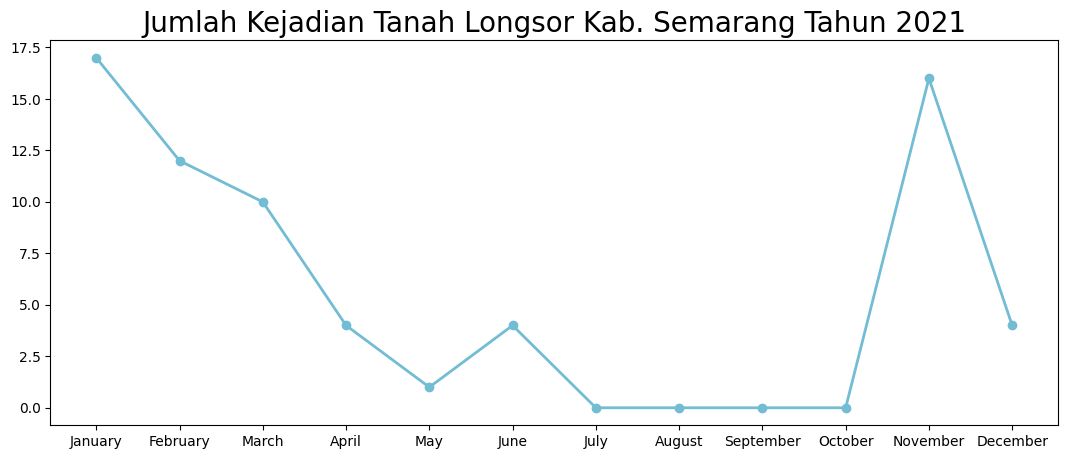

In [777]:
plt.figure(figsize=(13, 5))
plt.plot(
    rekap_ts["Bulan"],
    rekap_ts["Jumlah Kejadian Bencana"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title(f'Jumlah Kejadian Tanah Longsor Kab. Semarang Tahun {selected_year}', loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Musim

In [778]:
selected_year = 2022
df_rekap_selected_year = all_rekap[all_rekap.TAHUN == selected_year]
df_rekap_selected_year

NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
68     4  TANAH LONGSOR       2022-01-06                 WHATSAPP GROUP   
69     5  TANAH LONGSOR       2022-01-06                 WHATSAPP GROUP   
70     8  TANAH LONGSOR       2022-01-10                 WHATSAPP GROUP   
71    12  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
72    13  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
73    14  TANAH LONGSOR       2022-01-11                 WHATSAPP GROUP   
74    22  TANAH LONGSOR       2022-01-18                   MEDIA SOSIAL   
75    24  TANAH LONGSOR       2022-01-20  INSTANSI TERKAIT & MASYARAKAT   
76    28  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
77    35  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
78    36  TANAH LONGSOR       2022-01-25                 WHATSAPP GROUP   
79    41  TANAH LONGSOR       2022-01-28                 WHATSAPP GROUP   
80    42  TANAH LONGSOR       2022-01-28                 WHATSAPP GROUP   
81    43  TANAH LONGSOR       2022-01-29  INSTANSI TERKAIT & MASYARAKAT   
82    44  TANAH LONGSOR       2022-01-25                   MEDIA SOSIAL   
83    47  TANAH LONGSOR       2022-02-01                 WHATSAPP GROUP   
84    55  TANAH LONGSOR       2022-02-10  INSTANSI TERKAIT & MASYARAKAT   
85    59  TANAH LONGSOR       2022-02-14                 WHATSAPP GROUP   
86    61  TANAH LONGSOR       2022-02-15  INSTANSI TERKAIT & MASYARAKAT   
87    65  TANAH LONGSOR       2022-02-18                 WHATSAPP GROUP   
88    66  TANAH LONGSOR       2022-02-18                 WHATSAPP GROUP   
89    68  TANAH LONGSOR       2022-02-18            SURAT KEPALA DAERAH   
90    70  TANAH LONGSOR       2022-02-18            SURAT KEPALA DAERAH   
91    72  TANAH LONGSOR       2022-02-19                 WHATSAPP GROUP   
92    73  TANAH LONGSOR       2022-02-20                 WHATSAPP GROUP   
93    78  TANAH LONGSOR       2022-03-03                 WHATSAPP GROUP   
94    79  TANAH LONGSOR       2022-03-04  INSTANSI TERKAIT & MASYARAKAT   
95    81  TANAH LONGSOR       2022-03-04                 WHATSAPP GROUP   
96    82  TANAH LONGSOR       2022-03-05                 WHATSAPP GROUP   
97    83  TANAH LONGSOR       2022-03-07            SURAT KEPALA DAERAH   
98    85  TANAH LONGSOR       2022-03-08                 WHATSAPP GROUP   
99    86  TANAH LONGSOR       2022-03-08                 WHATSAPP GROUP   
100   89  TANAH LONGSOR       2022-03-10  INSTANSI TERKAIT & MASYARAKAT   
101   91  TANAH LONGSOR       2022-03-11            SURAT KEPALA DAERAH   
102   93  TANAH LONGSOR       2022-03-12                 WHATSAPP GROUP   
103   97  TANAH LONGSOR       2022-03-15                 WHATSAPP GROUP   
104   98  TANAH LONGSOR       2022-03-15                 WHATSAPP GROUP   
105   99  TANAH LONGSOR       2022-03-15  INSTANSI TERKAIT & MASYARAKAT   
106  100  TANAH LONGSOR       2022-03-18                 WHATSAPP GROUP   
107  101  TANAH LONGSOR       2022-03-21                 WHATSAPP GROUP   
108  106  TANAH LONGSOR       2022-03-26  INSTANSI TERKAIT & MASYARAKAT   
109  108  TANAH LONGSOR       2022-03-27            SURAT KEPALA DAERAH   
110  109  TANAH LONGSOR       2022-03-31  INSTANSI TERKAIT & MASYARAKAT   
111  110  TANAH LONGSOR       2022-03-31                 WHATSAPP GROUP   
112  111  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
113  112  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
114  113  TANAH LONGSOR       2022-04-01                 WHATSAPP GROUP   
115  117  TANAH LONGSOR       2022-04-03  INSTANSI TERKAIT & MASYARAKAT   
116  120  TANAH LONGSOR       2022-04-17  INSTANSI TERKAIT & MASYARAKAT   
117  121  TANAH LONGSOR       2022-04-19  INSTANSI TERKAIT & MASYARAKAT   
118  122  TANAH LONGSOR       2022-04-19                 WHATSAPP GROUP   
119  124  TANAH LONGSOR       2022-04-20  INSTANSI TERKAIT & MASYARAKAT   
120  125  TANAH LONGSOR       2

In [779]:
#MUSIM
rekap_musim = df_rekap_selected_year.groupby(by="MUSIM").NO.nunique().reset_index()
rekap_musim.rename(columns={
    "NO": "Jumlah Kejadian Bencana"
}, inplace=True)
rekap_musim

MUSIM  Jumlah Kejadian Bencana
0    KEMARAU                       46
1  PENGHUJAN                       66

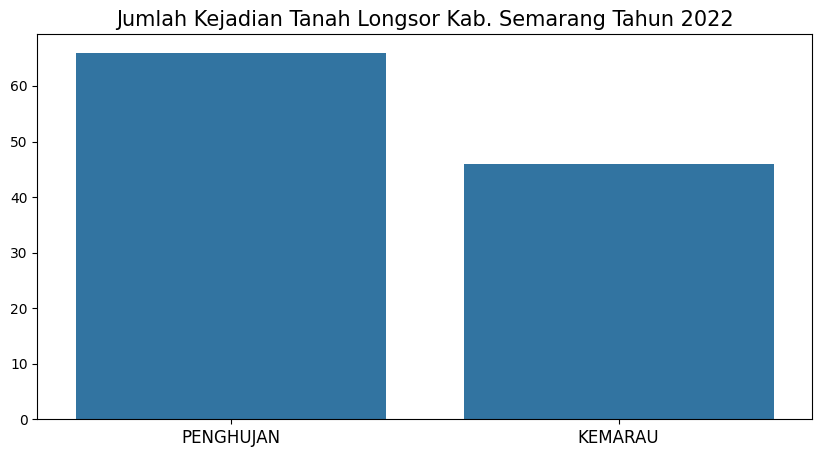

In [780]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="Jumlah Kejadian Bencana",
    x="MUSIM",
    data=rekap_musim.sort_values(by="Jumlah Kejadian Bencana", ascending=False),
)
plt.title(f'Jumlah Kejadian Tanah Longsor Kab. Semarang Tahun {selected_year}', loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pelaporan

In [781]:
selected_year = 2023
df_rekap_selected_year = all_rekap[all_rekap.TAHUN == selected_year]
df_rekap_selected_year

NO  JENIS_BENCANA TANGGAL_KEJADIAN                        PELAPOR  \
180    3  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
181    4  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
182    5  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
183    6  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
184    8  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
185    9  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
186   10  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
187   11  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
188   15  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
189   18  TANAH LONGSOR       2023-01-04  INSTANSI TERKAIT & MASYARAKAT   
190   19  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
191   20  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
192   22  TANAH LONGSOR       2023-01-04                 WHATSAPP GROUP   
193   24  TANAH LONGSOR       2022-01-04            SURAT KEPALA DAERAH   
194   26  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
195   27  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
196   29  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
197   30  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
198   31  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
199   32  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
200   33  TANAH LONGSOR       2023-01-05                 WHATSAPP GROUP   
201   37  TANAH LONGSOR       2023-01-06                 WHATSAPP GROUP   
202   38  TANAH LONGSOR       2023-01-06                 WHATSAPP GROUP   
203   39  TANAH LONGSOR       2023-01-06            SURAT KEPALA DAERAH   
204   40  TANAH LONGSOR       2023-01-07                 WHATSAPP GROUP   
205   48  TANAH LONGSOR       2023-01-15  INSTANSI TERKAIT & MASYARAKAT   
206   50  TANAH LONGSOR       2023-01-16                 WHATSAPP GROUP   
207   51  TANAH LONGSOR       2023-01-16                 WHATSAPP GROUP   
208   52  TANAH LONGSOR       2023-01-16            SURAT KEPALA DAERAH   
209   55  TANAH LONGSOR       2022-01-18            SURAT KEPALA DAERAH   
210   60  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
211   61  TANAH LONGSOR       2023-01-20  INSTANSI TERKAIT & MASYARAKAT   
212   62  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
213   63  TANAH LONGSOR       2023-01-20                 WHATSAPP GROUP   
214   64  TANAH LONGSOR       2023-01-21  INSTANSI TERKAIT & MASYARAKAT   
215   65  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
216   66  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
217   67  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
218   69  TANAH LONGSOR       2023-01-21                 WHATSAPP GROUP   
219   72  TANAH LONGSOR       2023-01-24                 WHATSAPP GROUP   
220   73  TANAH LONGSOR       2023-01-24                 WHATSAPP GROUP   
221   75  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
222   76  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
223   77  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
224   78  TANAH LONGSOR       2023-01-31                 WHATSAPP GROUP   
225   80  TANAH LONGSOR       2023-02-05                 WHATSAPP GROUP   
226   82  TANAH LONGSOR       2023-02-11                 WHATSAPP GROUP   
227   85  TANAH LONGSOR       2023-02-11                 WHATSAPP GROUP   
228   86  TANAH LONGSOR       2023-02-14                 WHATSAPP GROUP   
229   87  TANAH LONGSOR       2023-02-14                 WHATSAPP GROUP   
230   88  TANAH LONGSOR       2023-02-15                 WHATSAPP GROUP   
231   92  TANAH LONGSOR       2023-02-17            SURAT KEPALA DAERAH   
232   93  TANAH LONGSOR       2

In [782]:
#MUSIM
rekap_lapor = df_rekap_selected_year.groupby(by="PELAPOR").NO.nunique().reset_index()
rekap_lapor.rename(columns={
    "NO": "Jumlah Kejadian Bencana"
}, inplace=True)
rekap_lapor

PELAPOR  Jumlah Kejadian Bencana
0  INSTANSI TERKAIT & MASYARAKAT                        6
1            SURAT KEPALA DAERAH                       11
2                 WHATSAPP GROUP                      114

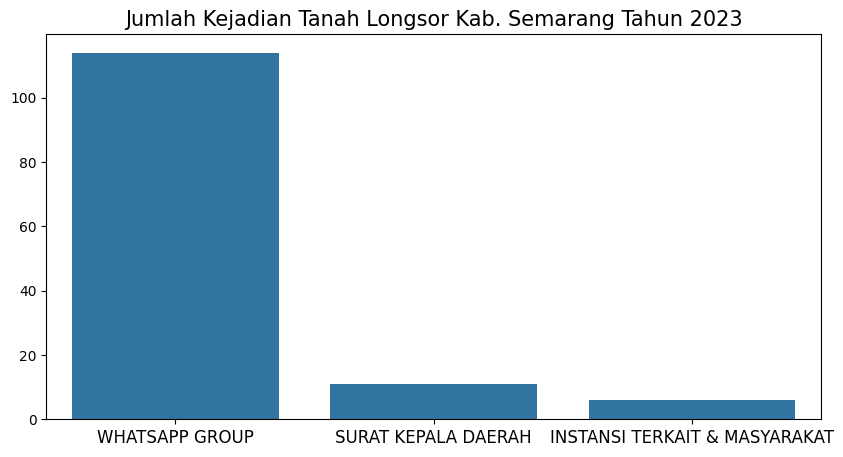

In [783]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="Jumlah Kejadian Bencana",
    x="PELAPOR",
    data=rekap_lapor.sort_values(by="Jumlah Kejadian Bencana", ascending=False),
)
plt.title(f'Jumlah Kejadian Tanah Longsor Kab. Semarang Tahun {selected_year}', loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Sebaran

In [784]:
selected_year = 2021
df_selected_year = all_peta[all_peta.TAHUN == selected_year]
df_selected_year

wadmkk        namaobj      luas_ha  \
0   Semarang       AMBARAWA  2978.003567   
1   Semarang         BANCAK  4547.673893   
2   Semarang      BANDUNGAN  4739.591056   
3   Semarang      BANYUBIRU  5172.053686   
4   Semarang          BAWEN  4695.655168   
5   Semarang         BERGAS  4573.534034   
6   Semarang        BRINGIN  6818.389564   
7   Semarang        GETASAN  6808.129602   
8   Semarang          JAMBU  5202.636434   
9   Semarang      KALIWUNGU  3104.078004   
10  Semarang        PABELAN  5188.108144   
11  Semarang      PRINGAPUS  8421.552334   
12  Semarang          SURUH  6612.145921   
13  Semarang        SUSUKAN  5018.180357   
14  Semarang       TENGARAN  4992.377335   
15  Semarang        TUNTANG  6107.073786   
16  Semarang  UNGARAN BARAT  4878.194909   
17  Semarang  UNGARAN TIMUR  6108.648785   
18  Semarang       SUMOWONO  5878.849634   

                                             geometry      KECAMATAN  \
0   POLYGON ((433820.446 9200493.744, 433840.944 9...       AMBARAWA   
1   POLYGON ((457210.674 9202462.448, 457213.323 9...         BANCAK   
2   POLYGON ((428170.289 9205767.177, 428171.558 9...      BANDUNGAN   
3   POLYGON ((433778.085 9194939.260, 433780.094 9...      BANYUBIRU   
4   POLYGON ((440642.473 9203153.203, 440717.707 9...          BAWEN   
5   POLYGON ((441120.581 9211937.435, 441152.149 9...         BERGAS   
6   POLYGON ((449790.685 9205963.341, 449788.593 9...        BRINGIN   
7   POLYGON ((439715.878 9188798.186, 439726.792 9...        GETASAN   
8   POLYGON ((425872.437 9198693.141, 425959.448 9...          JAMBU   
9   POLYGON ((455010.010 9177580.802, 455032.067 9...      KALIWUNGU   
10  POLYGON ((449074.913 9197935.994, 449123.861 9...        PABELAN   
11  POLYGON ((445380.478 9212618.727, 445449.594 9...      PRINGAPUS   
12  POLYGON ((457171.186 9195257.036, 457194.302 9...          SURUH   
13  MULTIPOLYGON (((453911.013 9177425.177, 453915...        SUSUKAN   
14  POLYGON ((449393.305 9188200.974, 449375.834 9...       TENGARAN   
15  POLYGON ((445585.375 9202789.062, 445581.709 9...        TUNTANG   
16  POLYGON ((431115.581 9215547.833, 431132.889 9...  UNGARAN BARAT   
17  POLYGON ((440391.093 9217436.150, 440394.964 9...  UNGARAN TIMUR   
18  POLYGON ((426756.457 9204957.438, 426730.976 9...       SUMOWONO   

    KEJADIAN  TAHUN  
0          2   2021  
1          1   2021  
2          7   2021  
3          7   2021  
4          5   2021  
5          2   2021  
6          3   2021  
7          4   2021  
8         12   2021  
9          1   2021  
10         2   2021  
11         2   2021  
12         1   2021  
13         1   2021  
14         1   2021  
15         2   2021  
16         5   2021  
17         8   2021  
18         2   2021

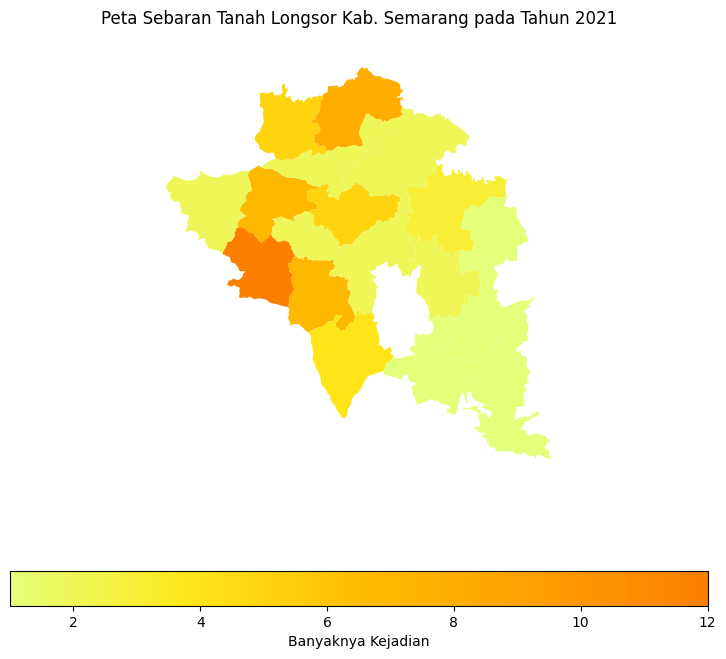

In [785]:
fig, ax = plt.subplots(figsize=(9, 8))
df_selected_year.plot(column='KEJADIAN', cmap='Wistia', legend=True, legend_kwds={"label": 'Banyaknya Kejadian', "orientation": "horizontal"}, ax=ax)

# Customize plot
ax.set_title(f'Peta Sebaran Tanah Longsor Kab. Semarang pada Tahun {selected_year}')
ax.set_axis_off()
plt.show()